<span style="font-family: Calibri, sans-serif; font-size: 16pt; color: navy;"><b>DATA608 - Analysis of Audio Files</b></span>

In this project, we will analyze audio sounds of dog barks and cat meows to create input features for exploratory data analysis (EDA) and eventually for our model input. To accomplish this, we will utilize the <b>Librosa</b> library, which is a Python package specifically designed for music and audio analysis. Librosa provides various built-in functions that allow us to extract information from audio files.

For more detailed information on the Librosa package and its functionalities, please refer to the official documentation available at <a href="https://librosa.org/doc/latest/index.html" style="color: #000080;">https://librosa.org/doc/latest/index.html</a>.

##### Please not that we may add additional packages/libraries as we require them

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
%matplotlib inline
import os as os
import warnings
warnings.filterwarnings("ignore", category=Warning)


###### checking librosa pakcage version

In [2]:
pip show librosa

Name: librosa
Version: 0.9.2
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: /Users/farhanakausarshaik/opt/anaconda3/lib/python3.9/site-packages
Requires: audioread, decorator, joblib, numba, numpy, packaging, pooch, resampy, scikit-learn, scipy, soundfile
Required-by: soundata
Note: you may need to restart the kernel to use updated packages.


###### Testing the package using 1 audio file from the train file

In [3]:
audio_data = 'cats_dogs/train/dog/dog_barking_10.wav'
x, sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)


<class 'numpy.ndarray'> <class 'int'>
(55008,) 22050


The printed result provides us with the format of how the results are stored. The values `x.shape` and `sr` indicate the size of the array being stored and represent the sample rate of the audio file, respectively.

FYI: Sample rate in the Librosa package refers to the number of samples (audio data points) captured per second in an audio file. It represents the frequency at which the audio waveform is sampled to convert it into a digital format. The units of the sample rate is measured in Hertz (Hz) ,which in mathemtical form is the reciprocal of time (1/seconds) per sample or per waveform.

Reference: [Librosa Documentation](https://librosa.org/doc/latest/index.html)



###### Importing the necessary libraries to convert audio file for listening purposes

In [4]:
from IPython.display import Audio,Markdown  # Enables audio file display and playback and download
import ipywidgets as widgets  # Supports interactive widget creation such as buttons and sliders
from IPython.display import display  # Displays the created widgets

In [5]:
audio = Audio(audio_data,rate=sr)
display(Markdown('##### Labelling file name to easily distinguish between different audio files'))
display(audio)

##### Labelling file name to easily distinguish between different audio files

###### Importing the necessary libraries to visually display audio data

In [6]:
import librosa.display  
#built in package of Librosa which offers the simple and convenient methods to visualize audio data

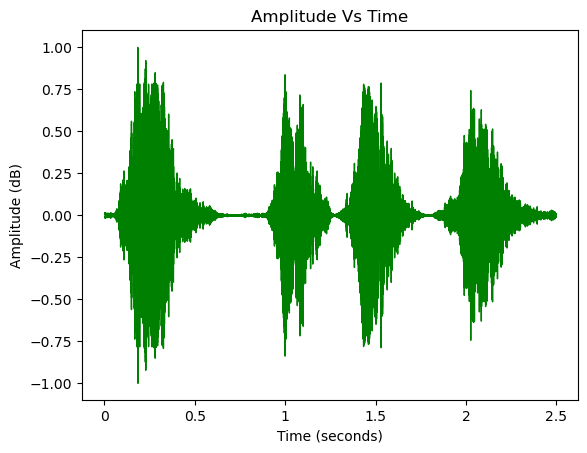

In [7]:
librosa.display.waveshow(x, sr=sr,color='green') # still using the test sample audio above to show how the Librosa package will be utlized
plt.title('Amplitude Vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (dB)')
plt.show()

##### Insights from sample audio file


We can observe that both the audio file and the plot of the amplitude versus time display similar data but it different formats. We can clearly hear four dogs barks, with the first one being the loudest, while the remaining three seem to have the same loudness. The aduo file has a duration of 2.5 seconds and also exhibits four barks within that timeframe. However, without further analysis, one might not realize that the second bark occured 0.5 seocnds later, the period between barks is 0.5 seconds, or the exact number of barks in the audio file. One would likely only recognize the general sound type and detech the animal.

Therefore, this analysis aims to delve deeper into each audio file and analyze key metrics that can distinguish one audio file from another. Even within the saem sound category, we will explore how important features and metrics enable differentiate between similar audio files.

---

##### fast Fourier transform (FFT)

Librose's package also includes a built-in function for performing a fast Fourier transform (FFT).

FFT is a computer algorithm that computes the discrete Fourier transfotm much faster than other alogirthmns,, is explained.  The savings in computer time can be huge; for example, an N=210-point transform can be computed with the FFT 100 times faster than with the use of a direct approach.

<b> Reference: Brigham EO, Morrow RE. The fast Fourier transform. IEEE spectrum. 1967 Dec;4(12):63-70.


Fourier Transform is a powerful tool for analyzing the components of a stationary signal (a stationary signal is a signal where there is no change in the properties of signal). For example, the Fourier transform is a powerful tool for processing signals that are composed of some combination of sine and cosine signals (sinusoids) 


The main difference is that wavelets are well localized in both time and frequency domain whereas the standard Fourier transform is only localized in frequency domain. The Short-time Fourier transform (STFT) is also time and frequency localized but there are issues with the frequency time resolution and wavelets often give a better signal representation using Multiresolution analysis.

<b> Reference: Sifuzzaman M, Islam MR, Ali MZ. Application of wavelet transform and its advantages compared to Fourier transform.

---
    
    


##### Conversion of audio singal from the time domain to the freqency domain using Librosa's built in FFT function

In [8]:
X=librosa.stft(x) # converts the audio file signal 'x' into 'X' using FFT
Xdb=librosa.amplitude_to_db(abs(X)) # This code then converts the X signal into dB units using Librosa's built in function


In [9]:
Xdb

array([[ -5.444612  ,  -7.47899   ,   0.53106344, ...,   6.7085266 ,
          2.6561806 ,   7.996728  ],
       [ -2.074139  ,  -2.066948  ,  -0.42529184, ...,   9.58571   ,
          9.134337  ,   6.394608  ],
       [  0.3789164 ,  -7.423866  ,  -3.458054  , ...,   6.7191167 ,
          4.9983296 ,   0.48176947],
       ...,
       [-31.646523  , -31.646523  , -31.646523  , ..., -31.646523  ,
        -31.646523  , -31.646523  ],
       [-31.646523  , -31.646523  , -31.646523  , ..., -31.646523  ,
        -31.646523  , -31.646523  ],
       [-31.646523  , -31.646523  , -31.646523  , ..., -31.646523  ,
        -31.646523  , -31.646523  ]], dtype=float32)

##### Ploting the FFT audio as a spectrogram

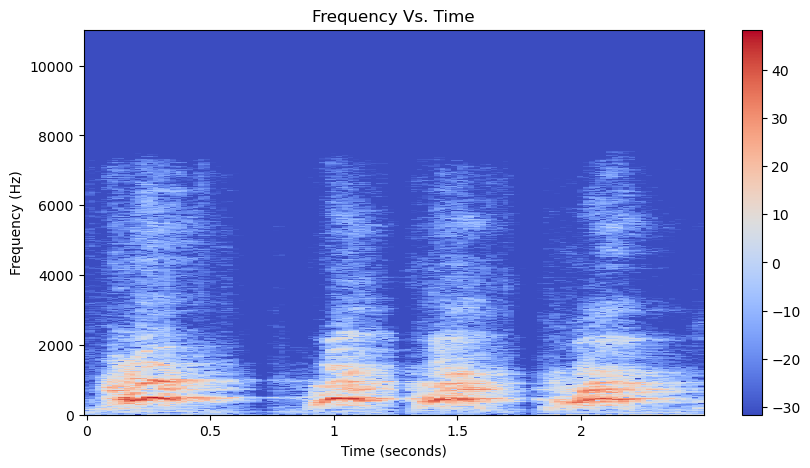

##### Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

In [10]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')  # Librosa's built-in function to convert FFT signal into spectrogram
plt.title('Frequency Vs. Time') 
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.colorbar() # This built in function in matplotlib helps of visual represent the mapping between colors and values in a plot
plt.show()

display(Markdown('##### Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html'))


In [11]:
display(Markdown('Using Librosa\'s built-in package to extract the mel spectrogram'))

melspec2=librosa.feature.melspectrogram(y=x,sr=sr,n_mels=10)
melspec2

Using Librosa's built-in package to extract the mel spectrogram

array([[1.8427677e-02, 3.4903422e-02, 7.5098358e-02, ..., 4.4308987e-02,
        9.6577860e-02, 1.3017350e-01],
       [1.0260119e-03, 2.6190972e-03, 1.9815873e-02, ..., 4.2904679e-02,
        4.3116465e-02, 3.1699318e-02],
       [4.9162196e-04, 1.1735790e-03, 2.2462420e-02, ..., 2.4572013e-02,
        2.2905042e-02, 1.0167476e-02],
       ...,
       [6.9907190e-05, 1.0869843e-04, 7.0349364e-05, ..., 1.2163754e-05,
        2.2850028e-05, 2.0912021e-05],
       [5.9295111e-05, 9.6775824e-05, 5.4791424e-05, ..., 8.4292751e-06,
        1.5468742e-05, 1.4991357e-05],
       [7.3191000e-06, 1.2467314e-05, 7.9099236e-06, ..., 1.0906953e-06,
        1.8682272e-06, 3.4488100e-06]], dtype=float32)

In [12]:
melspec2.shape

(10, 108)

In [15]:
mel_spect = librosa.power_to_db(melspec2, ref=np.max)
mel_bin_means = np.mean(mel_spect, axis=1)


In [16]:
pd.DataFrame(mel_bin_means).T

0          1          2          3          4          5  \
0 -20.289913 -20.781986 -27.507881 -36.405708 -46.888031 -51.794979   

           6          7          8          9  
0 -59.321239 -61.517124 -62.781563 -72.196938

---

### Feature Extraction from audio signal that Librosa package offers

- Mel Frequency Cepstrium ( MFC)

MFCs are derived from the short-term power spectrum of a sound, using a linear cosine transform of the log power spectrum on a nonlinear Mel frequency scale. These coefficients, known as MFCCs, are combined to create an MFC representation.

Reference : Raguraman P, Mohan R, Vijayan M. Librosa based assessment tool for music information retrieval systems. In2019 IEEE Conference on Multimedia Information Processing and Retrieval (MIPR) 2019 Mar 28 (pp. 109-114). IEEE.


In [17]:
display(Markdown('Using Librosa\'s built-in package to extract the MFCC'))

MFCC_1=librosa.feature.mfcc(S=librosa.power_to_db(melspec2),sr=sr)
print(MFCC_1)
display(Markdown('---'))
display(Markdown('The shape of the MFCC coefficents of the entire audio file'))

print(MFCC_1.shape)

Using Librosa's built-in package to extract the MFCC

[[-115.06313    -107.75903     -99.97271    ... -109.096565
  -104.29131    -105.465004  ]
 [  23.954609     25.798779     38.790394   ...   48.346046
    46.128838     43.454918  ]
 [   2.6182365     4.53859       5.2765055  ...    4.4505014
     3.9980524     4.6455684 ]
 ...
 [   3.2569716     3.3740726     4.1022644  ...    3.1198661
     5.349966      5.300475  ]
 [   0.57550347    0.18413305    0.53080535 ...   -0.9380343
    -0.24012876   -0.2770667 ]
 [   1.7529993     1.1642904     1.6852036  ...   -1.4437504
    -0.9436741    -0.29030037]]


---

The shape of the MFCC coefficents of the entire audio file

(10, 108)


The results of the MFCC function is an array that contains the extracted MFCCs of the full audio signal. We will use the result of the array to extract statistical measurement such as the mean,variance, and percentiles as inputs for each audio file. One can also use the array of the full audio signal and creat heatmaps

---

##### Importing the necessary libraries for MFCCs heatmap

In [18]:
import seaborn as sns
import numpy as np

---

##### Heatmap of MFCCS

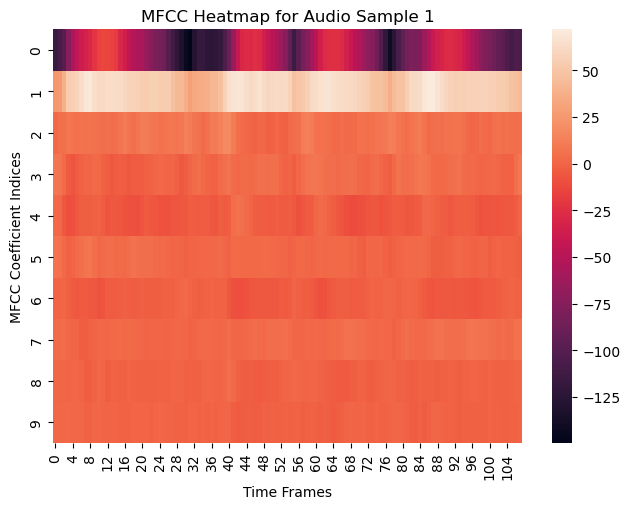

In [19]:
sns.heatmap(MFCC_1)
plt.tight_layout()
plt.title("MFCC Heatmap for Audio Sample 1")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficient Indices")
plt.show()

##### Statistical measurements of the MFCC array above

In [20]:
mfccs1_mean=np.mean(MFCC_1,axis=1)
mfccs1_variance=np.var(MFCC_1,axis=1)


mfccs1_percentile_25=np.percentile(MFCC_1,25,axis=1)
mfccs1_perentile_75=np.percentile(MFCC_1,75,axis=1)

In [21]:
data_mfccs1 = {
    'Mean': mfccs1_mean,
    'Variance': mfccs1_variance,
    'Percentile_75': mfccs1_perentile_75,
    'Percentile_25': mfccs1_percentile_25
}

df = pd.DataFrame(data_mfccs1)
df = df.reset_index().rename(columns={'index': 'MFCCS Coefficient'})
display(Markdown('This is the MFCC coefficients for 1 audio file'))

display(df)

This is the MFCC coefficients for 1 audio file

MFCCS Coefficient       Mean     Variance  Percentile_75  Percentile_25
0                  0 -68.590469  1273.686890     -35.069015     -98.135384
1                  1  55.413826   100.501961      62.645191      49.314363
2                  2   5.832728    13.881985       7.368942       3.813265
3                  3   1.748782    12.909266       4.312216      -0.874565
4                  4  -4.575374    11.141927      -3.318337      -6.739772
5                  5   1.176582     5.307736       2.624713      -0.465910
6                  6  -3.544649     6.761051      -1.646492      -5.357094
7                  7   2.389744     4.291547       4.054799       0.802298
8                  8  -1.364306     2.434618      -0.514407      -2.407911
9                  9  -1.104861     1.893319      -0.220815      -1.926071

---

- Pitch

Pitch is a quality of sounds that enables their arrangement on a scale based on frequency, allowing us to perceive them as "higher" or "lower" in musical terms. Clear and stable frequency is required to accurately determine pitch, distinguishing it from noise. In classical music, the key of a composition is formed by a collection of pitches, serving as its foundation. Loudness refers to the subjective perception of sound pressure.


Reference: Raguraman P, Mohan R, Vijayan M. Librosa based assessment tool for music information retrieval systems. In2019 IEEE Conference on Multimedia Information Processing and Retrieval (MIPR) 2019 Mar 28 (pp. 109-114). IEEE.





- Melspectogram

The mel spectrogram represents the audio's frequency content over time, mapping frequencies to a scale that matches how we perceive sound. It provides a useful representation for analyzing and processing audio signals, such as extracting features or training machine learning models.

Reference:  McFee B, Raffel C, Liang D, Ellis DP, McVicar M, Battenberg E, Nieto O. librosa: Audio and music signal analysis in python. InProceedings of the 14th python in science conference 2015 Jul 6 (Vol. 8, pp. 18-25).


In [22]:
melspec1=librosa.feature.melspectrogram(y=x,sr=sr)
print(melspec1)
display(Markdown('---'))

display(Markdown('Size of the melspectogram of 1 audio file'))
print(melspec1.shape)

[[1.4788684e-01 8.6112723e-02 5.4388311e-02 ... 3.1069615e-01
  2.4569643e-01 1.1256276e-01]
 [2.3334914e-01 2.3224849e-01 6.8551429e-02 ... 3.3823539e-02
  4.2484976e-02 1.2377968e-02]
 [9.4413288e-02 8.8331617e-02 9.1387704e-02 ... 3.1937495e-02
  2.1015245e-02 6.5573435e-03]
 ...
 [5.9329860e-08 1.4781052e-08 3.0826012e-16 ... 2.4375528e-16
  6.2326869e-08 1.4451565e-06]
 [5.7286929e-08 1.4273280e-08 2.7184006e-16 ... 2.0885837e-16
  6.1418582e-08 1.4240663e-06]
 [5.6036786e-08 1.3962479e-08 1.8371059e-16 ... 2.3553228e-16
  6.0835951e-08 1.4105392e-06]]


---

Size of the melspectogram of 1 audio file

(128, 108)


##### Heatmap of Melspectogram

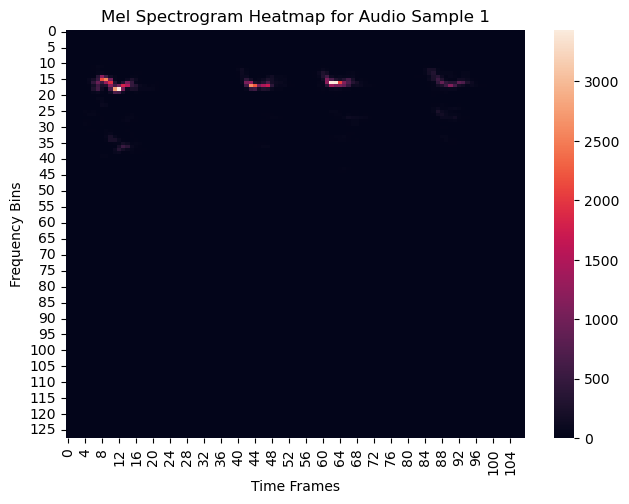

In [23]:
sns.heatmap(melspec1)
plt.tight_layout()
plt.title("Mel Spectrogram Heatmap for Audio Sample 1")
plt.xlabel("Time Frames")
plt.ylabel("Frequency Bins")
plt.show()

##### Statistical measurements of the Melspectogram array above


In [44]:
melspec1_mean=np.mean(melspec1,axis=1)
melspec1_variance=np.var(melspec1,axis=1)


melspec1_percentile_25=np.percentile(melspec1,25,axis=1)
melspec1_perentile_75=np.percentile(melspec1,75,axis=1)

In [25]:
data_melspec1 = {
    'Mean': melspec1_mean,
    'Variance': melspec1_variance,
    'Percentile_75': melspec1_perentile_75,
    'Percentile_25': melspec1_percentile_25
}

df = pd.DataFrame(data_melspec1)
df = df.reset_index().rename(columns={'index': 'Melspectogram frequency bins'})
display(Markdown('This is the Melspectogram frequency bins for 1 audio file'))

display(df)

This is the Melspectogram frequency bins for 1 audio file

Melspectogram frequency bins          Mean      Variance  Percentile_75  \
0                               0  8.014817e-02  7.649406e-03   1.171289e-01   
1                               1  5.808240e-02  2.963997e-03   7.506438e-02   
2                               2  7.042287e-02  3.380658e-03   9.139415e-02   
3                               3  8.167570e-02  4.669792e-03   1.101060e-01   
4                               4  1.204612e-01  2.782053e-02   1.305551e-01   
..                            ...           ...           ...            ...   
123                           123  1.539681e-08  2.109103e-14   1.805898e-13   
124                           124  1.497388e-08  2.001538e-14   1.939724e-13   
125                           125  1.464450e-08  1.919388e-14   1.774235e-13   
126                           126  1.441721e-08  1.863680e-14   2.262431e-13   
127                           127  1.427209e-08  1.828387e-14   1.864858e-13   

     Percentile_25  
0     2.257861e-02  
1     2.027763e-02  
2     2.988805e-02  
3     3.426580e-02  
4     2.602831e-02  
..             ...  
123   1.356138e-15  
124   7.707266e-16  
125   8.168762e-16  
126   1.061174e-15  
127   1.263374e-15  

[128 rows x 5 columns]

##### Chromograph

A chromagram is a representation that shows how different musical pitch classes (like C, C#, D, etc.) are distributed and vary over time. It helps analyze the harmonic content and tonality of music.

Reference: Reference:  McFee B, Raffel C, Liang D, Ellis DP, McVicar M, Battenberg E, Nieto O. librosa: Audio and music signal analysis in python. InProceedings of the 14th python in science conference 2015 Jul 6 (Vol. 8, pp. 18-25).

In [26]:
chroma1=librosa.feature.chroma_cqt(y=x,sr=sr)
print(chroma1)
display(Markdown('---'))
display(Markdown('The size of the chromograph array of 1 audio file'))
print(chroma1.shape)

[[0.45038563 0.519497   0.57458717 ... 0.46339613 0.40302217 0.38532037]
 [0.4299192  0.4768657  0.51324    ... 0.5286939  0.48189515 0.424069  ]
 [0.937404   0.9166077  0.80698746 ... 0.47456968 0.39877066 0.4144973 ]
 ...
 [0.4600272  0.51928025 0.5301836  ... 0.9196308  0.7763928  0.6343133 ]
 [0.59417045 0.628162   0.74219155 ... 0.67457014 0.46832588 0.38412726]
 [0.30686402 0.48884714 0.69936764 ... 0.49905908 0.48545298 0.42039797]]


---

The size of the chromograph array of 1 audio file

(12, 108)


##### Statistical measurements of the Chromograph array above


In [27]:
chroma1_mean=np.mean(chroma1,axis=1)
chroma1_variance=np.var(chroma1,axis=1)


chroma1_percentile_25=np.percentile(chroma1,25,axis=1)
chroma1_perentile_75=np.percentile(chroma1,75,axis=1)

In [28]:
data_chroma1 = {
    'Mean': chroma1_mean,
    'Variance': chroma1_variance,
    'Percentile_75': chroma1_perentile_75,
    'Percentile_25': chroma1_percentile_25
}

df = pd.DataFrame(data_chroma1)
df = df.reset_index().rename(columns={'index': 'Chroma'})
display(Markdown('This is the Chroma representation for 1 audio file'))

display(df)

This is the Chroma representation for 1 audio file

Chroma      Mean  Variance  Percentile_75  Percentile_25
0        0  0.303748  0.023209       0.387805       0.197998
1        1  0.284372  0.021379       0.372848       0.168086
2        2  0.354493  0.060177       0.483928       0.154385
3        3  0.336960  0.044736       0.462000       0.174486
4        4  0.387674  0.061911       0.541001       0.185541
5        5  0.542434  0.076070       0.776920       0.305495
6        6  0.558014  0.065127       0.777027       0.372359
7        7  0.527662  0.051875       0.637988       0.374910
8        8  0.614262  0.046433       0.759612       0.488896
9        9  0.738845  0.059238       1.000000       0.542104
10      10  0.725465  0.065729       1.000000       0.542519
11      11  0.458757  0.067956       0.645305       0.244685

---

- Tonnetz


Tonnetz is a representation that shows the harmonic relationships between musical pitches. It visualizes these relationships in a two-dimensional space. Tonnetz is useful for tasks like music analysis, chord recognition, and music information retrieval.

In [29]:
tonnetz_1=librosa.feature.tonnetz(y=x,sr=sr)
print(tonnetz_1)

display(Markdown('---'))

display(Markdown('Size of the Tonnetz of 1 audio file'))
print(tonnetz_1.shape)

[[ 3.91182438e-02  4.92280603e-02  3.25352656e-02  4.40104002e-02
  -3.93079313e-03 -4.17958381e-02  2.33287819e-02  3.06338051e-02
  -1.94422032e-02 -4.13014897e-02  6.85061402e-02  1.87949953e-01
   7.79071477e-02 -1.33492892e-01 -4.82755909e-02 -5.17415324e-02
  -1.32251166e-01 -9.64413431e-02 -1.24582120e-01 -3.56920133e-02
  -2.13156041e-02  1.22151120e-02 -8.86420298e-02 -1.47432952e-01
  -1.03317829e-01 -1.23305803e-01 -3.63687943e-02  1.54953050e-02
  -3.80686150e-02 -2.62853961e-02 -3.17836573e-02 -2.31523722e-02
   1.02041662e-03  2.29918947e-02  1.25091991e-02  7.85300902e-03
  -1.45107491e-02  1.68266065e-02  8.70798551e-02  1.07583920e-01
   6.33383498e-02  5.05303454e-02  2.91120539e-02 -8.24860599e-02
  -2.47245539e-01 -2.20367897e-01 -1.90948309e-01 -1.69208855e-01
  -7.00345396e-02  2.58840552e-02  5.73722891e-02 -2.91979042e-02
  -8.69904649e-02 -5.17060505e-02  2.65102178e-02 -1.89297822e-02
  -8.72143401e-02 -1.10601171e-01 -3.26058334e-02  2.63191648e-02
  -3.35253

---

Size of the Tonnetz of 1 audio file

(6, 108)


##### Statistical measurements of the Tonnezt array above


In [30]:
Tonnetz1_mean=np.mean(tonnetz_1,axis=1)
Tonnetz1_variance=np.var(tonnetz_1,axis=1)


Tonnetz1_percentile_25=np.percentile(tonnetz_1,25,axis=1)
Tonnetz1_perentile_75=np.percentile(tonnetz_1,75,axis=1)

In [31]:
data_tonnetz1 = {
    'Mean': Tonnetz1_mean,
    'Variance': Tonnetz1_variance,
    'Percentile_75': Tonnetz1_perentile_75,
    'Percentile_25': Tonnetz1_percentile_25
}

df = pd.DataFrame(data_tonnetz1)
df = df.reset_index().rename(columns={'index': 'Tonnetz'})
display(Markdown('This is the Tonnetz representation for 1 audio file'))

display(df)

This is the Tonnetz representation for 1 audio file

Tonnetz      Mean  Variance  Percentile_75  Percentile_25
0        0 -0.006993  0.007738       0.044932      -0.052129
1        1  0.012146  0.002887       0.038630      -0.016569
2        2 -0.048508  0.009995       0.000745      -0.103772
3        3 -0.064814  0.007794       0.001553      -0.111432
4        4  0.000431  0.001555       0.018834      -0.026161
5        5 -0.000424  0.001948       0.022680      -0.024245

---

- Tempo

The `librosa.beat.beat_track` function takes the audio signal (x) and the sample rate (sr) as input and estimates the tempo of the audio signal. It returns the estimated tempo value and the frame-level beat information.


Reference: 


In [32]:
tempo,frames=librosa.beat.beat_track(y=x,sr=sr)
print(tempo)

67.99958881578948


In [33]:
frames

array([6])

- Beat times

The `librosa.frames_to_time` function converts the frame indices to corresponding time values using the sample rate, resulting in an array (beat_times) that represents the beat times in seconds.

In [34]:
beat_times=librosa.frames_to_time(frames,sr=sr)
print(beat_times)

[0.13931973]


---
---
---
---


### Test Cat audio
#### We can perform the same analysis using a test cat file

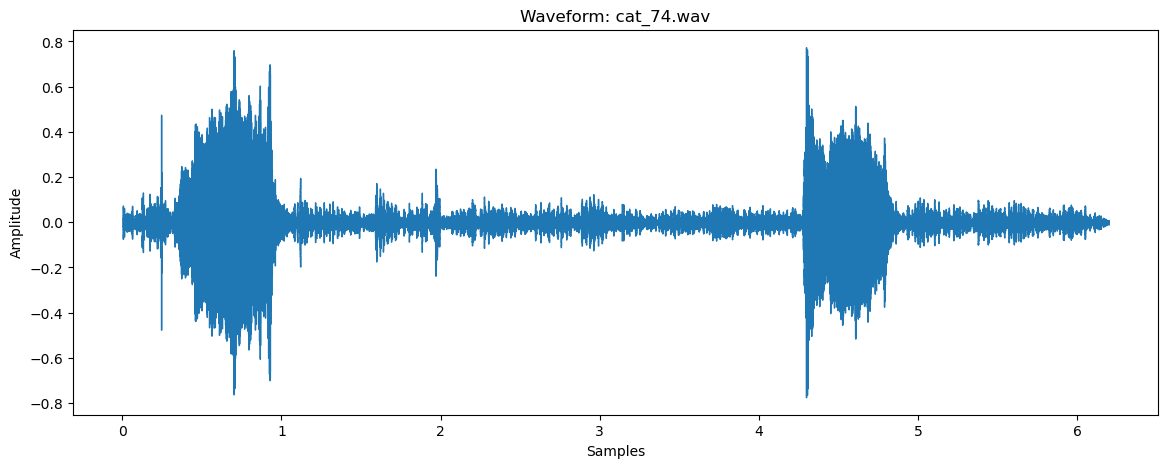

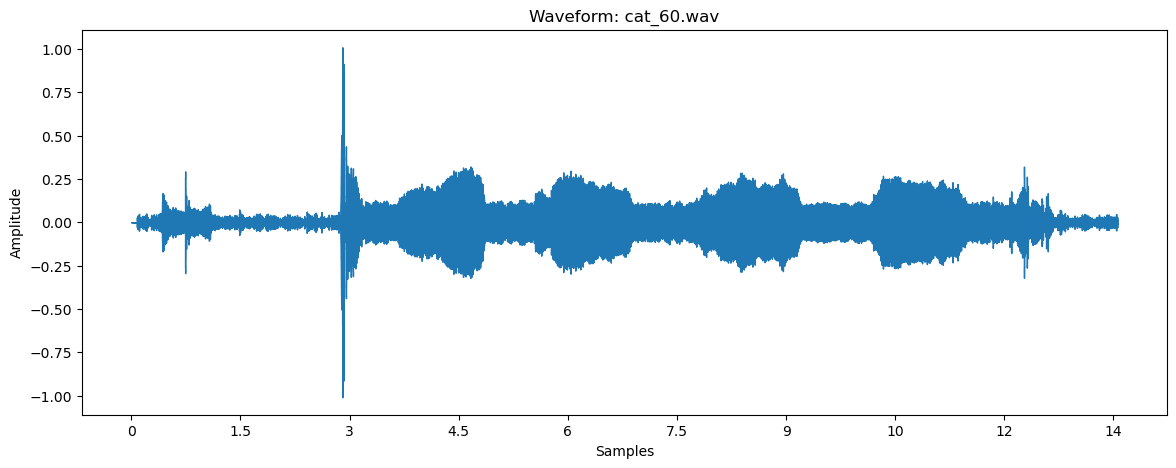

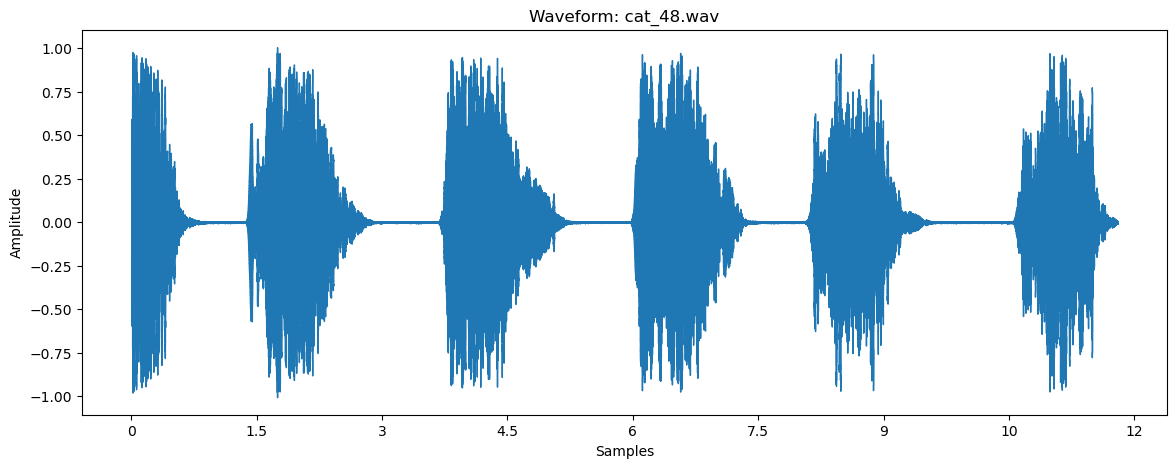

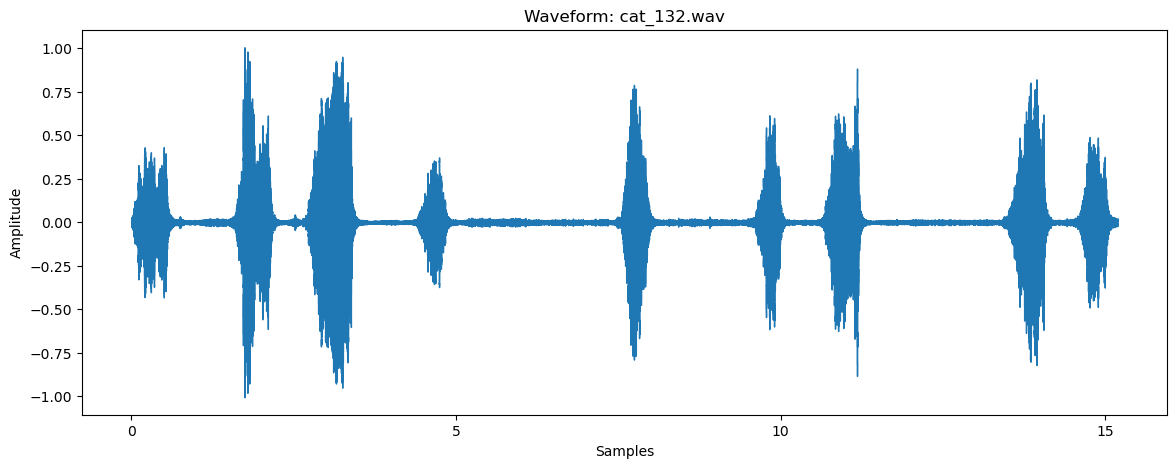

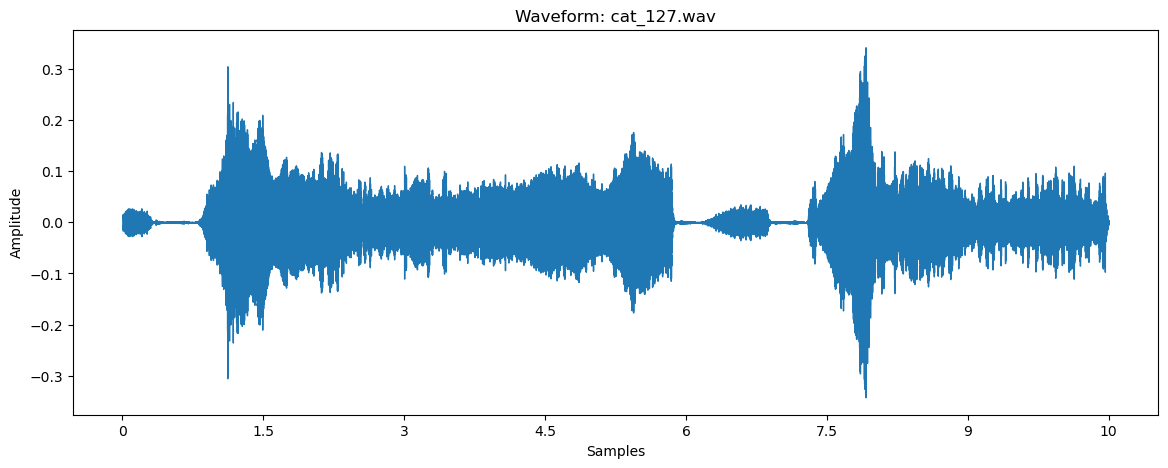

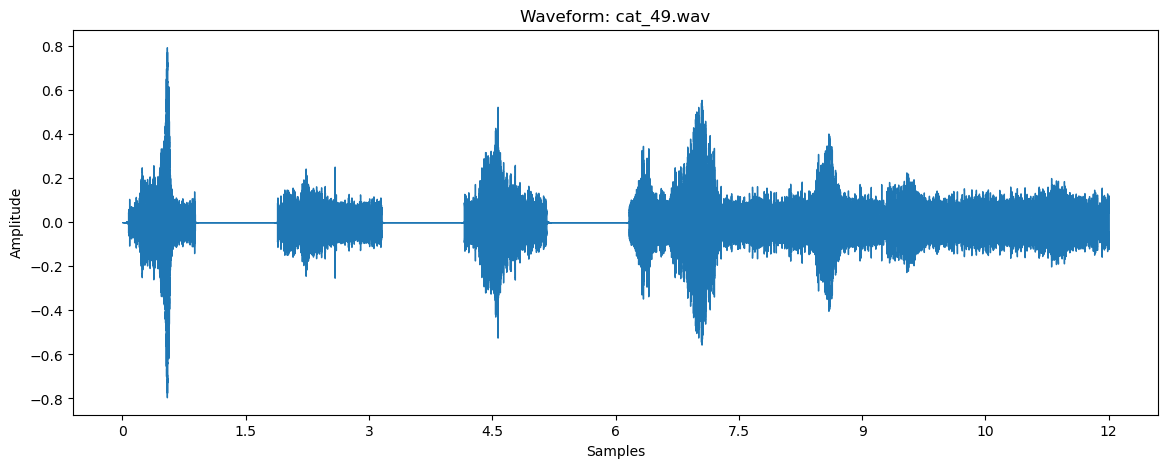

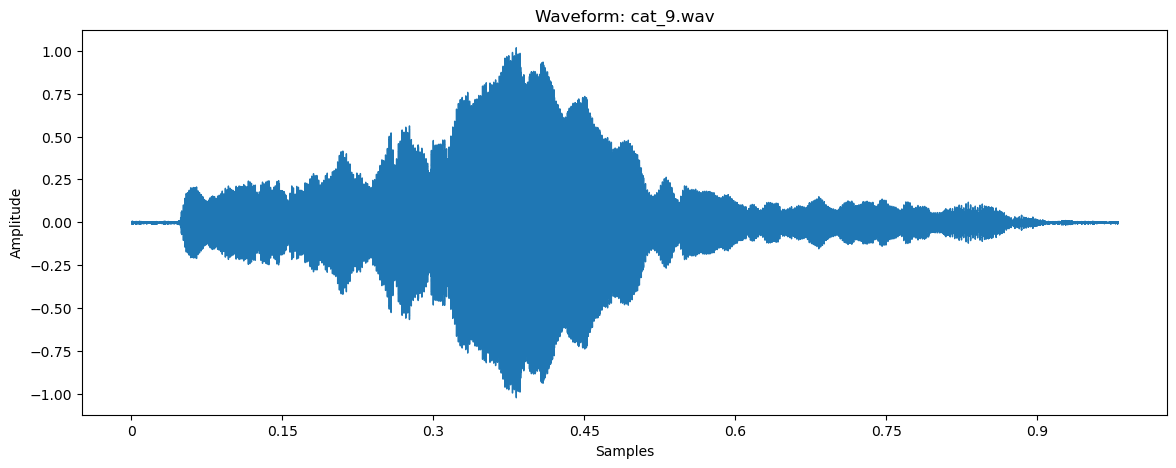

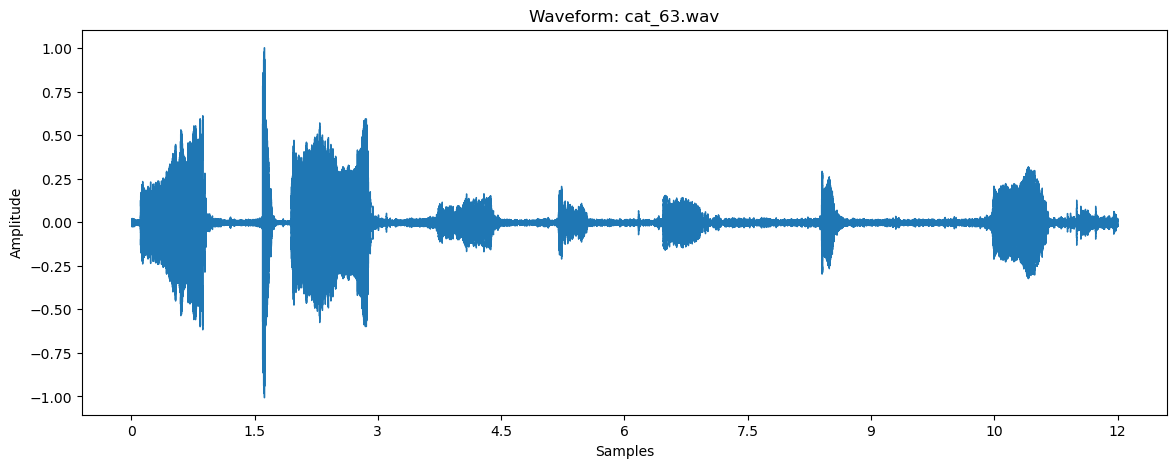

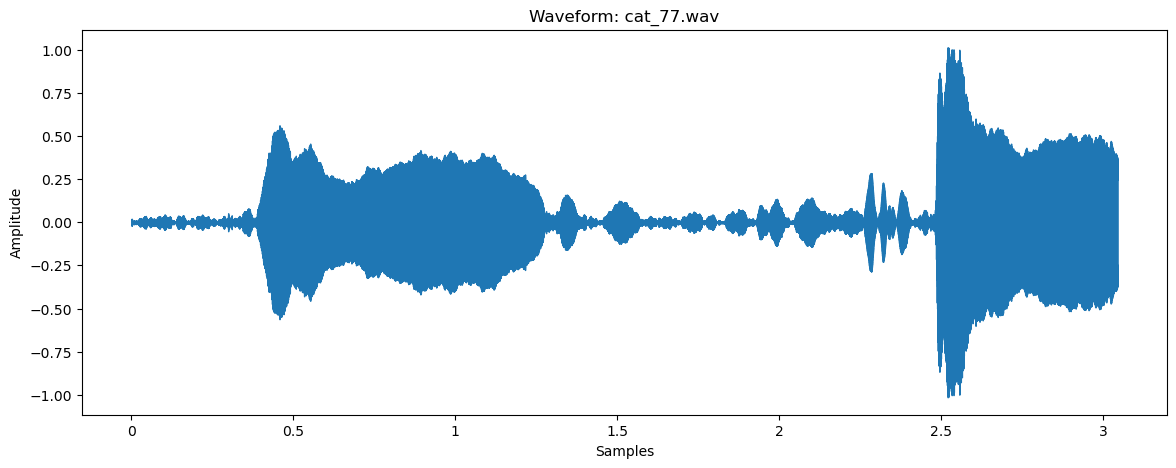

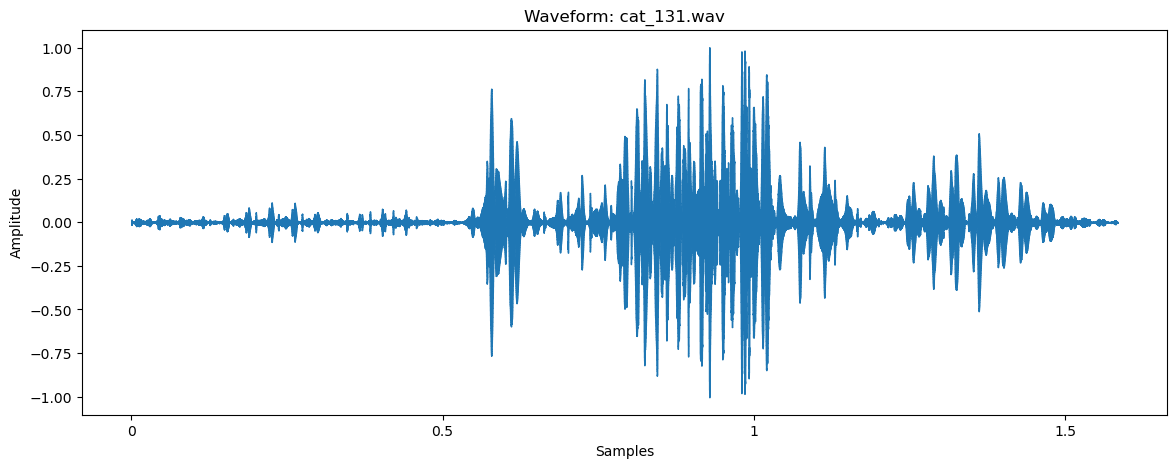

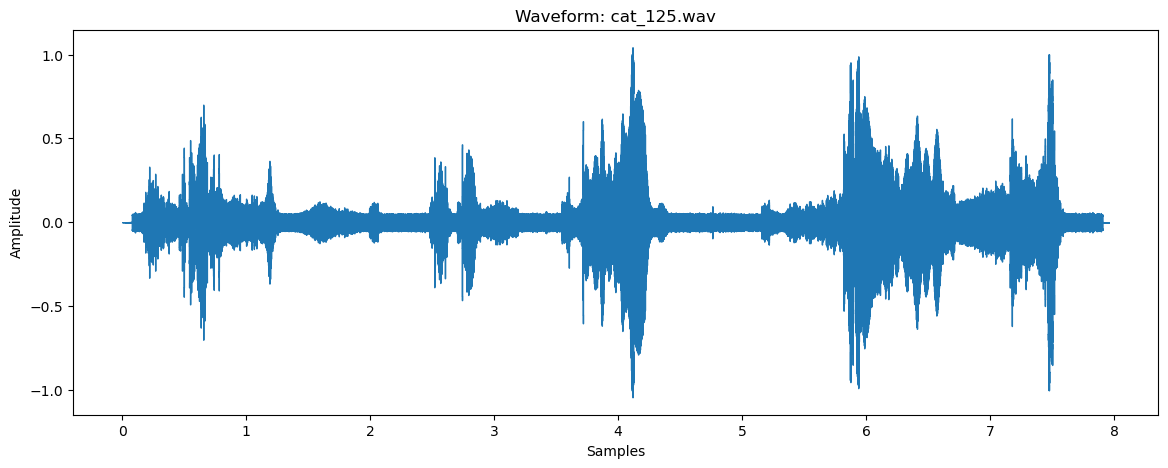

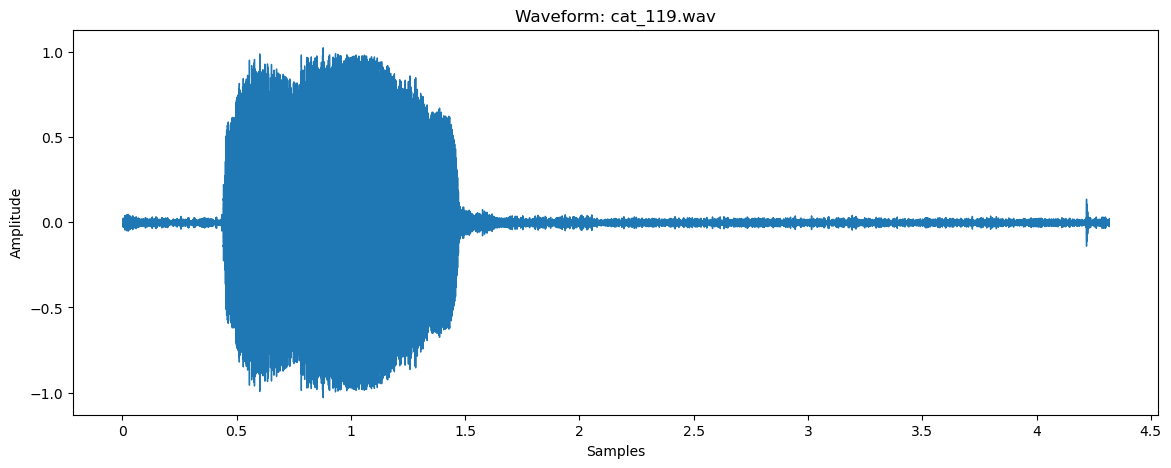

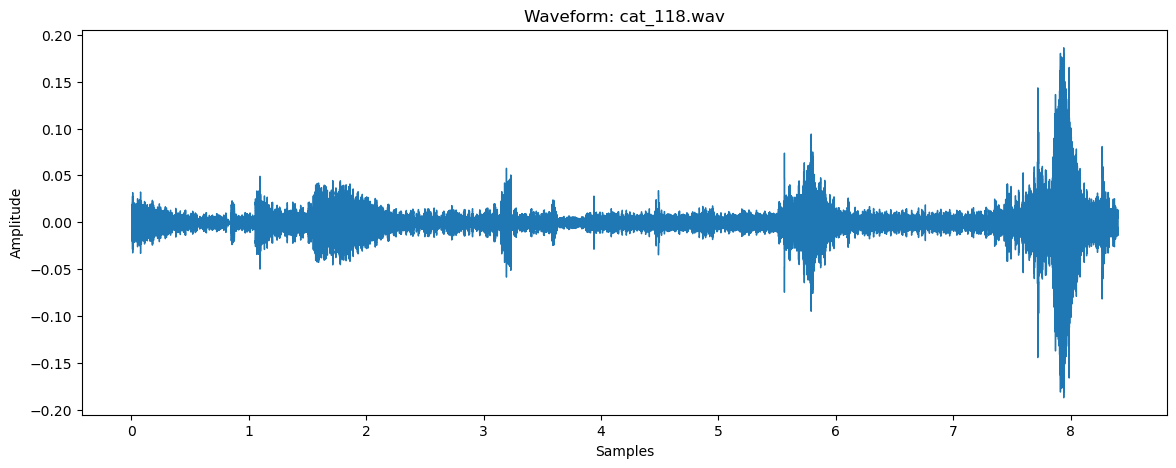

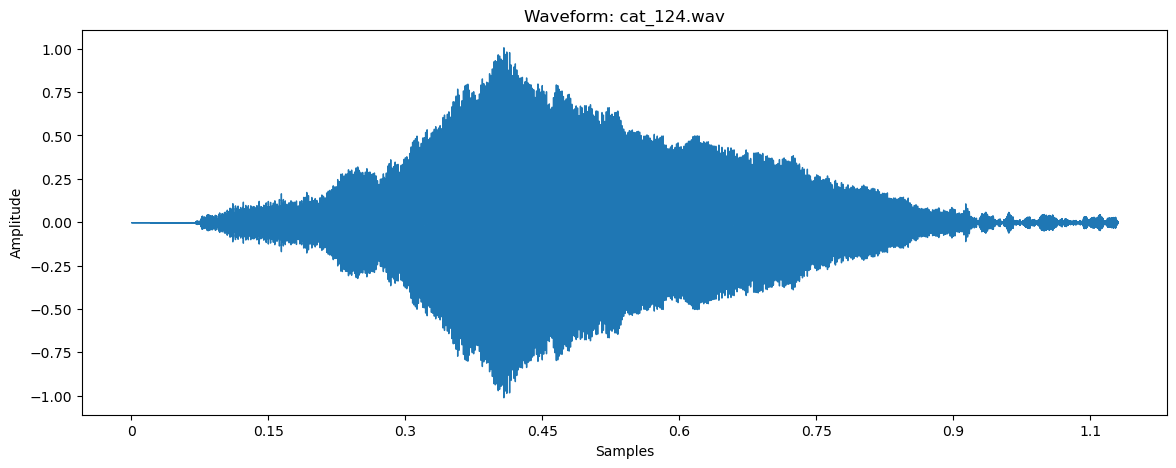

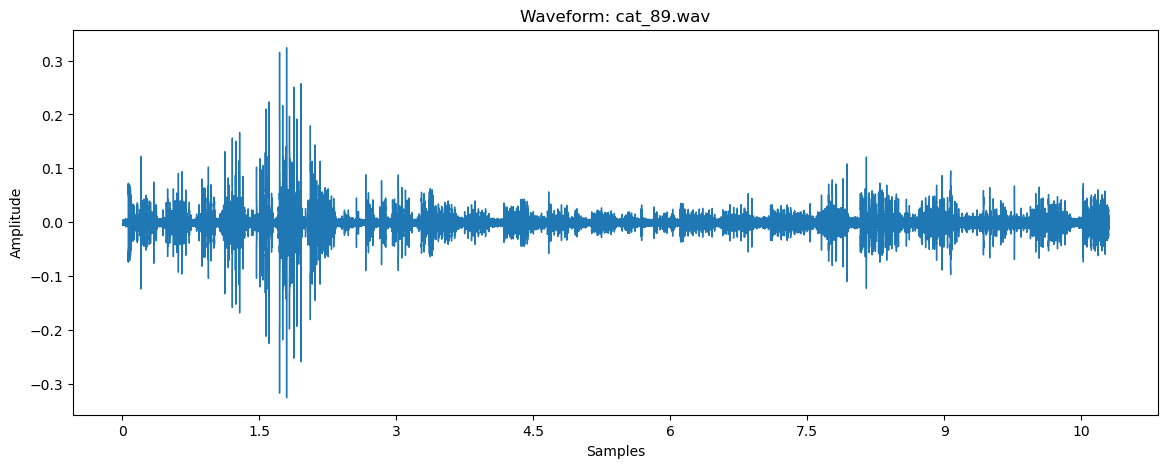

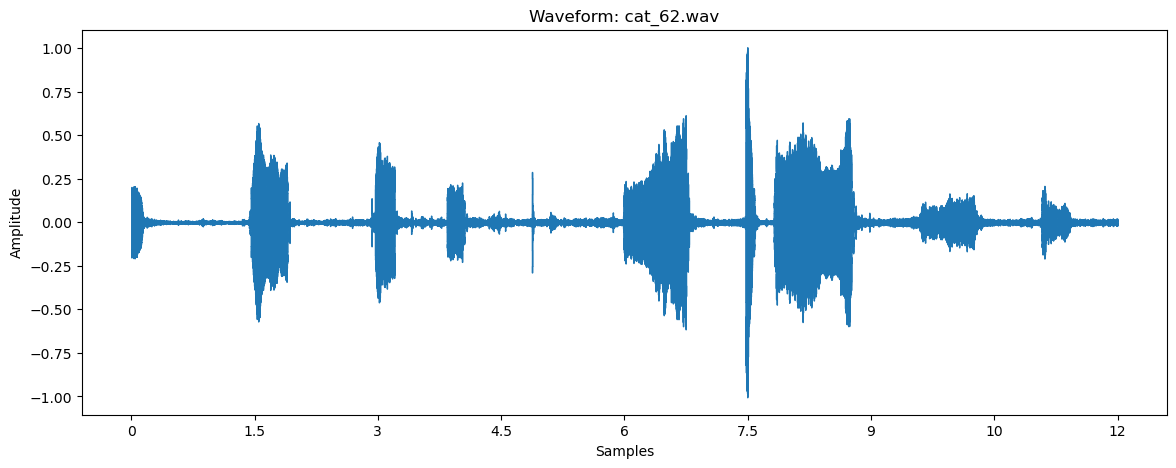

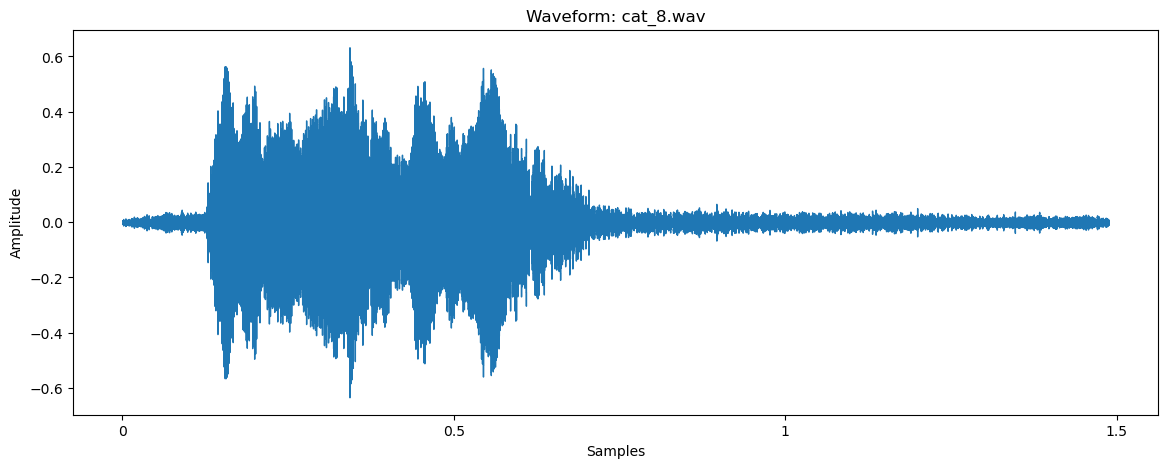

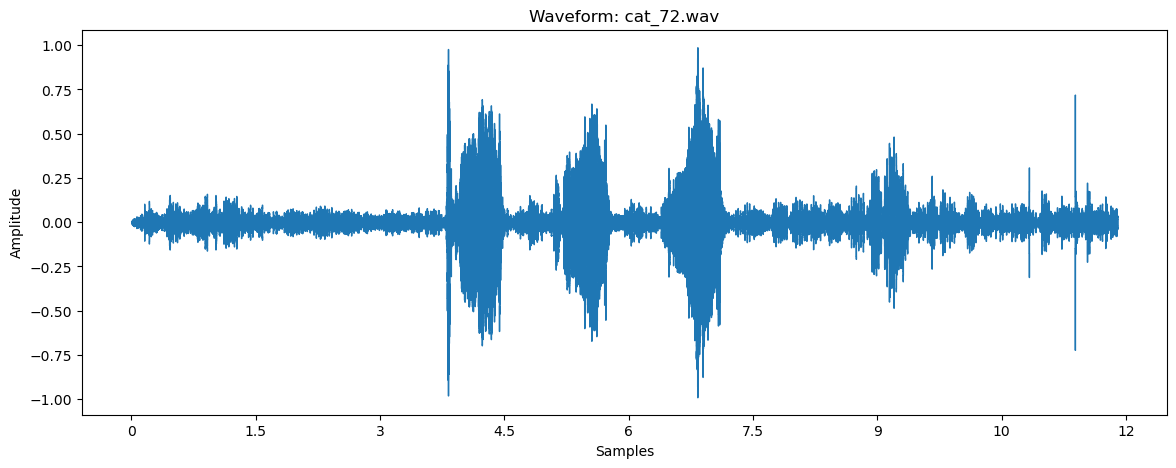

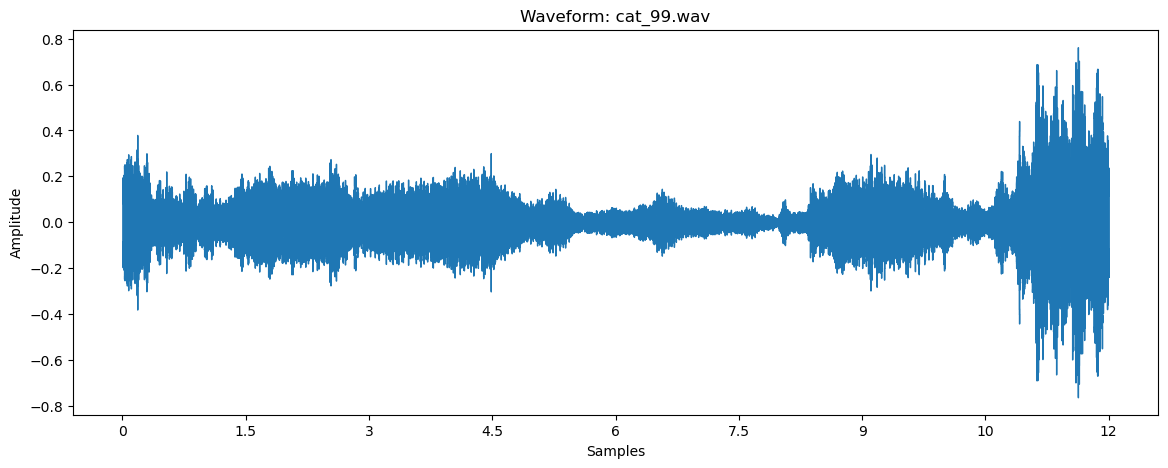

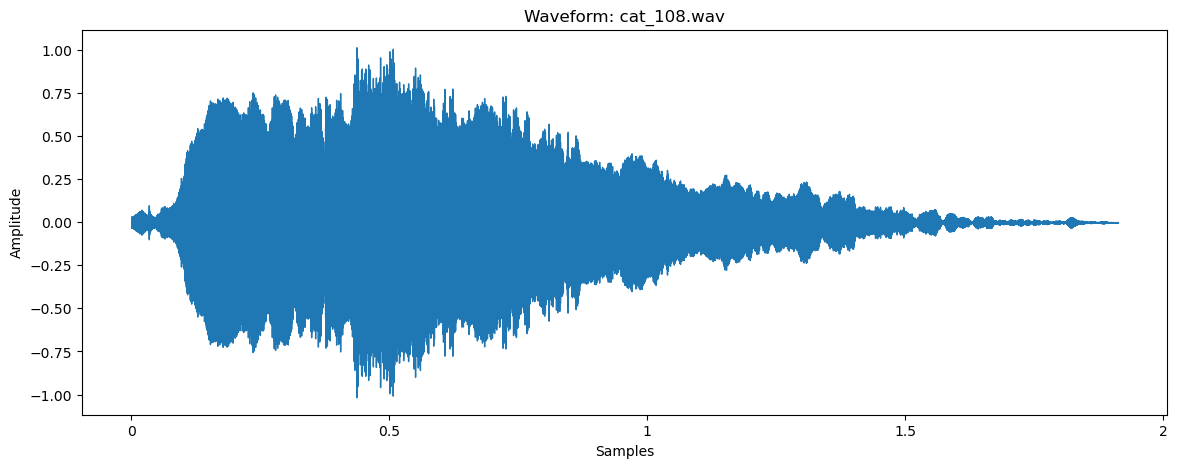

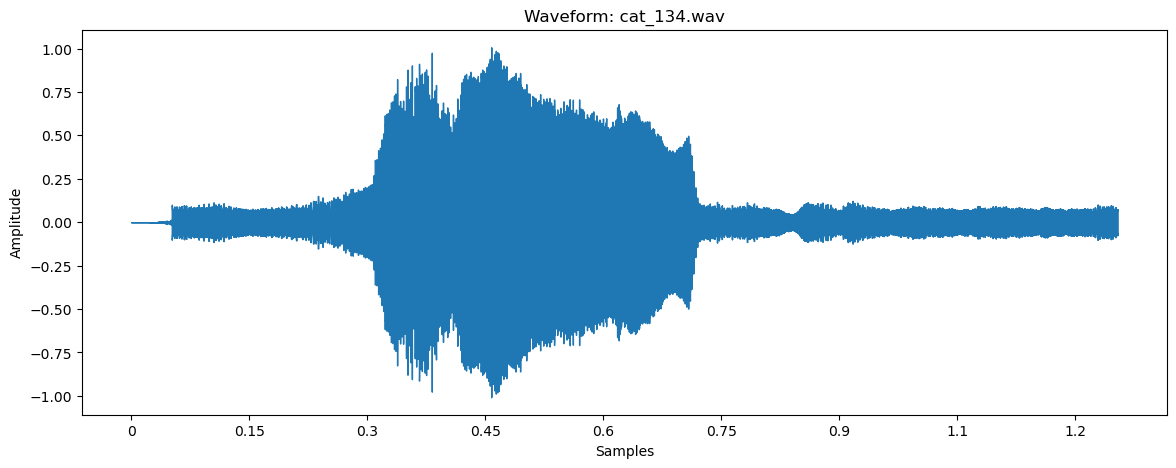

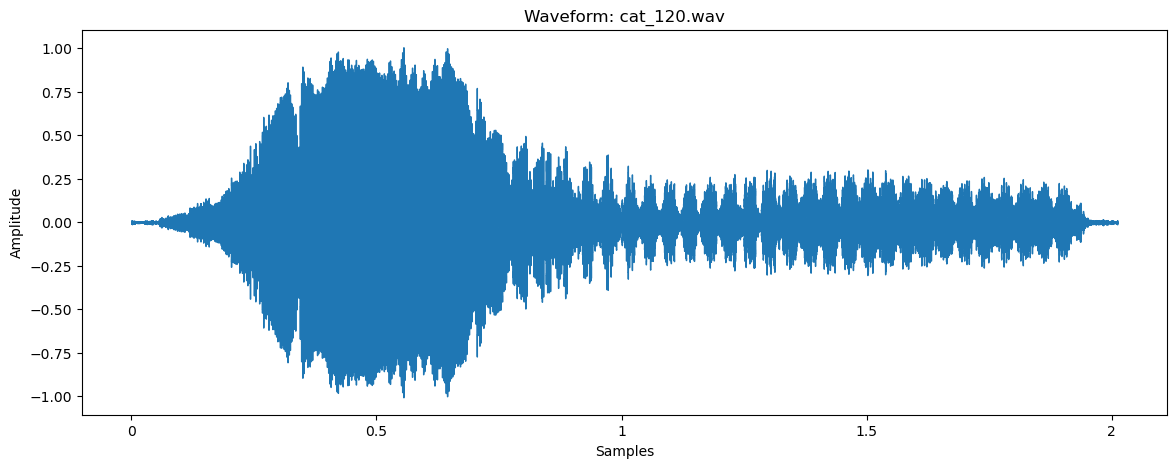

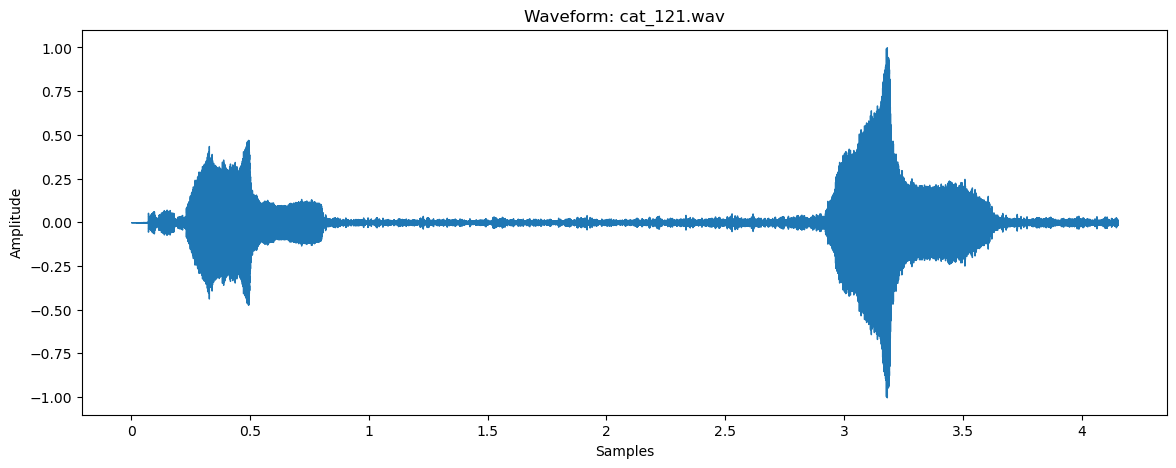

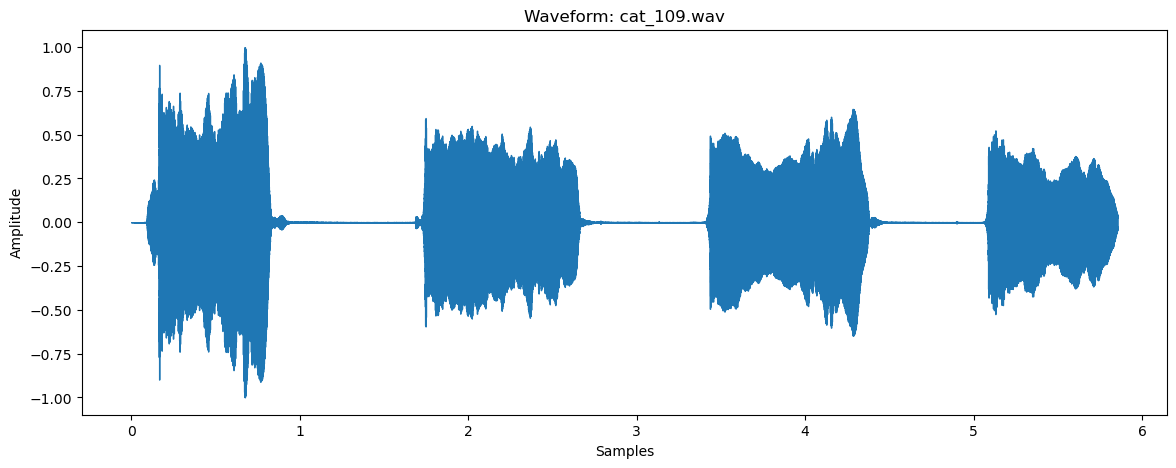

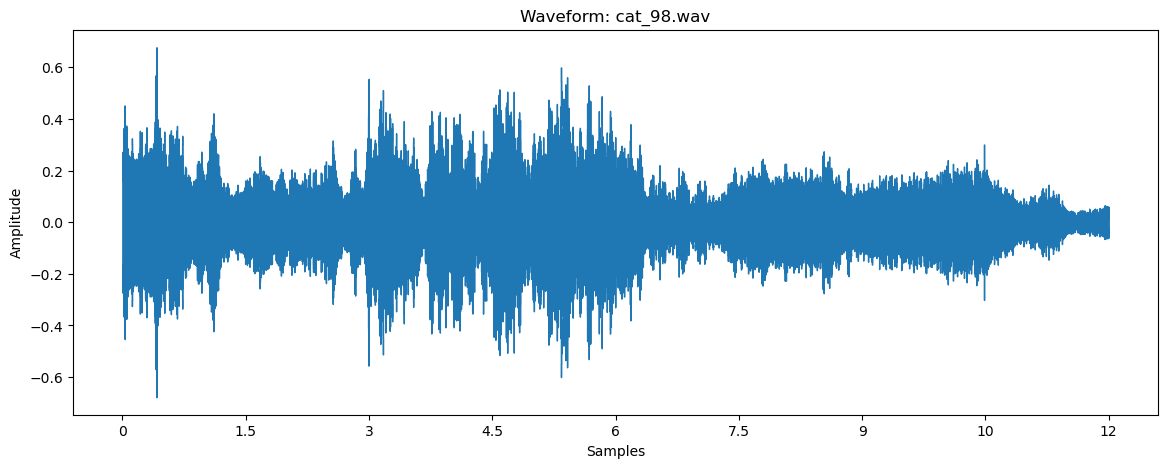

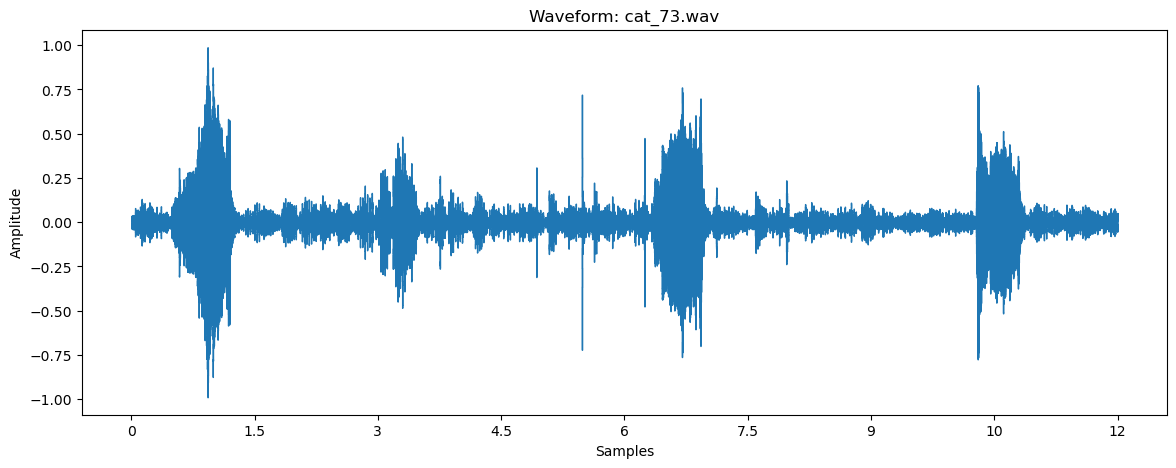

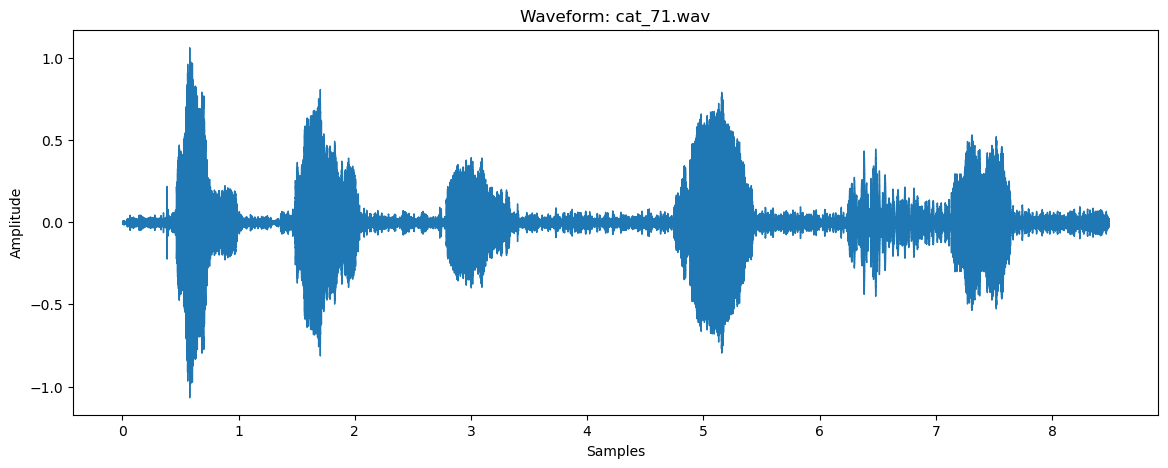

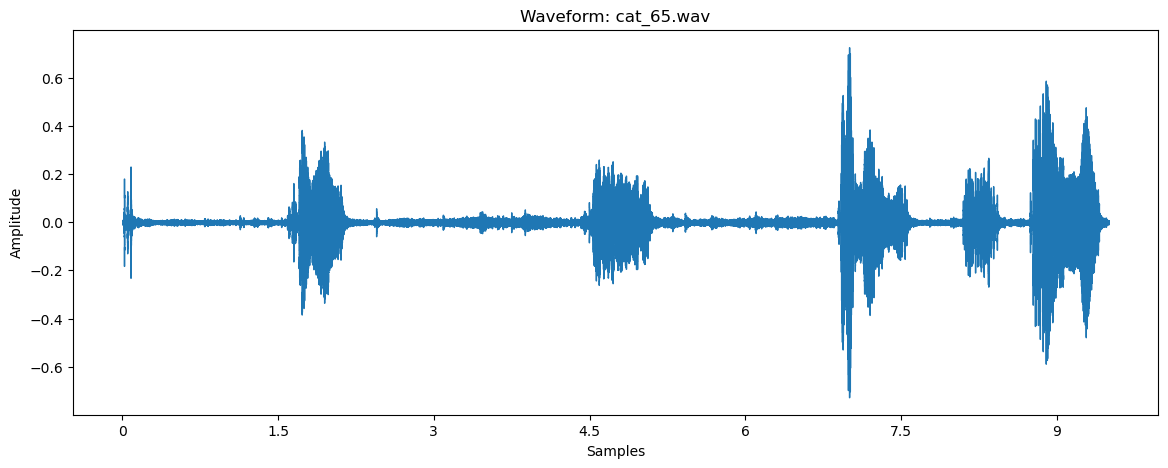

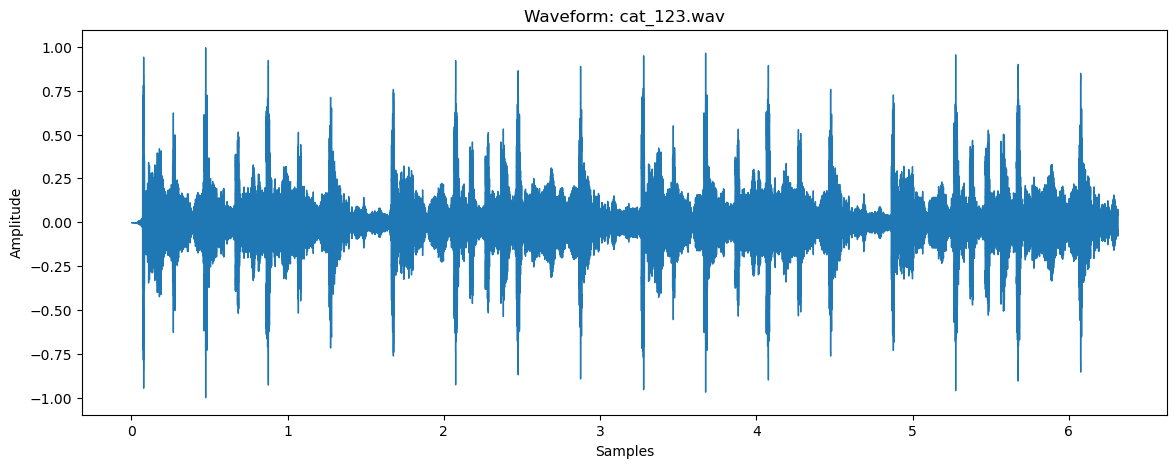

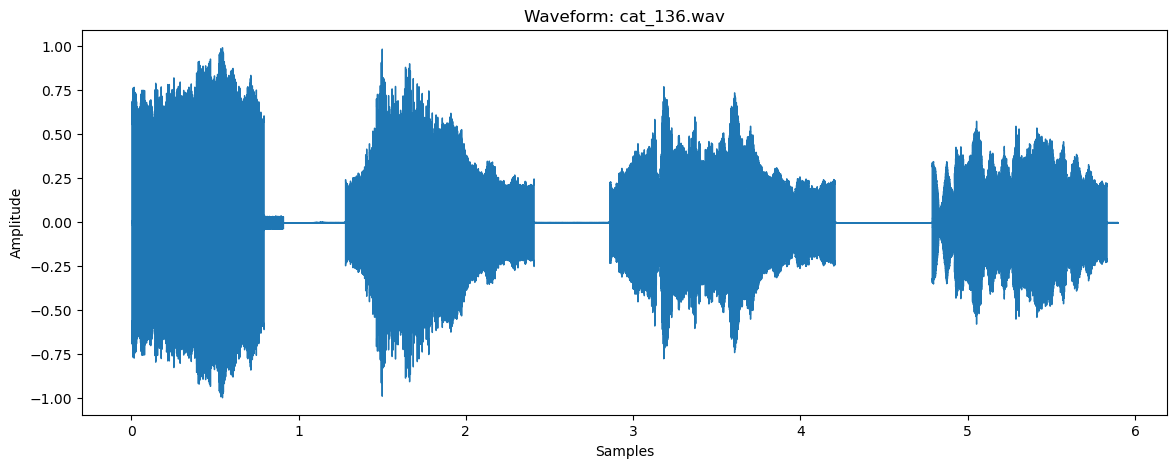

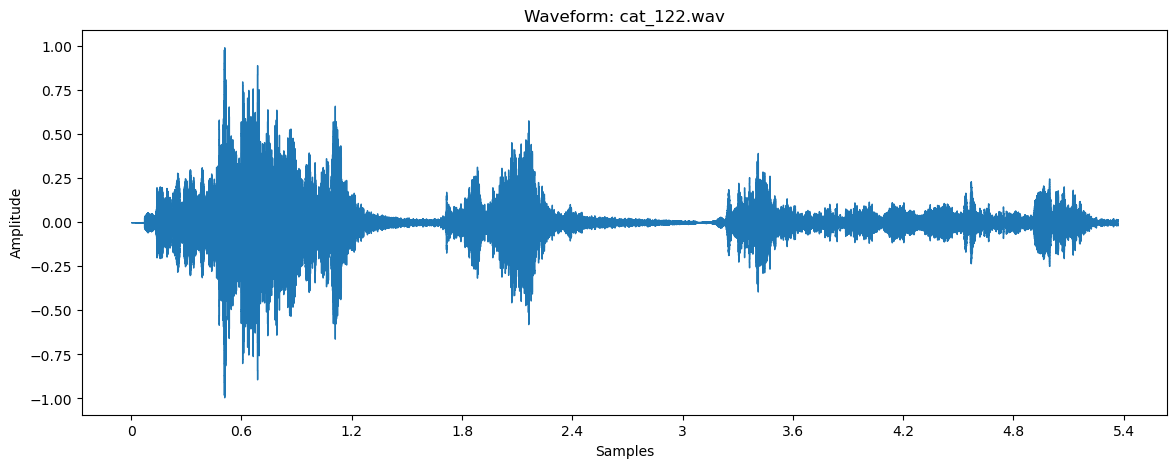

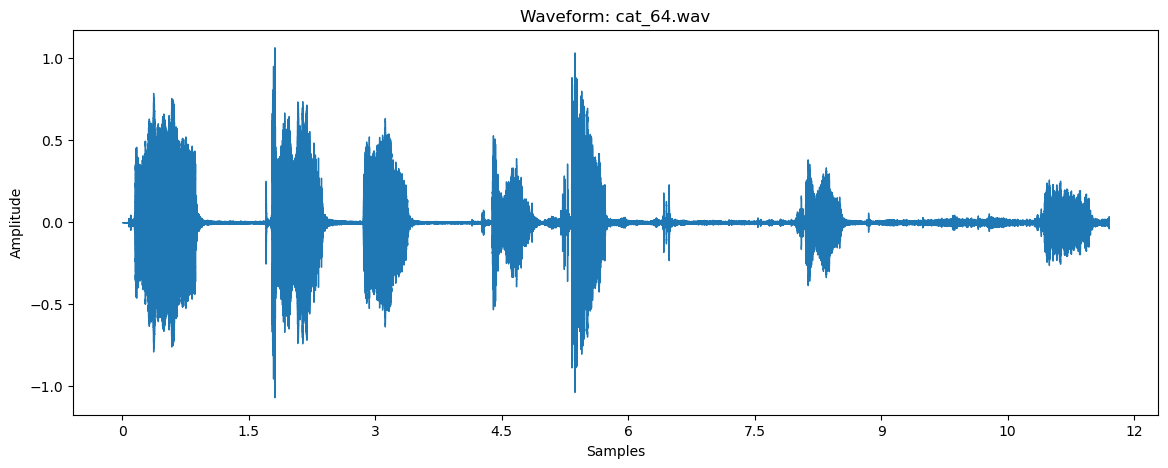

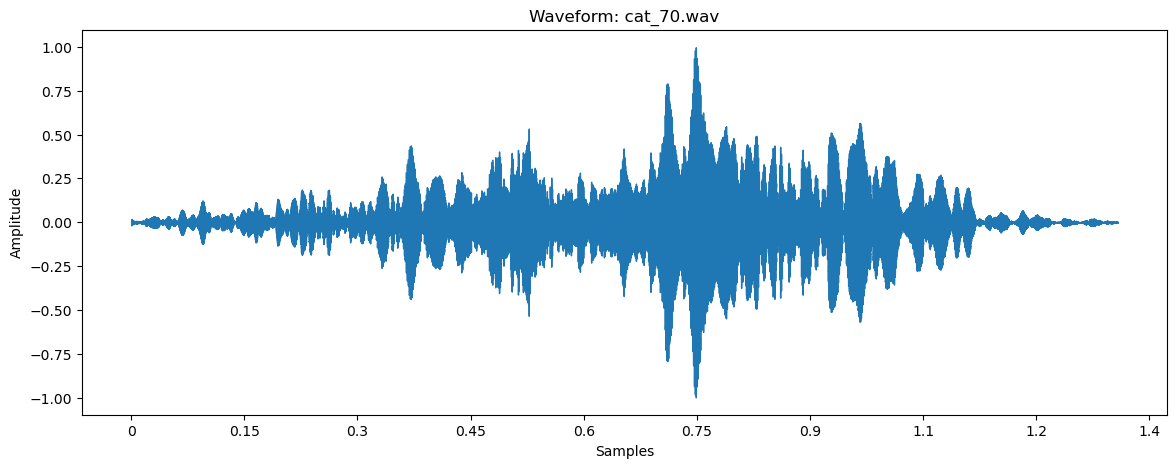

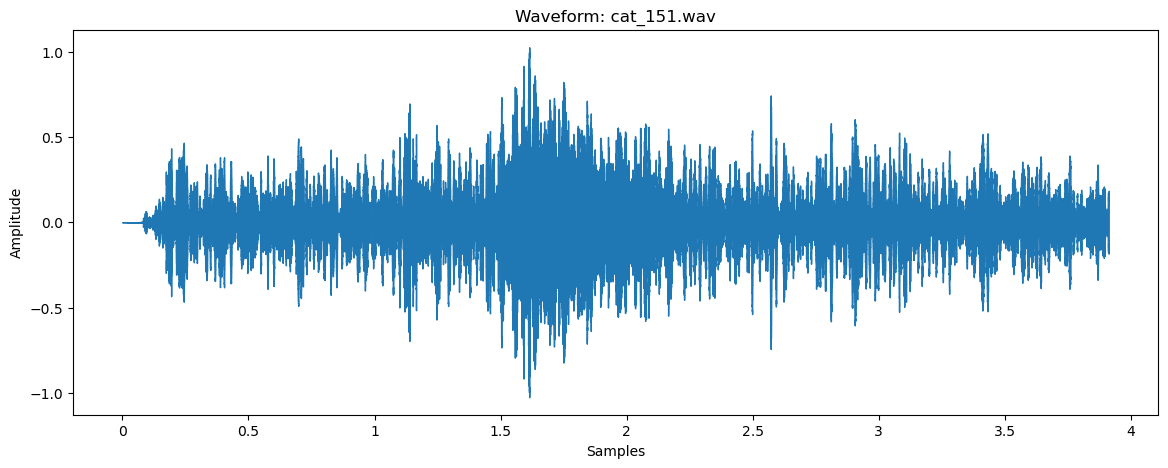

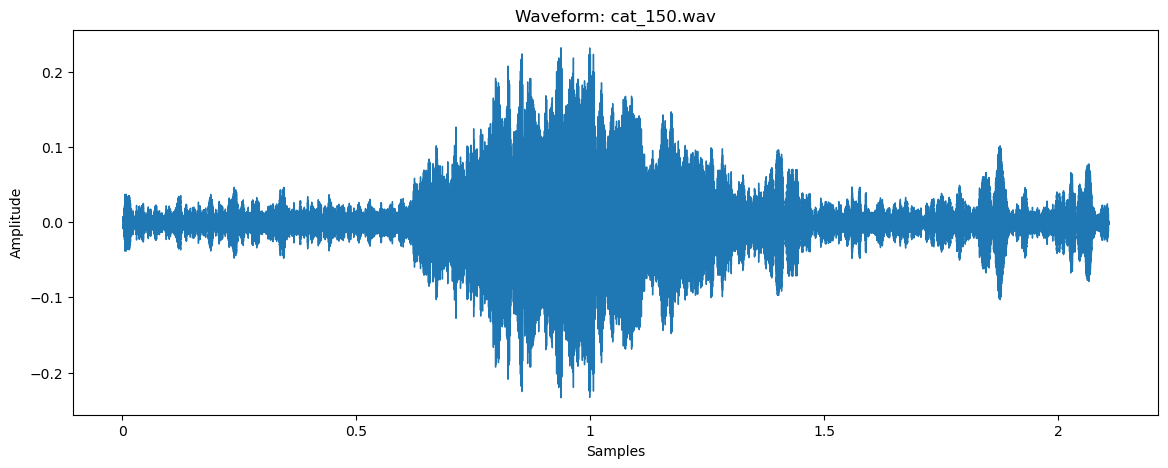

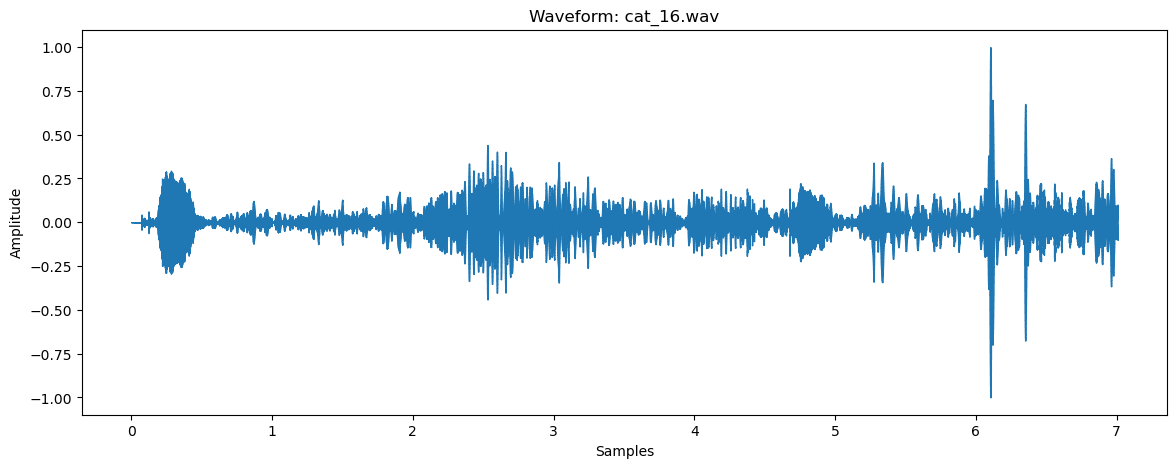

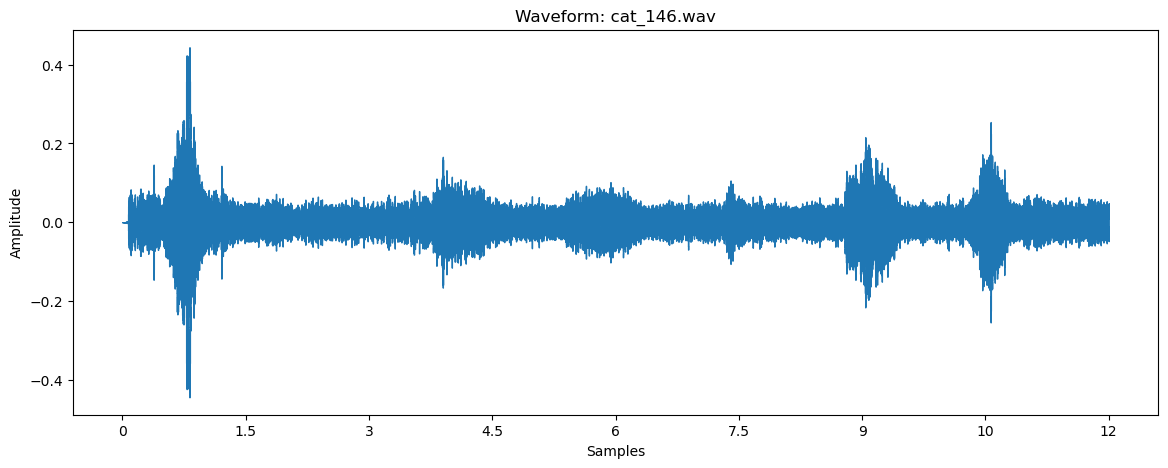

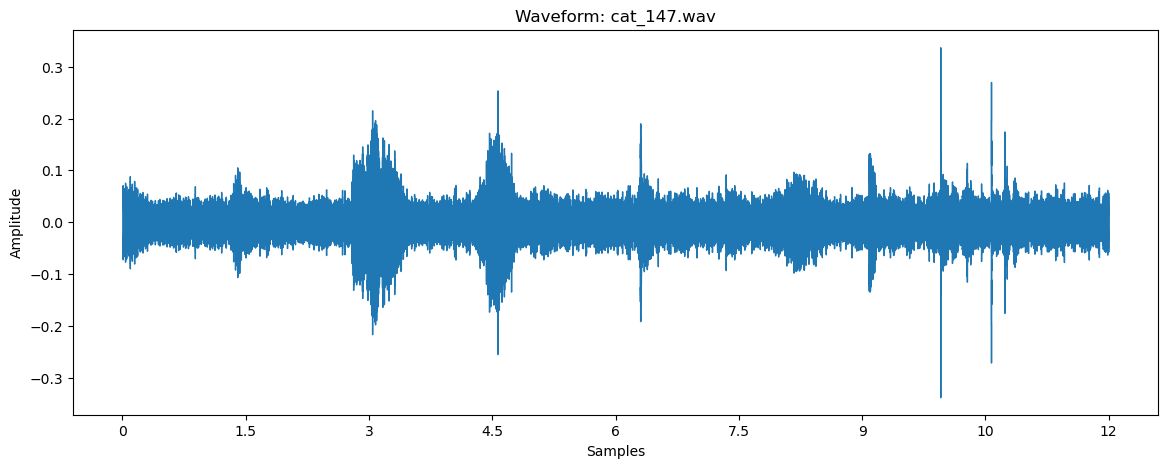

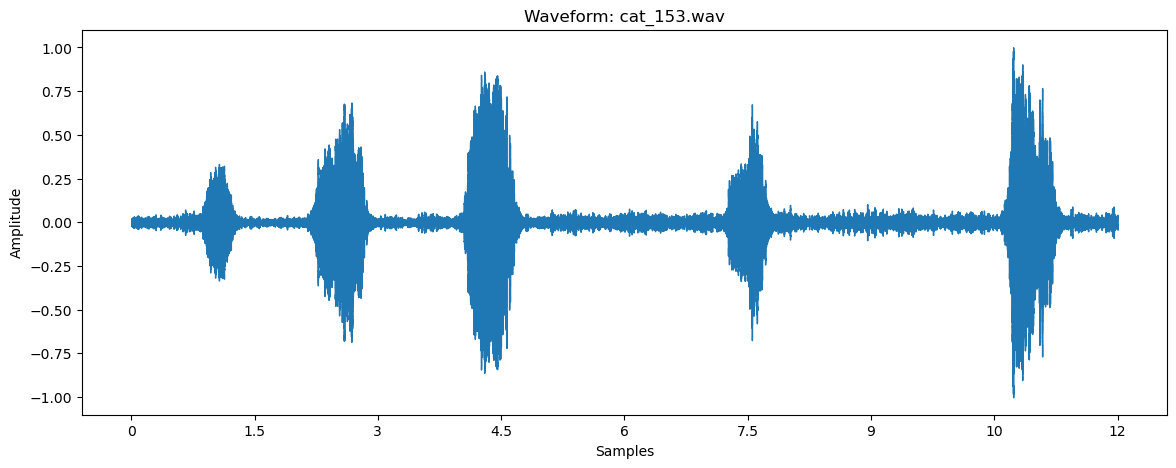

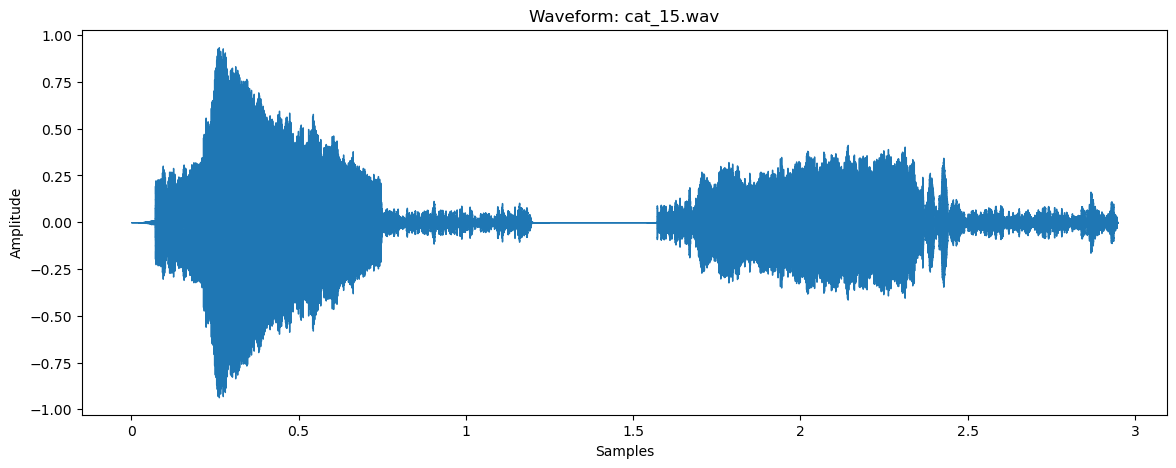

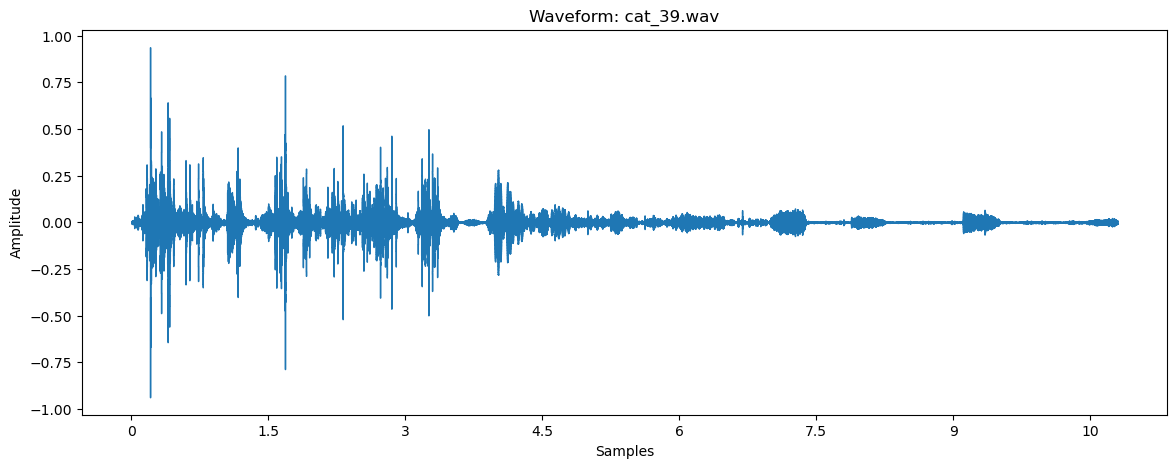

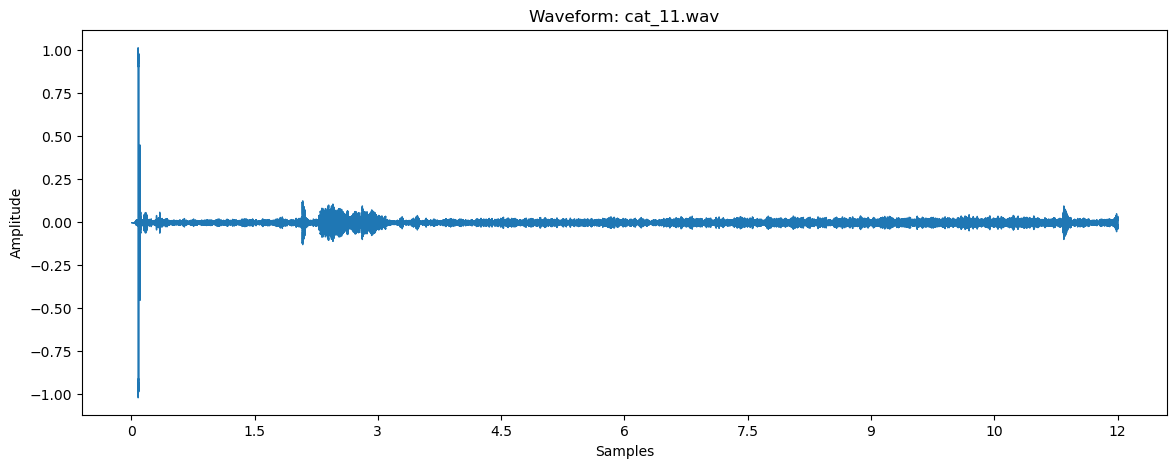

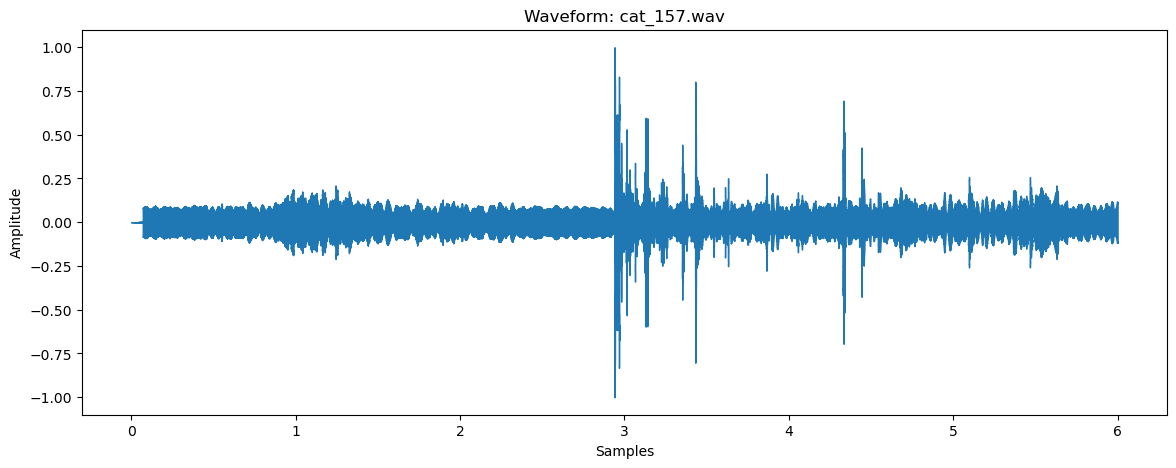

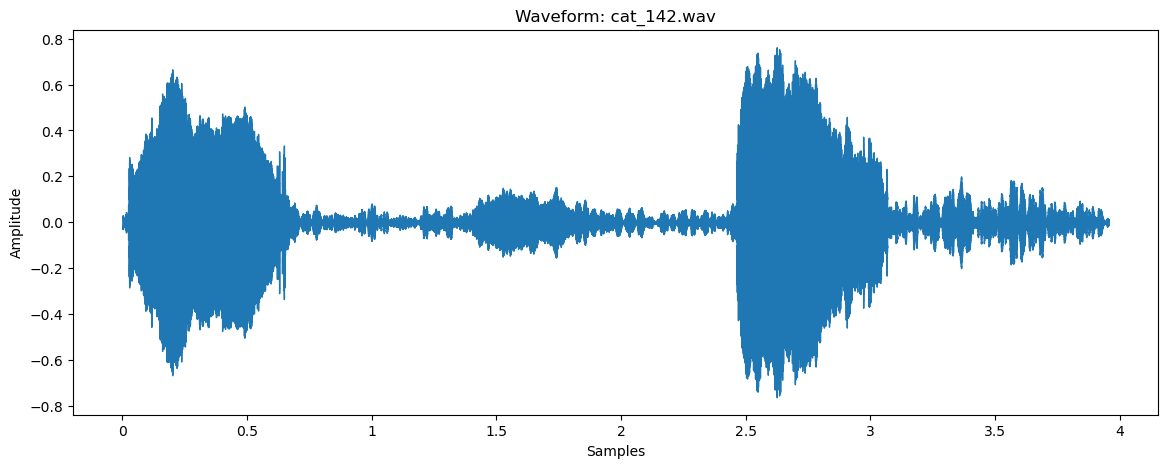

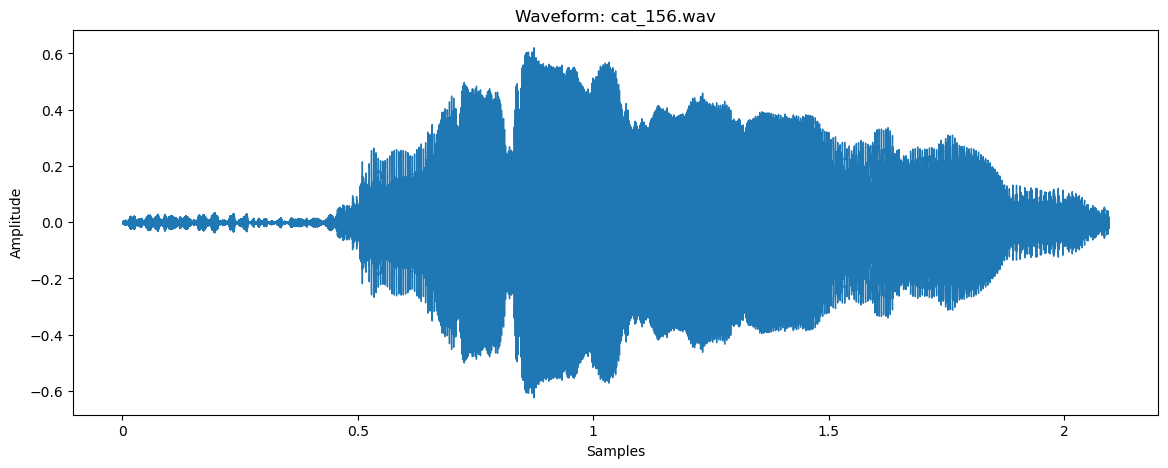

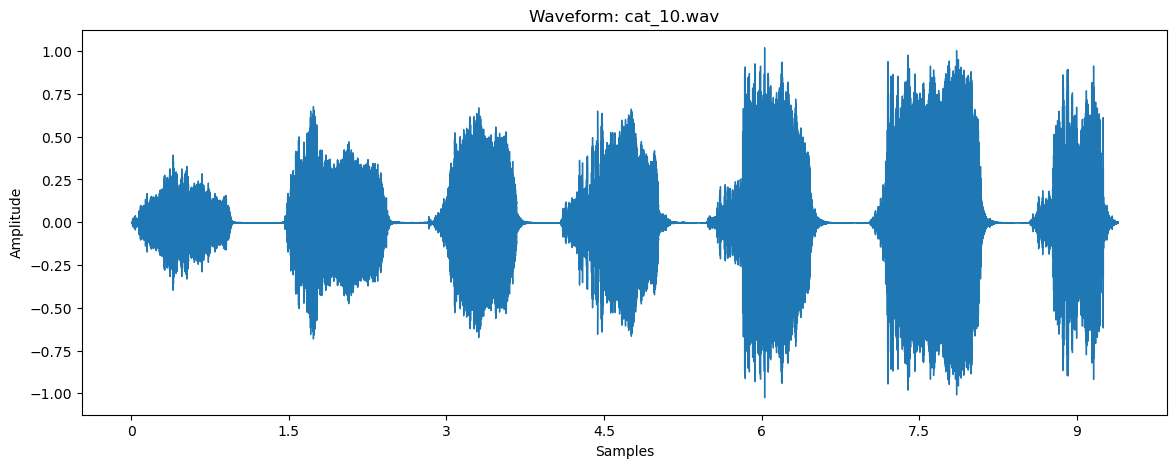

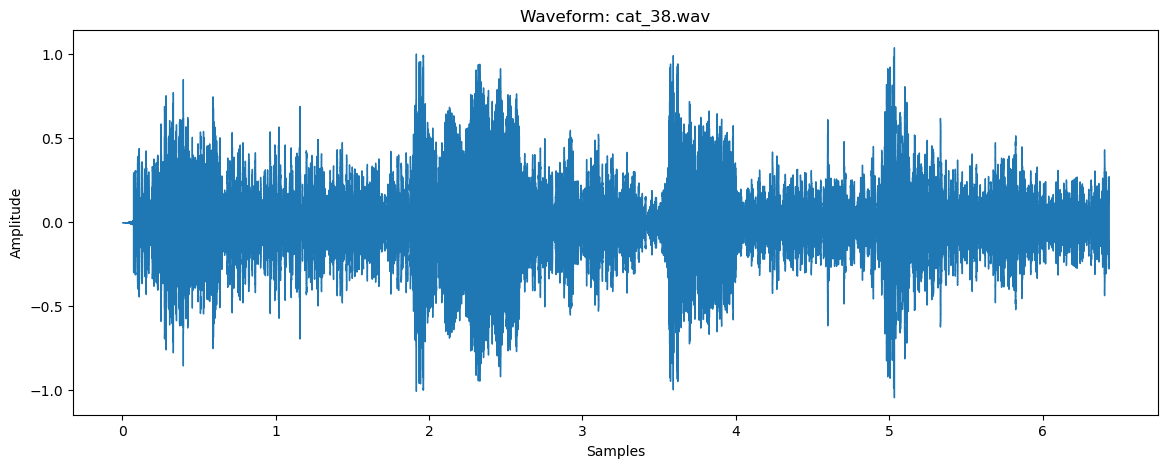

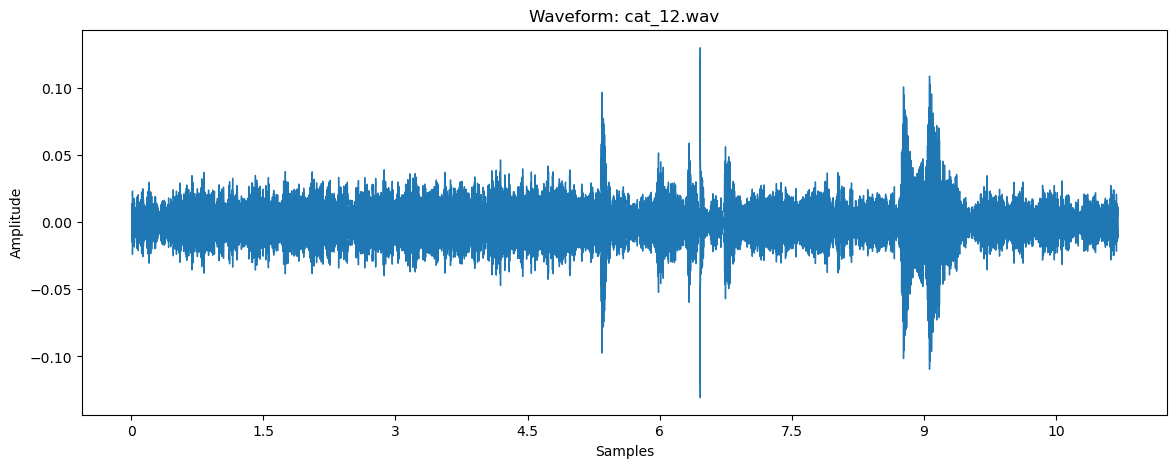

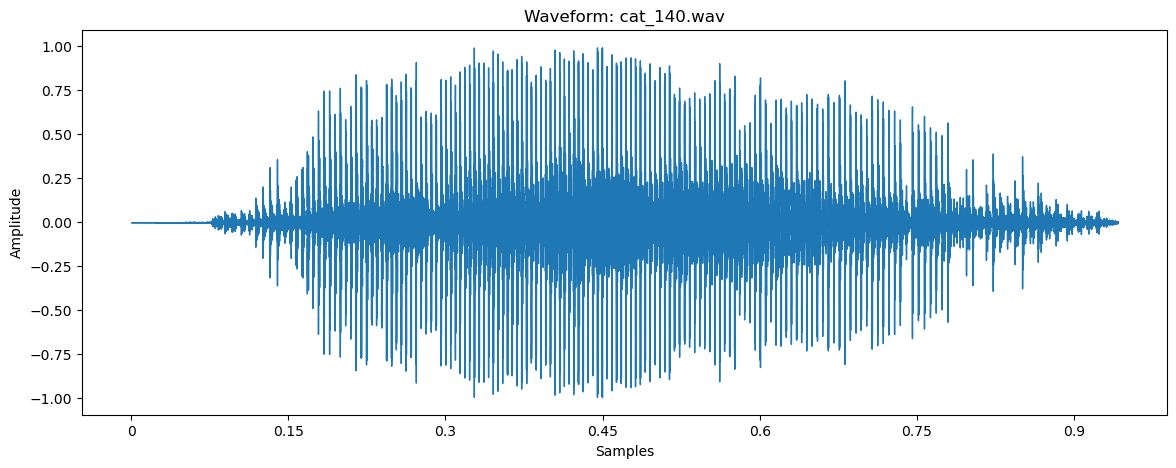

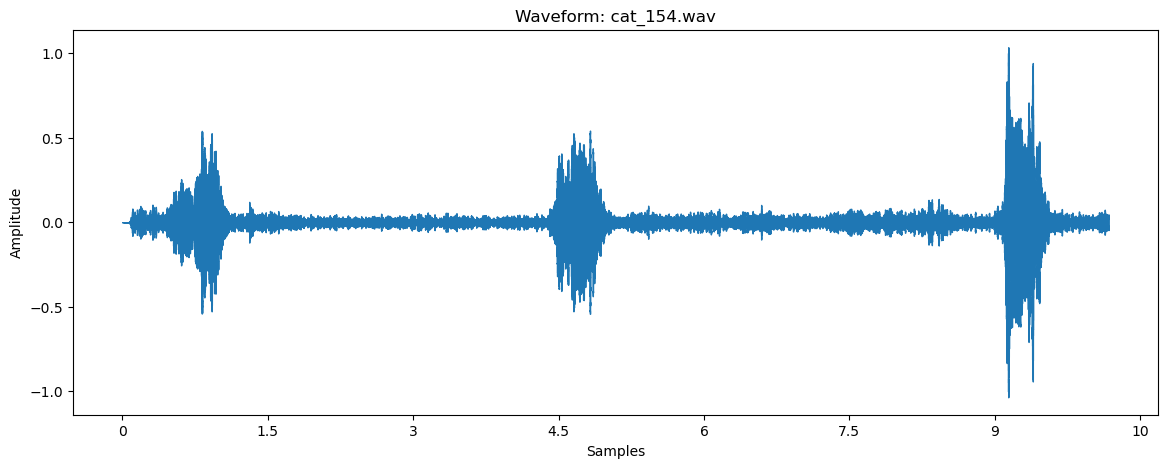

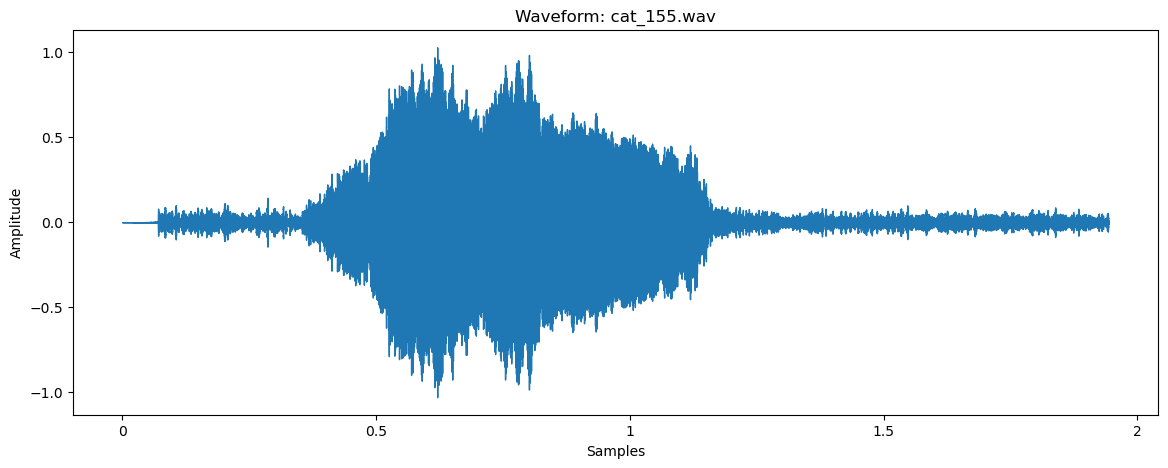

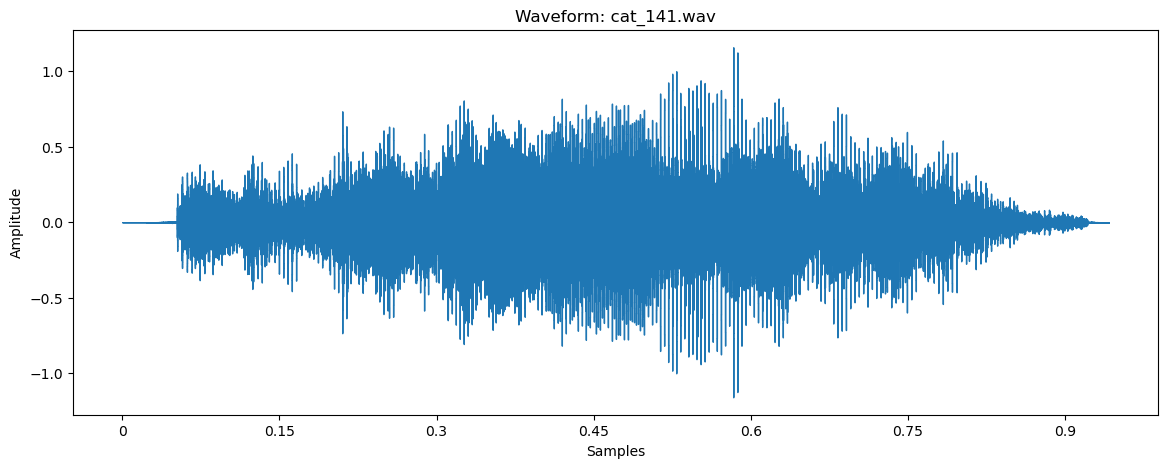

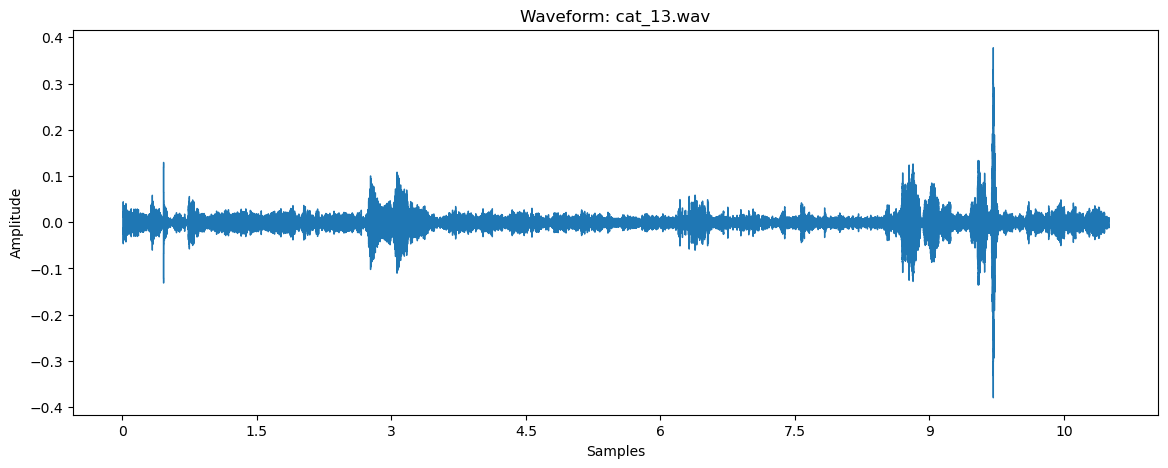

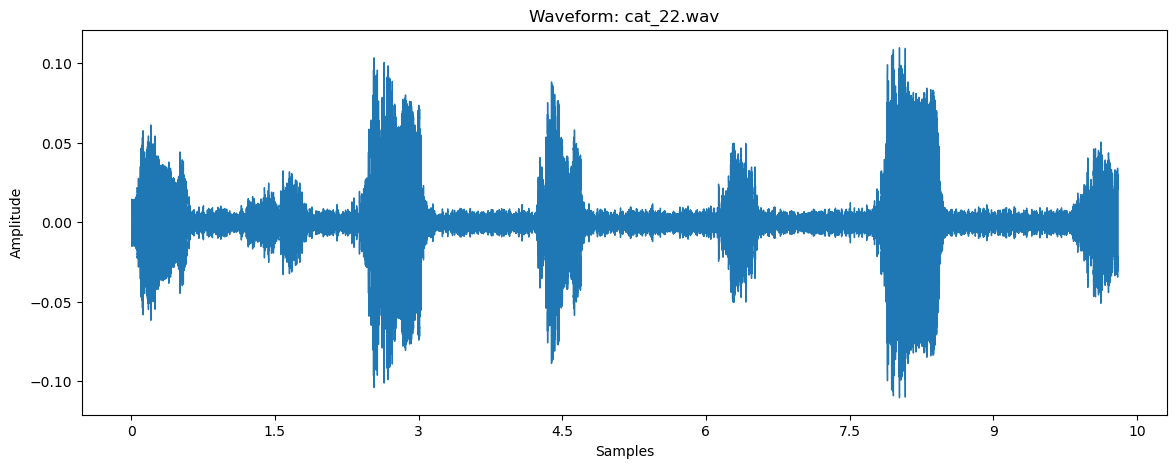

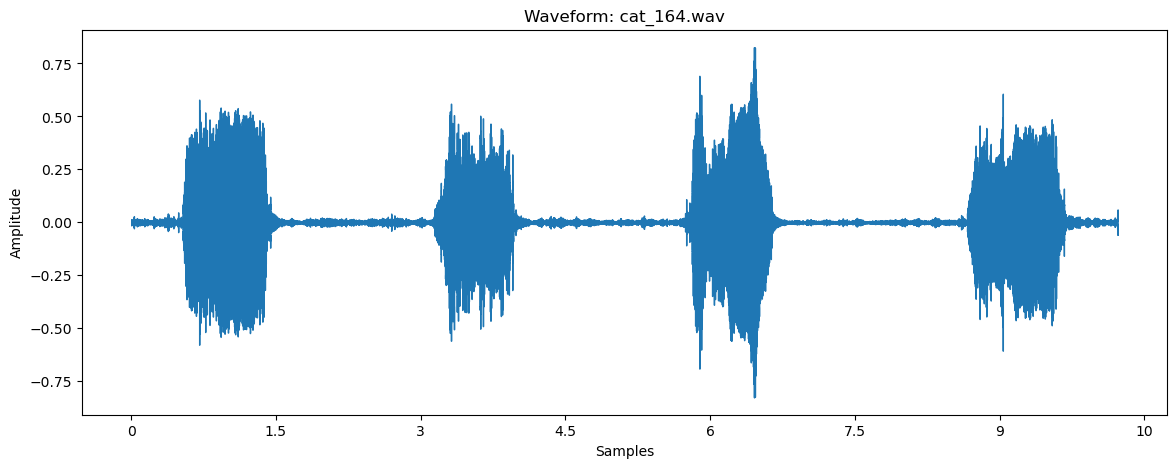

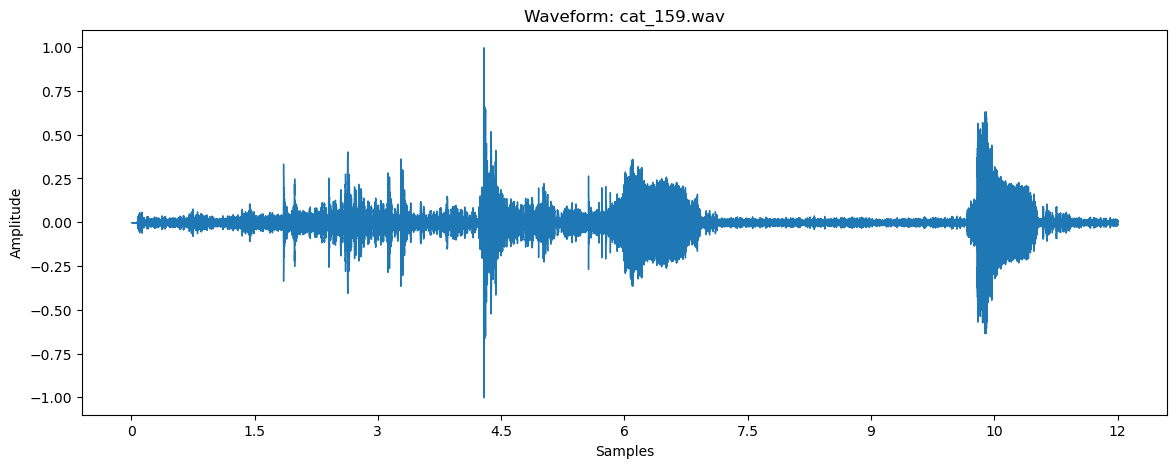

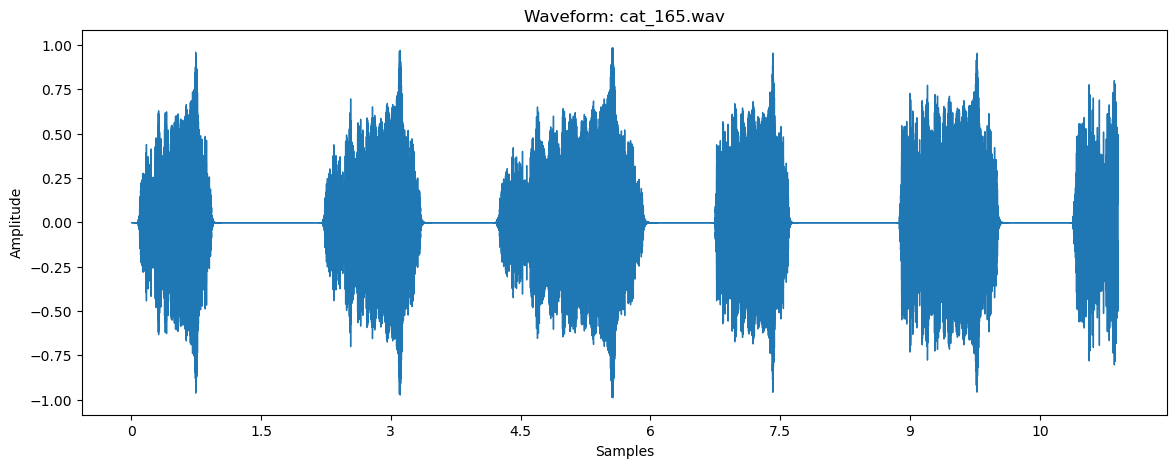

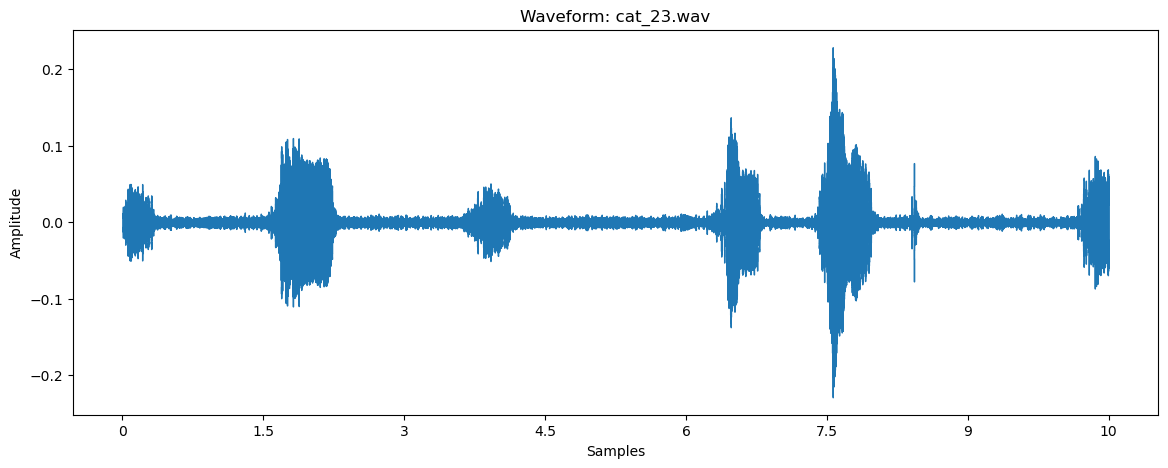

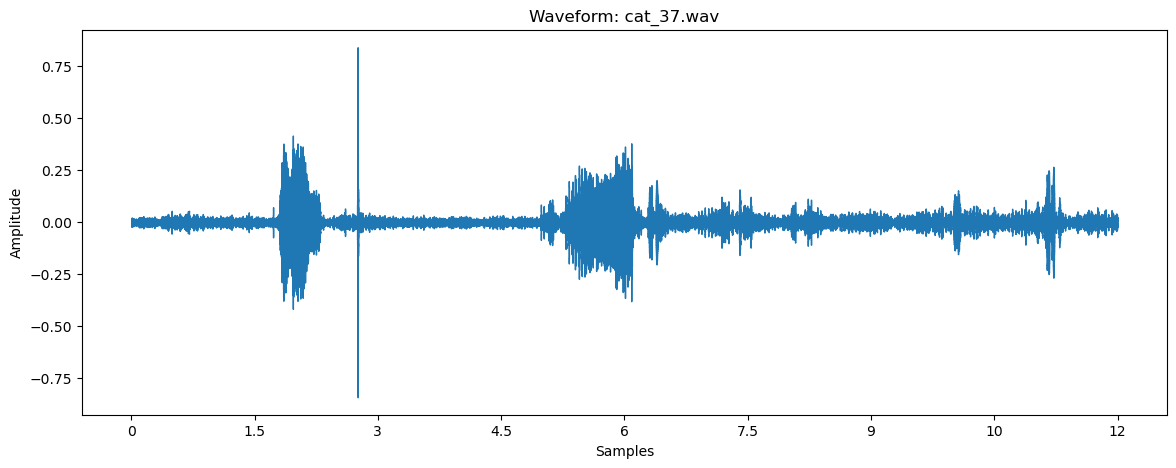

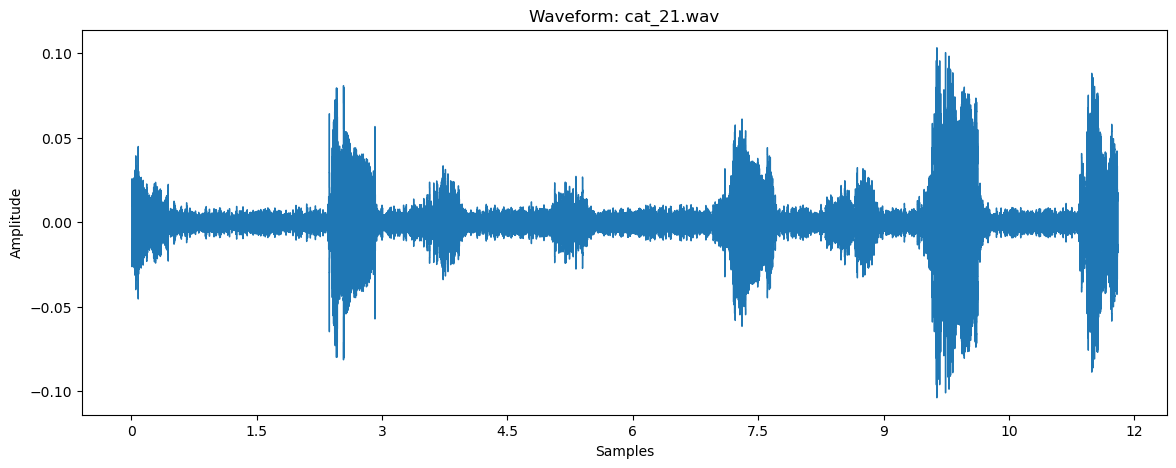

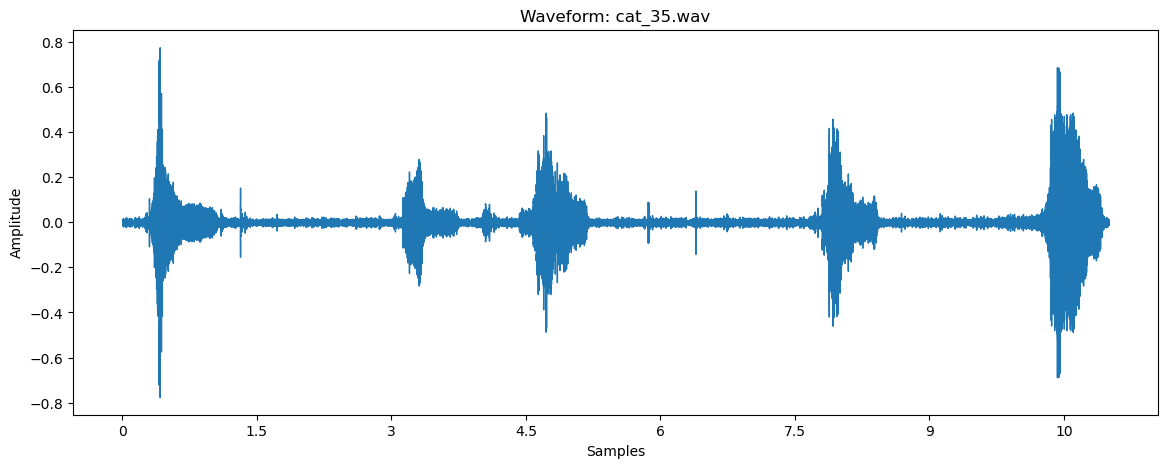

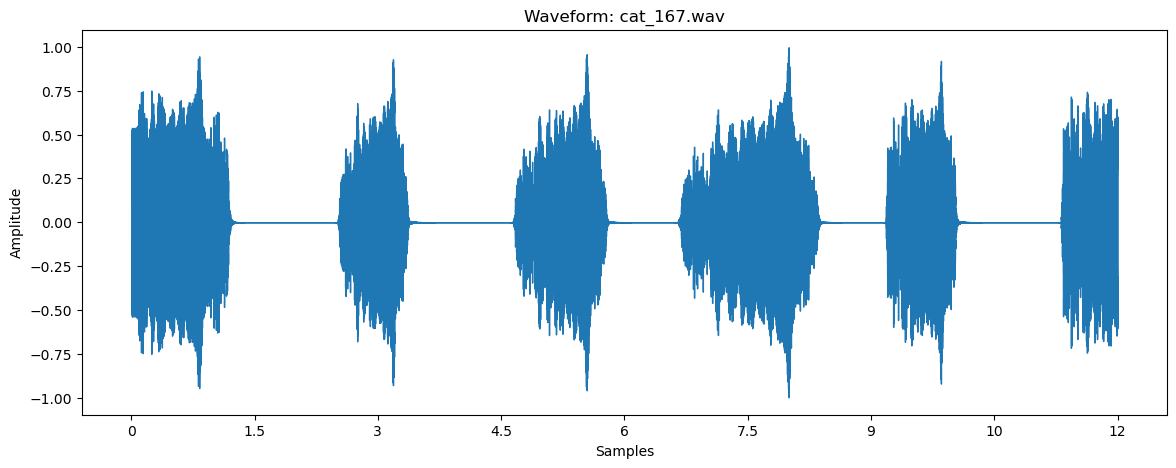

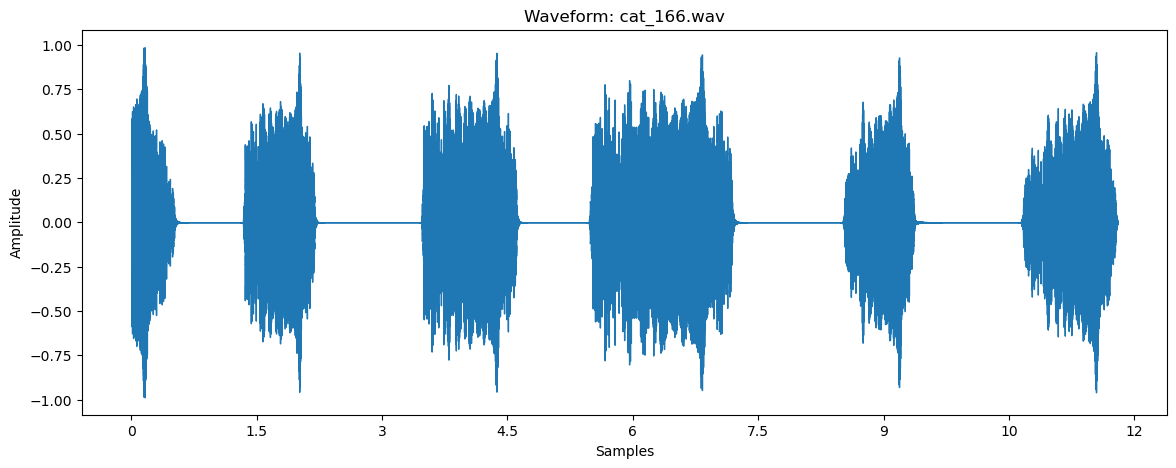

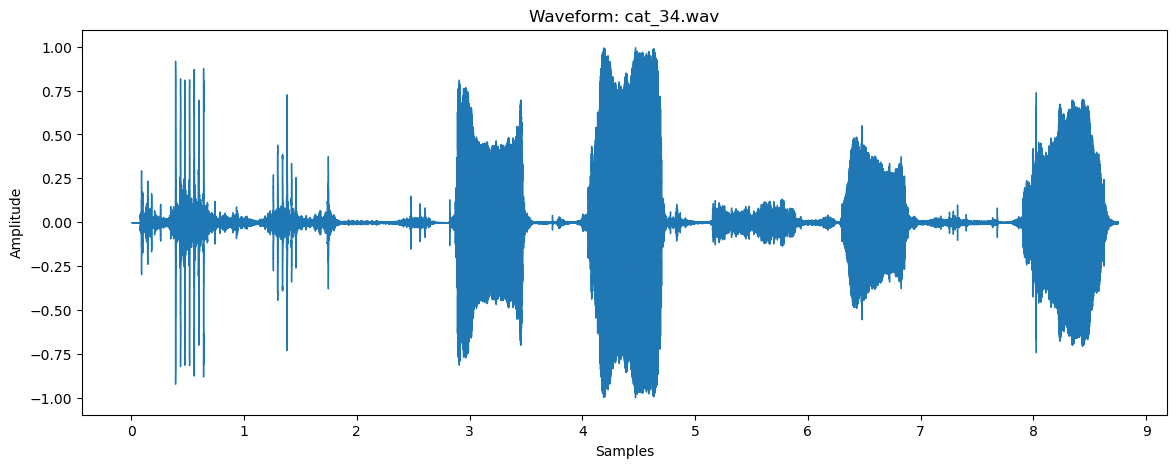

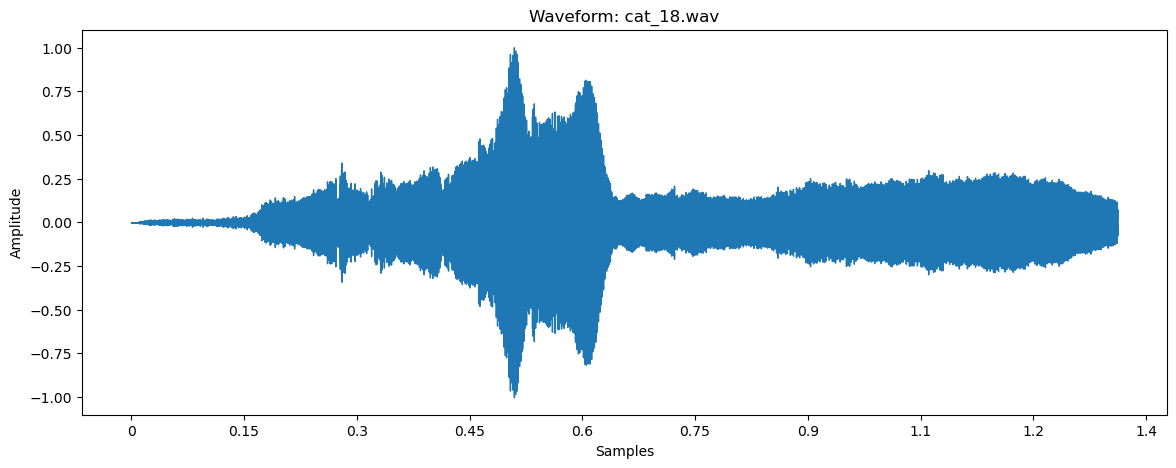

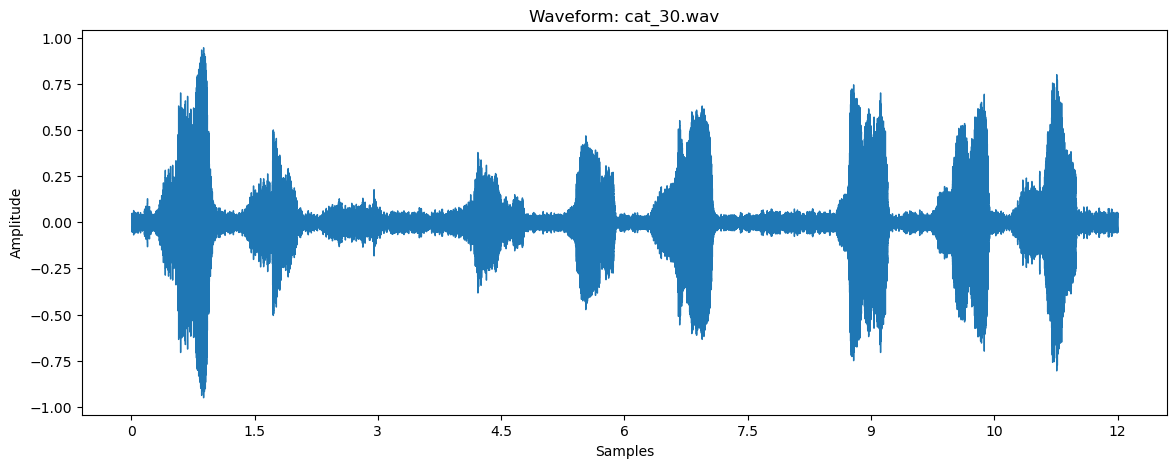

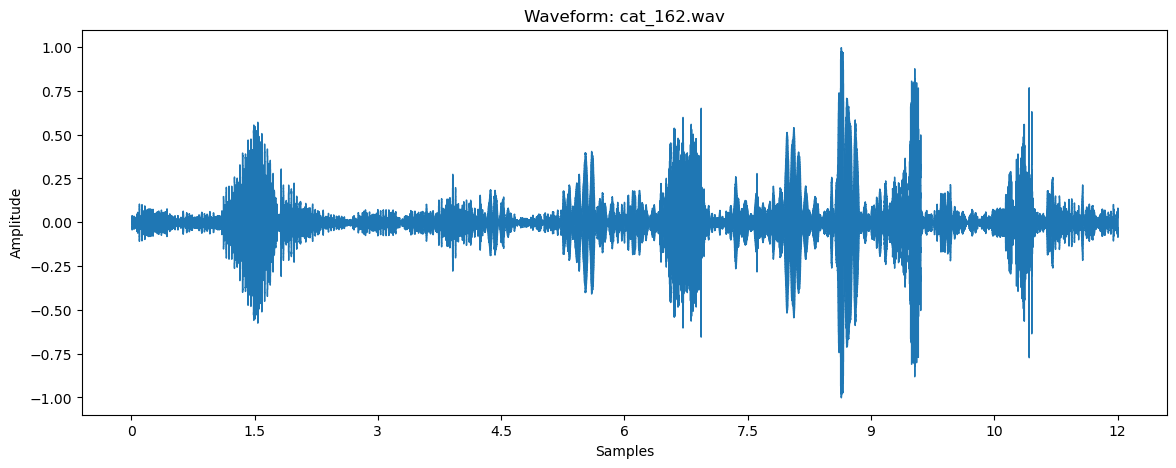

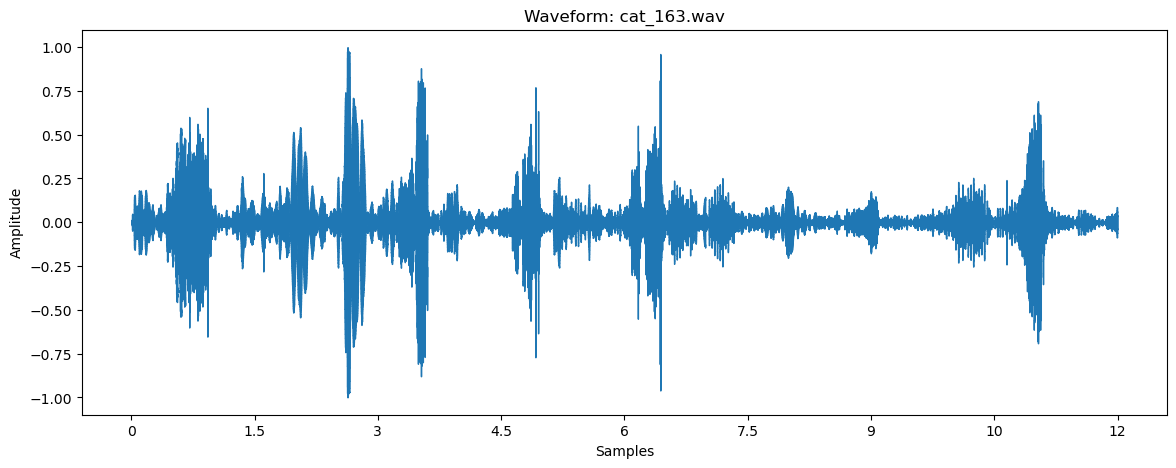

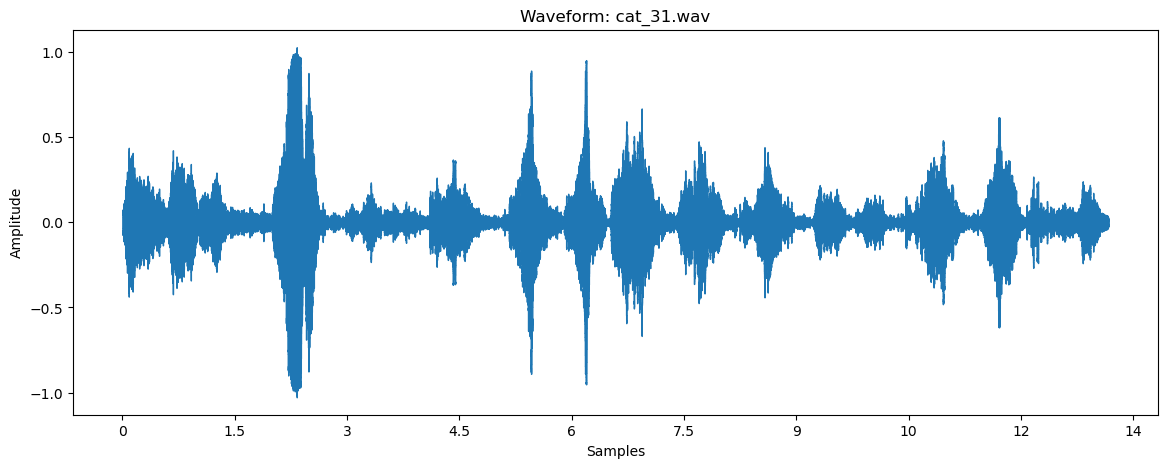

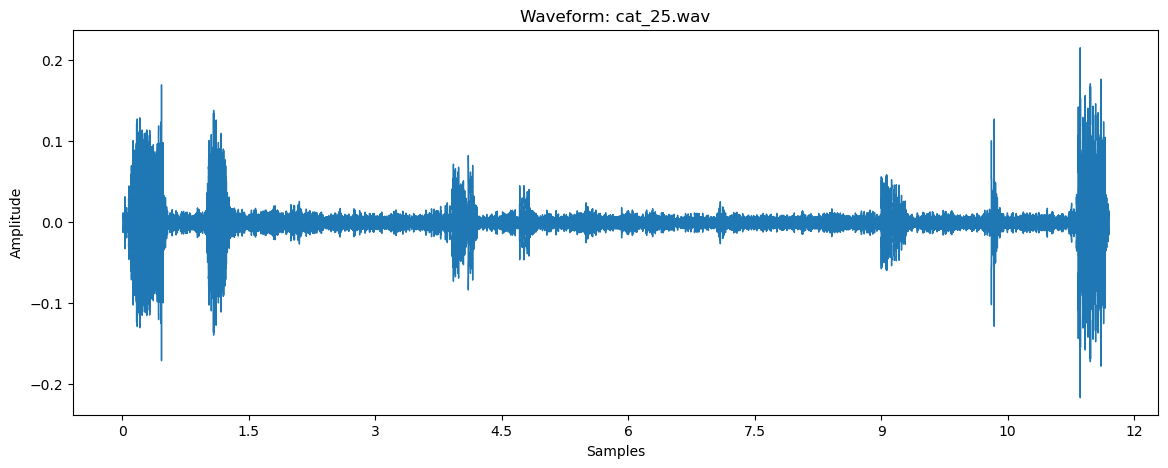

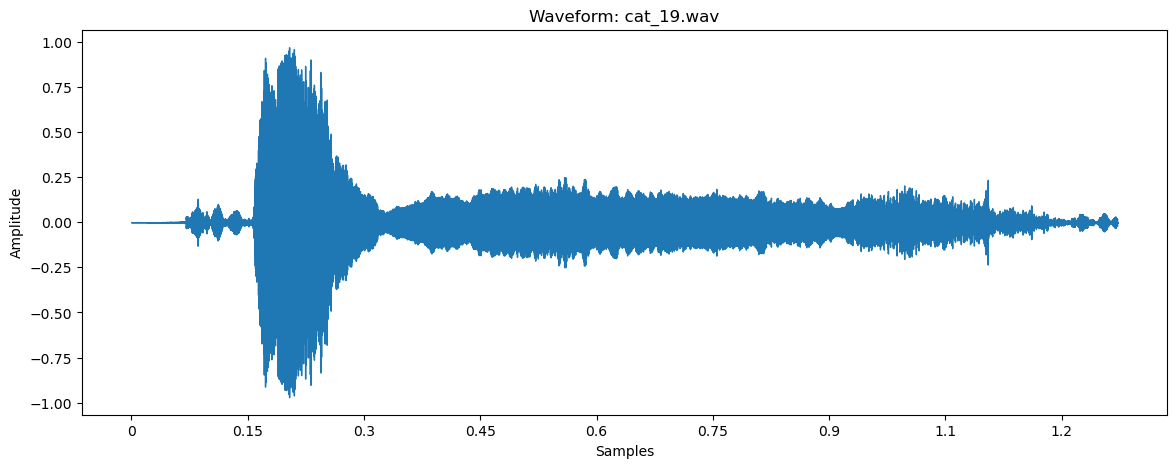

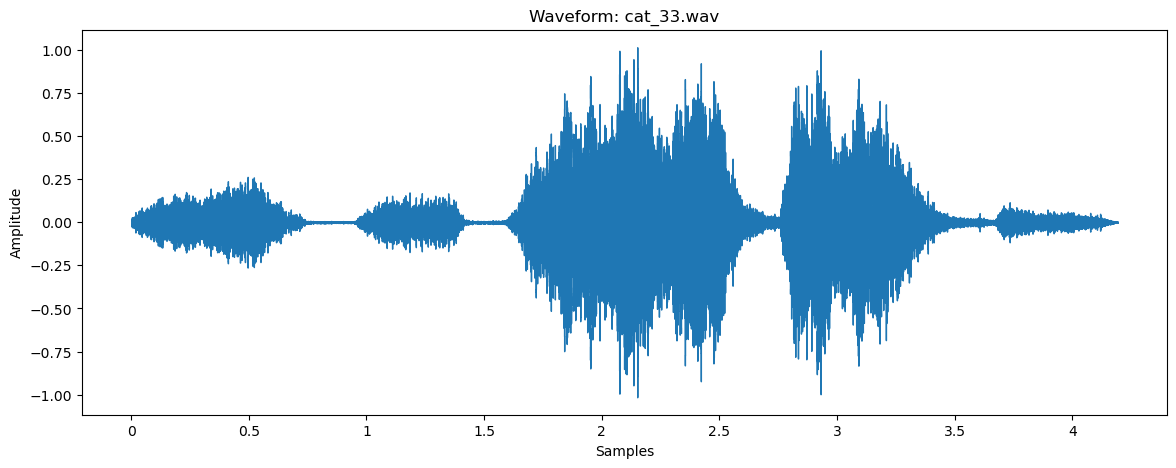

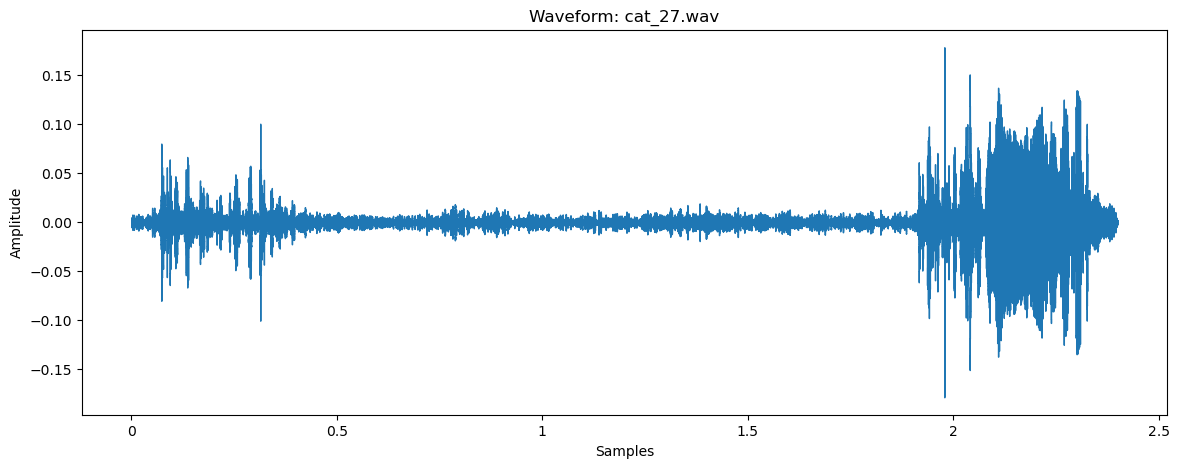

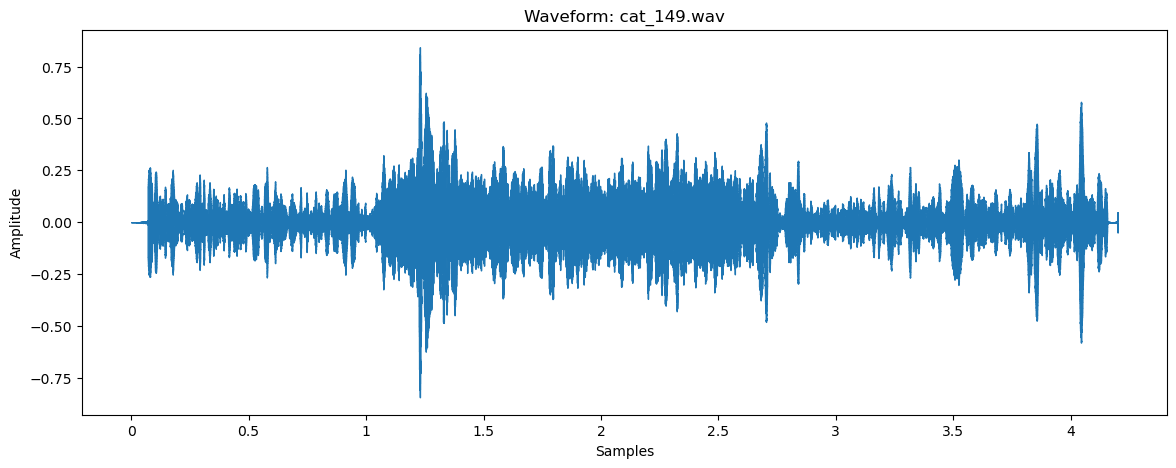

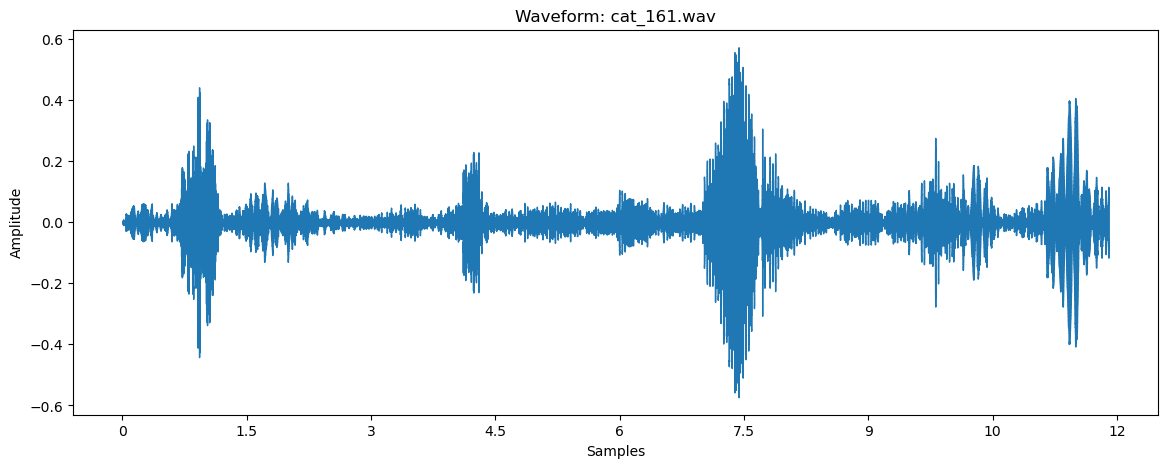

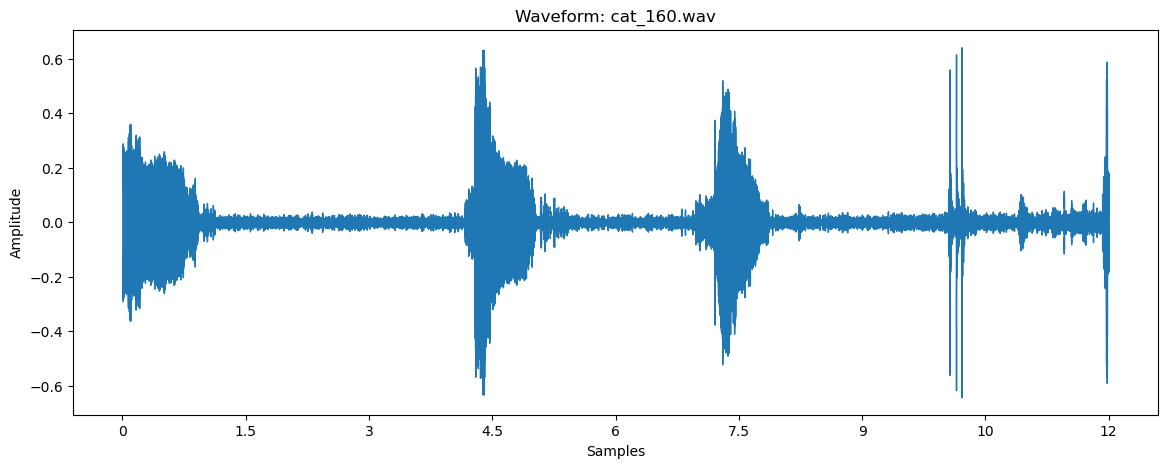

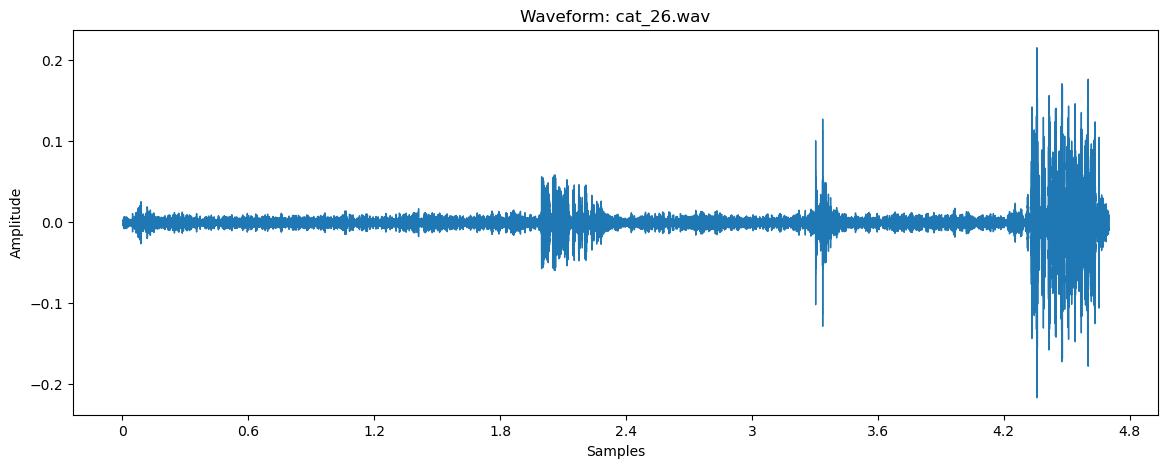

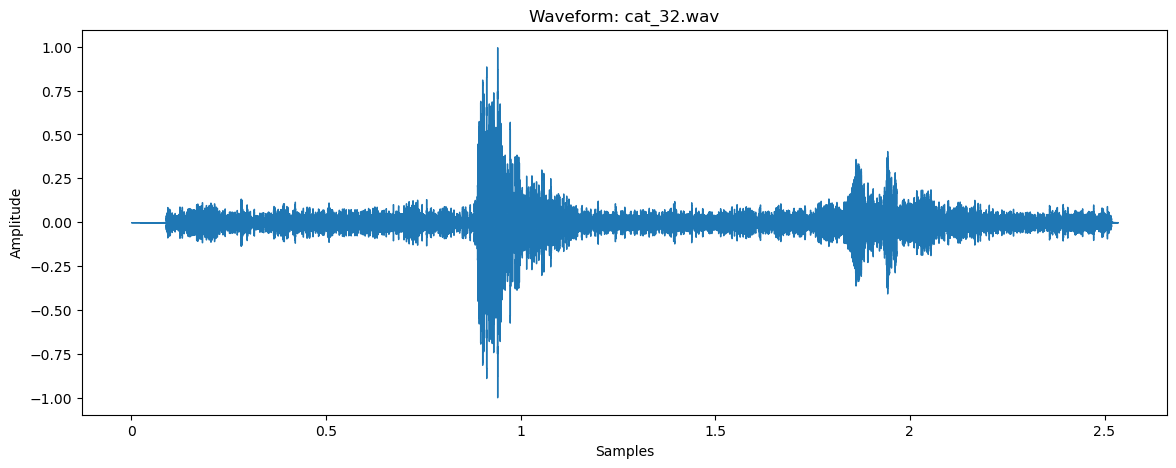

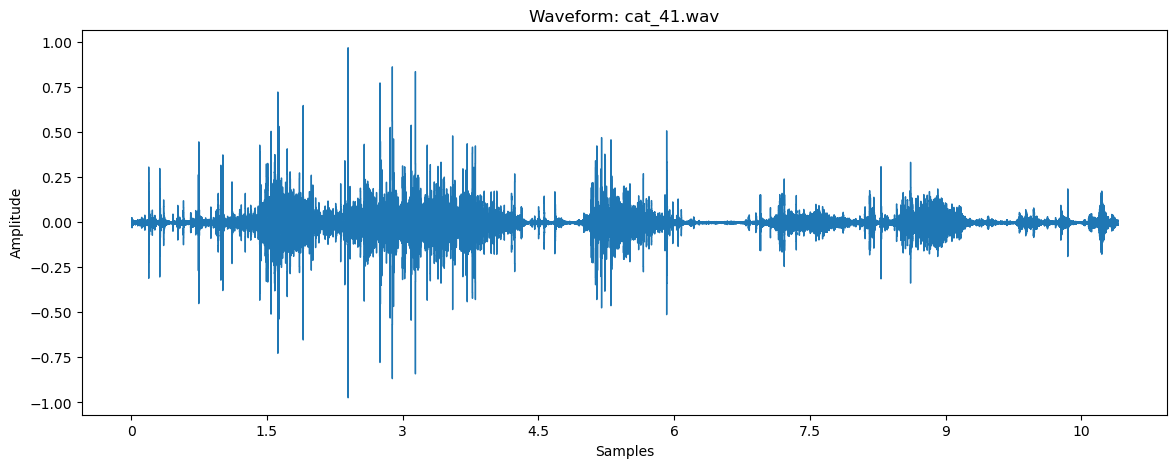

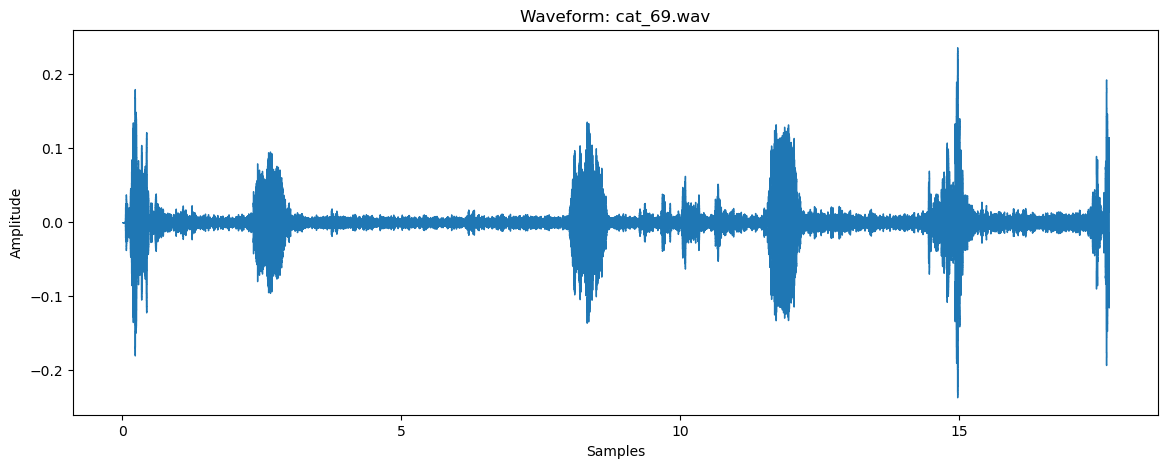

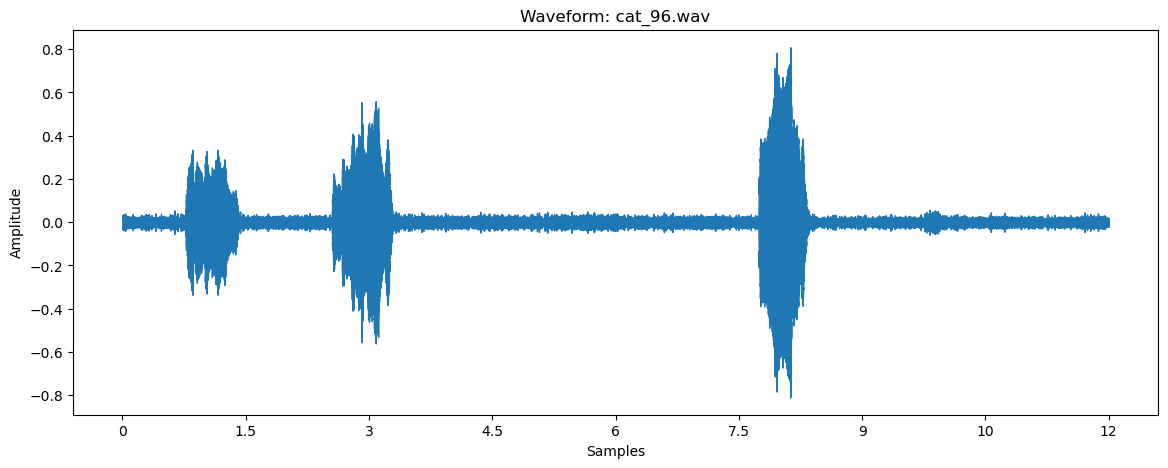

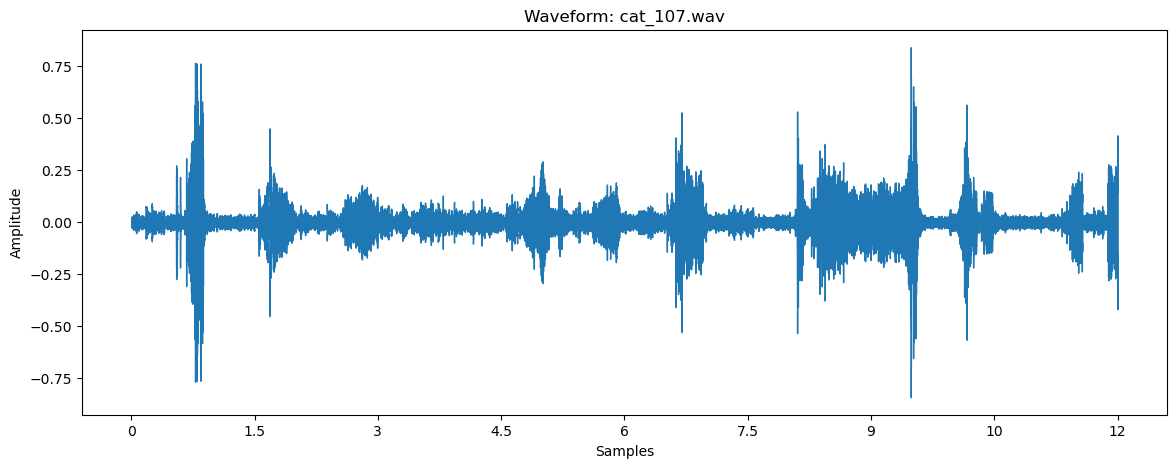

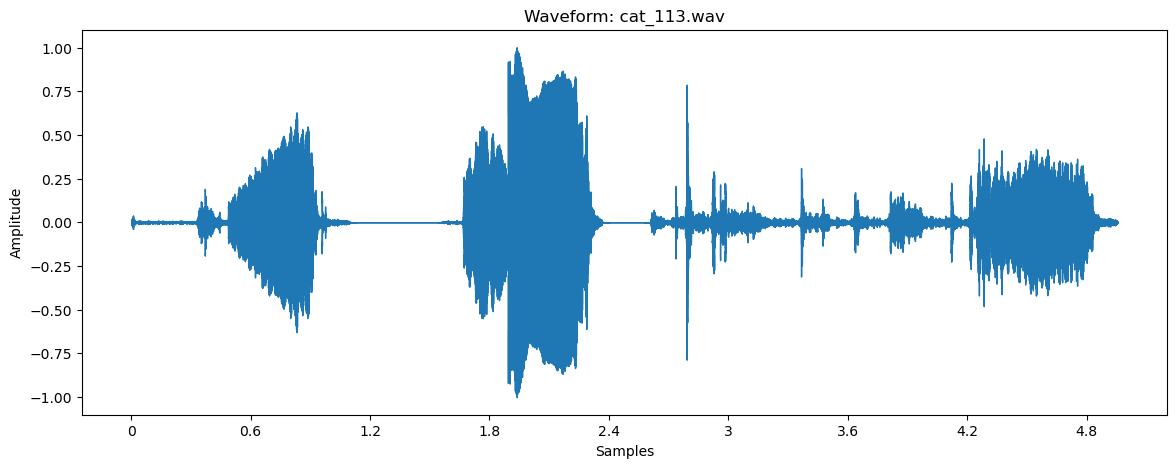

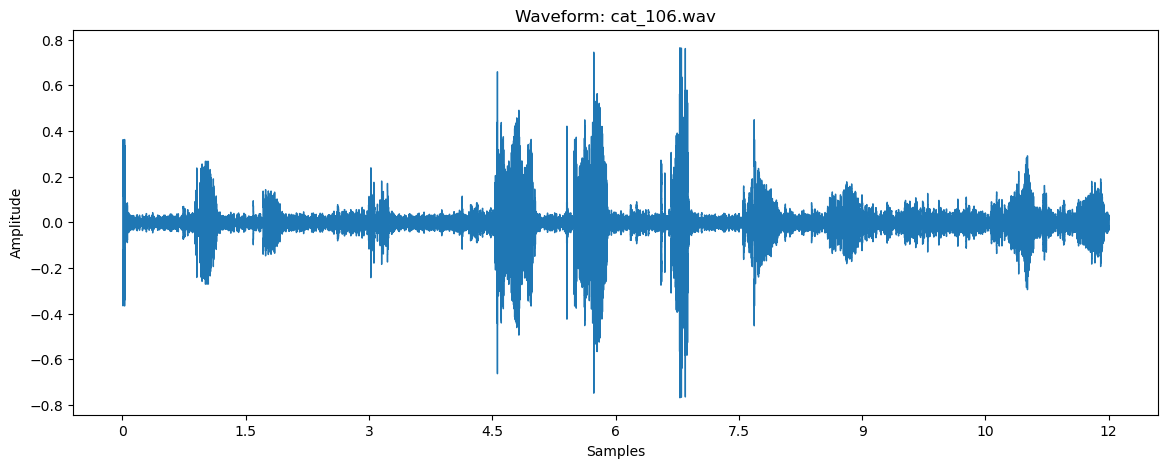

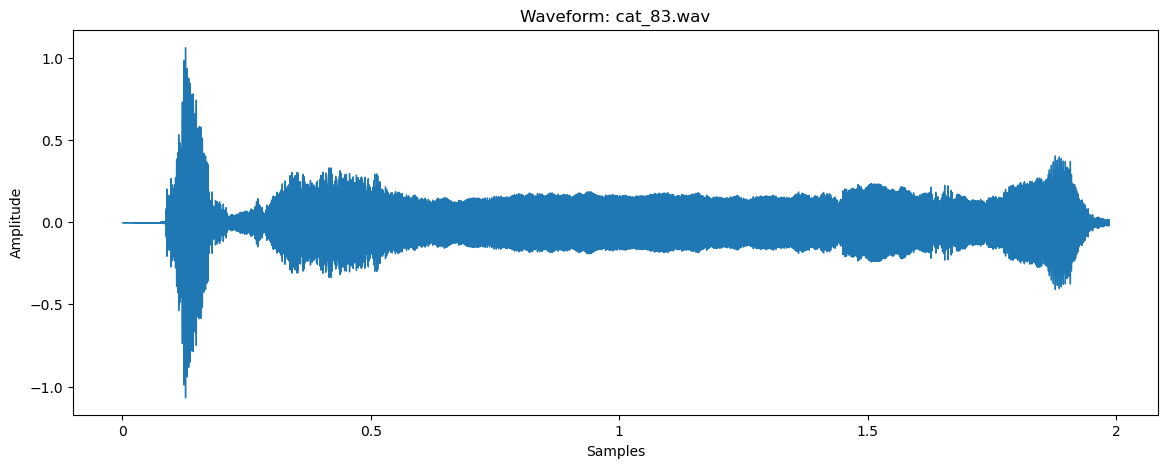

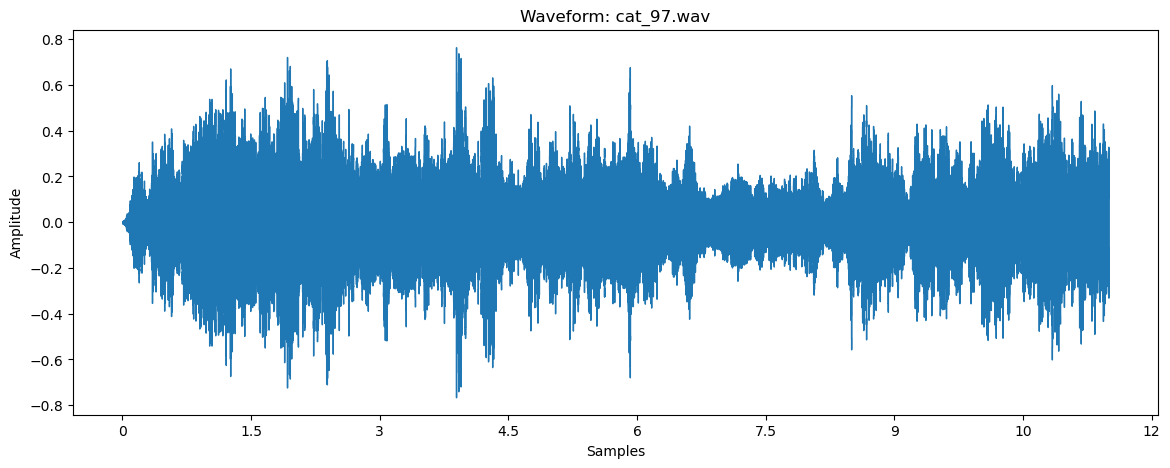

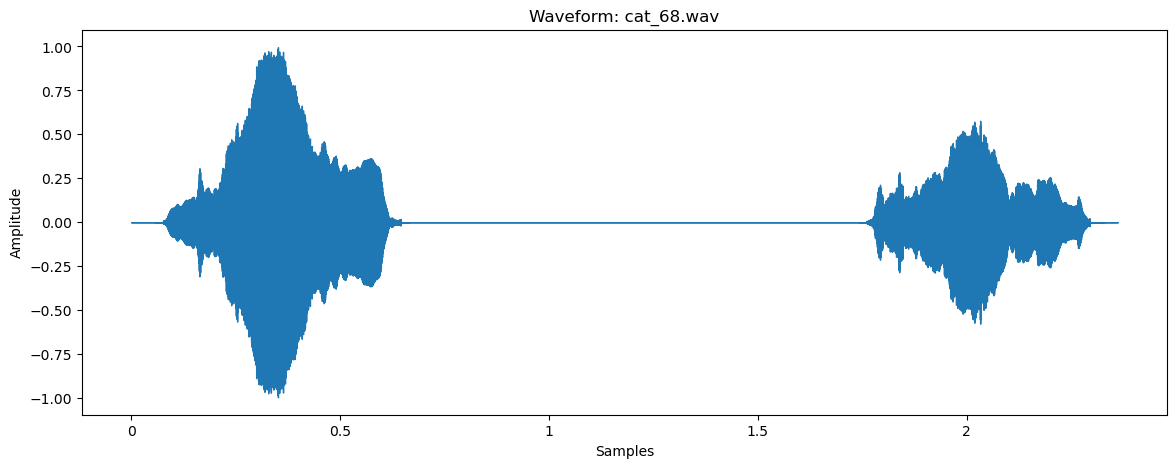

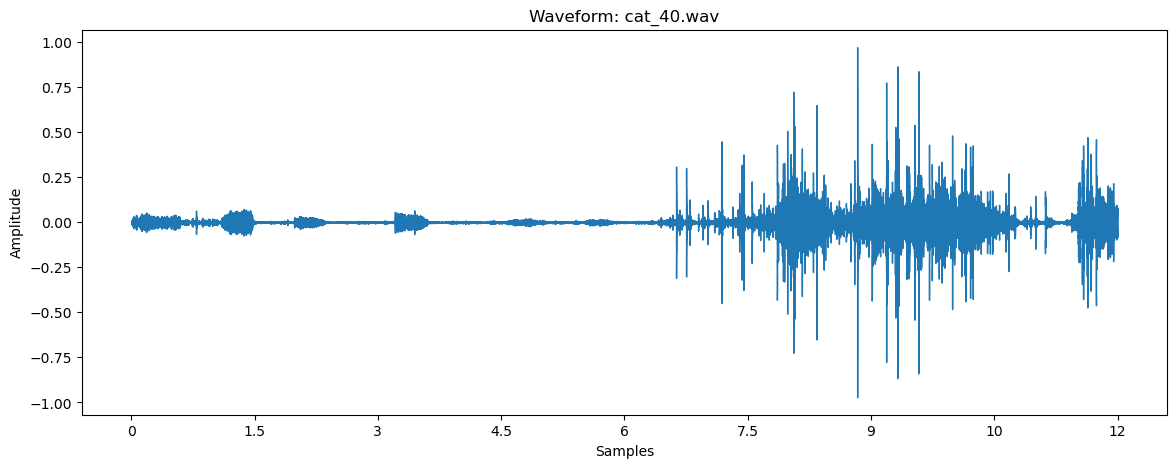

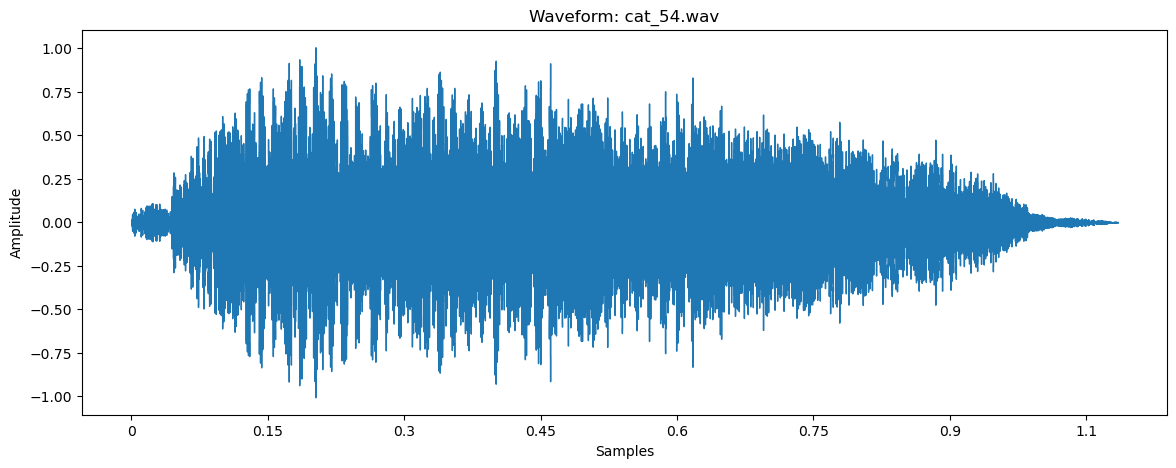

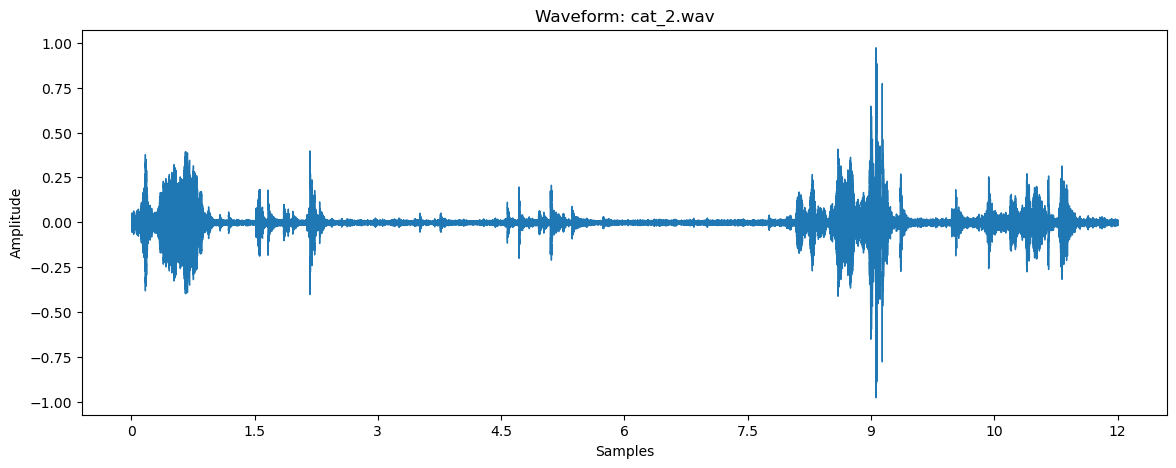

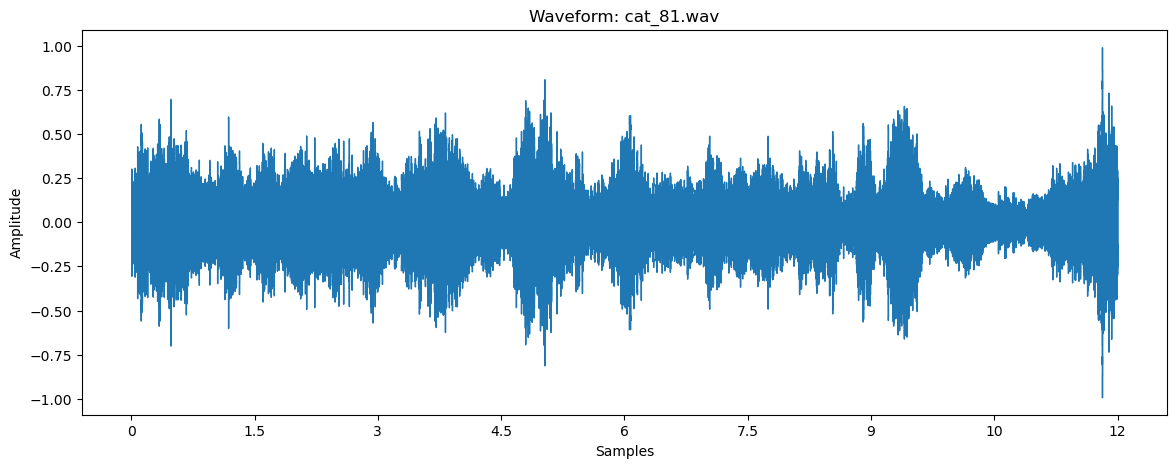

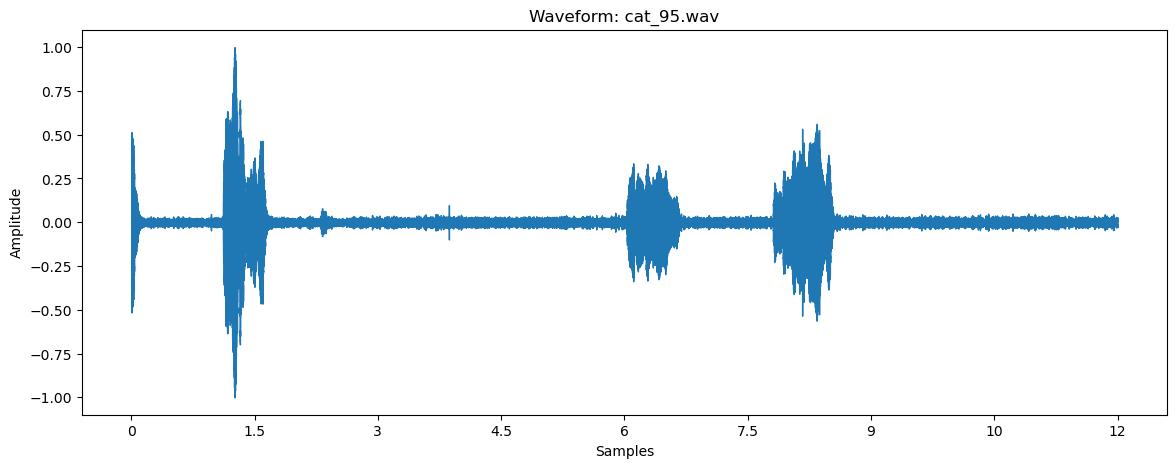

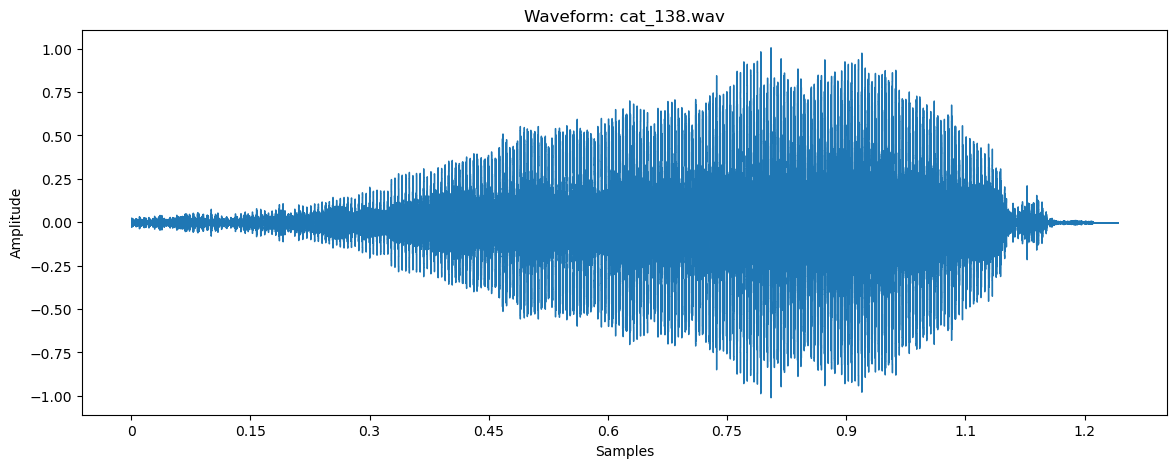

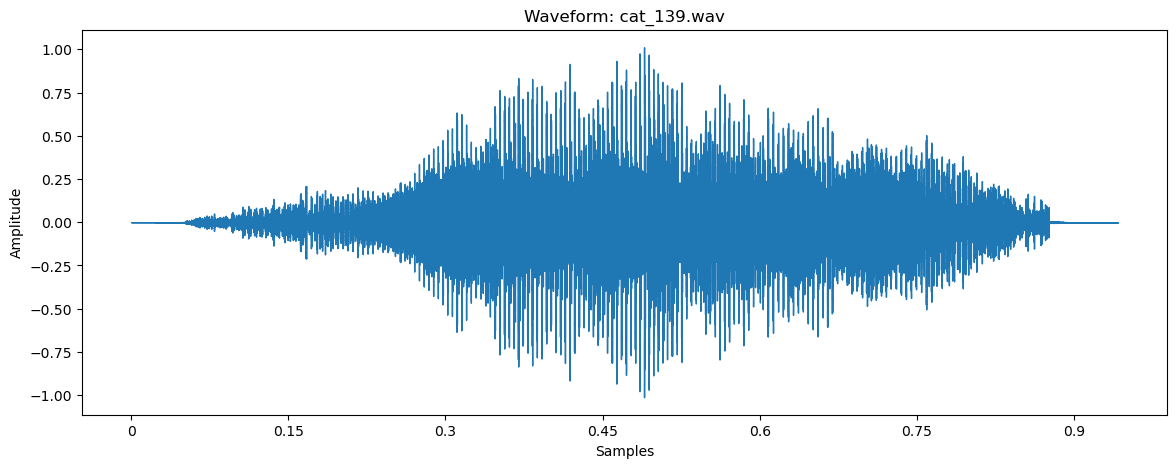

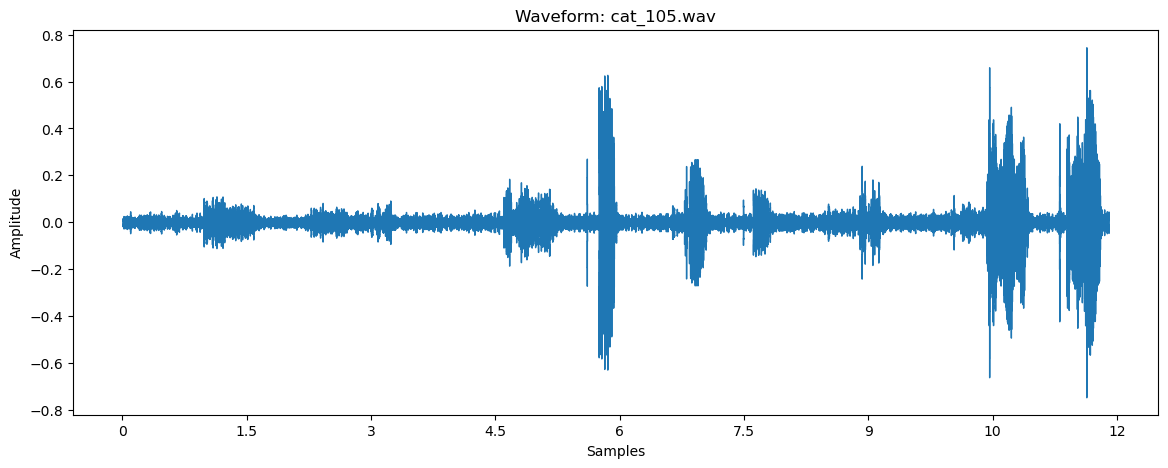

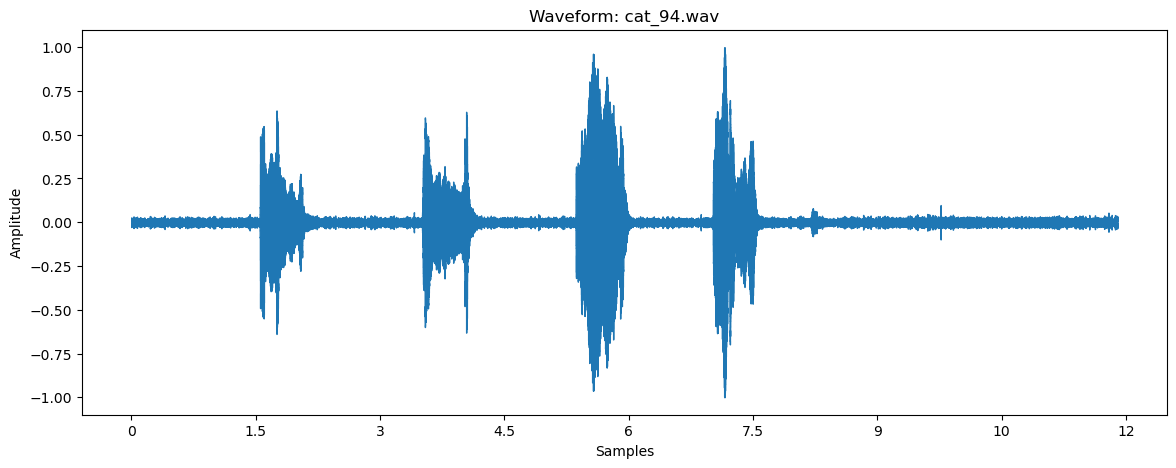

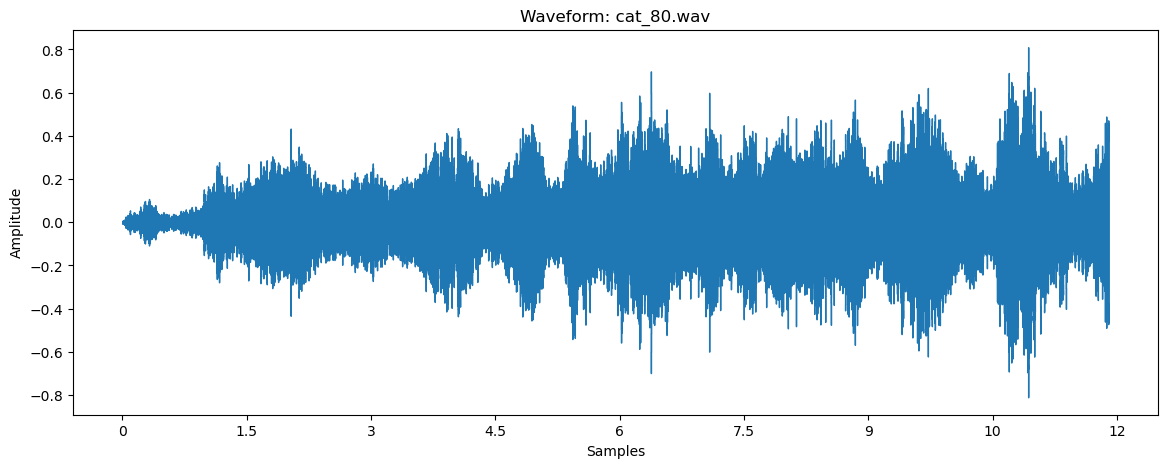

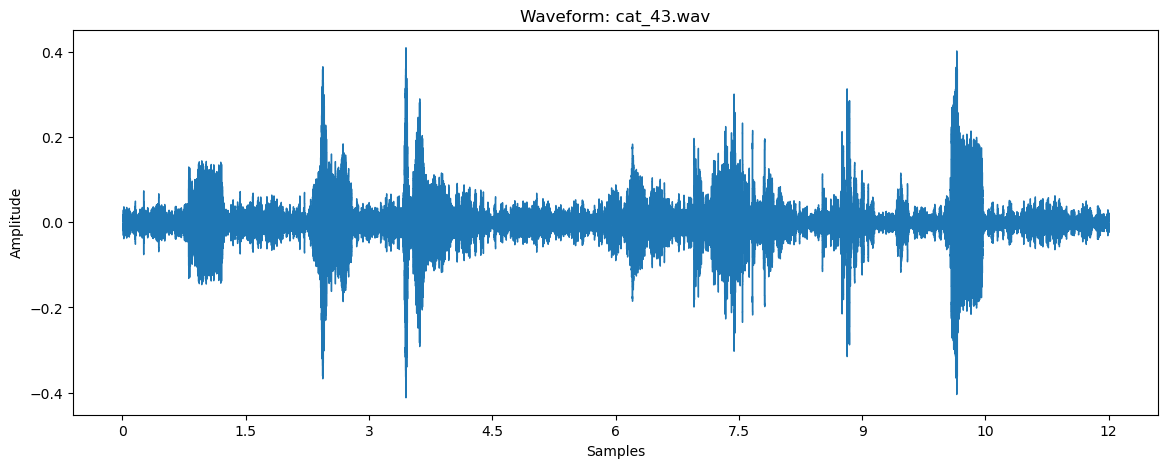

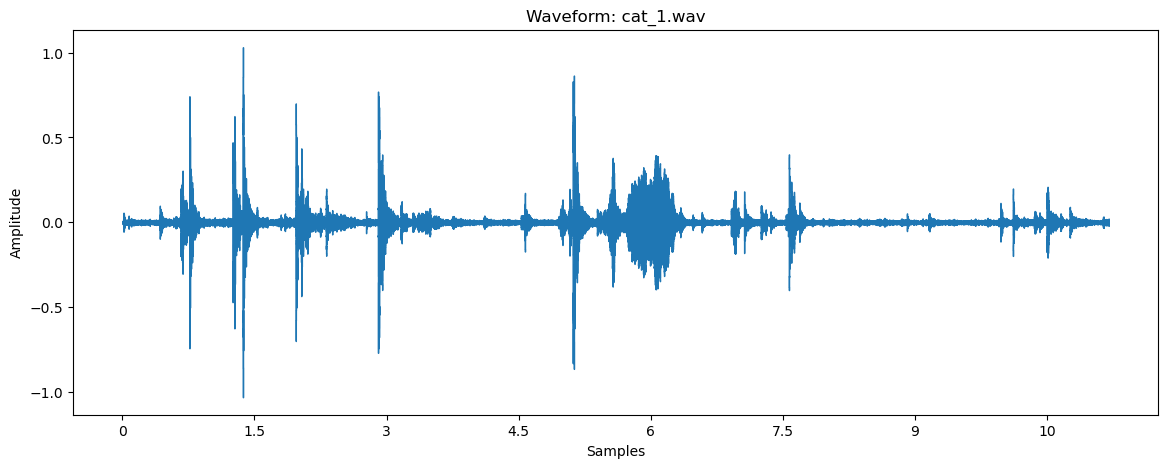

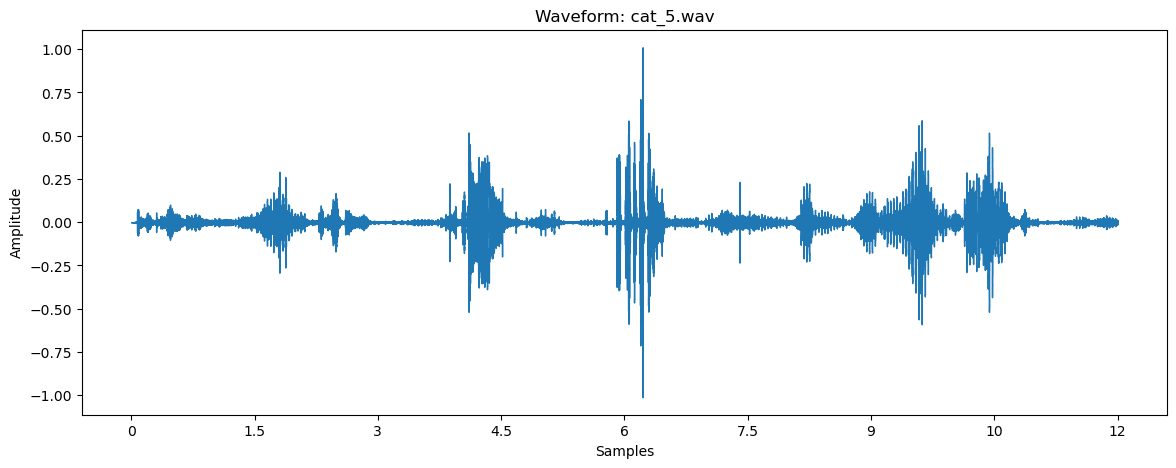

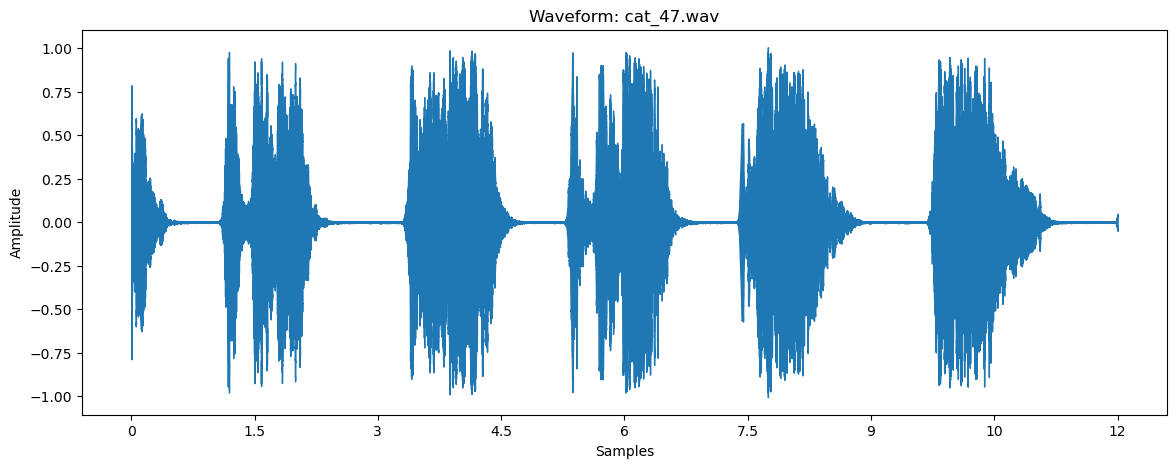

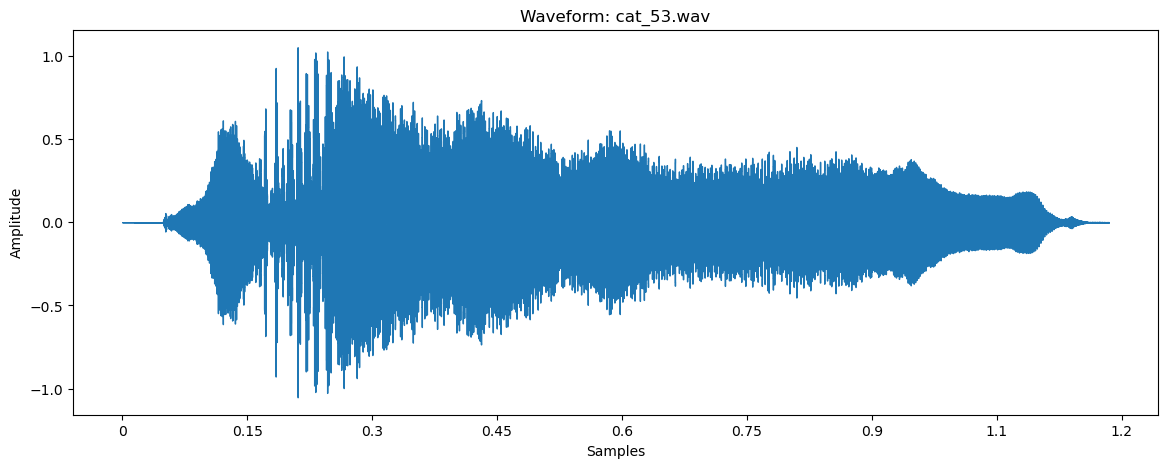

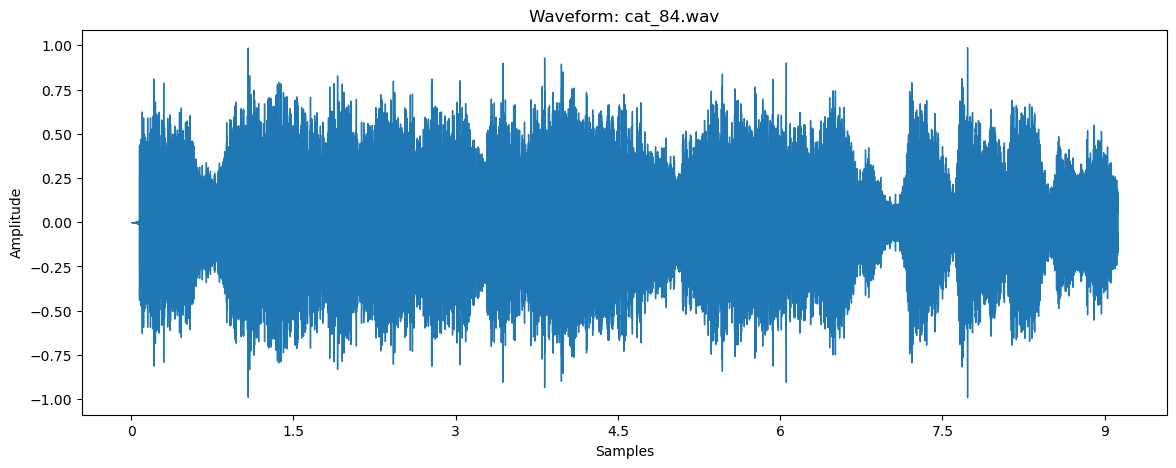

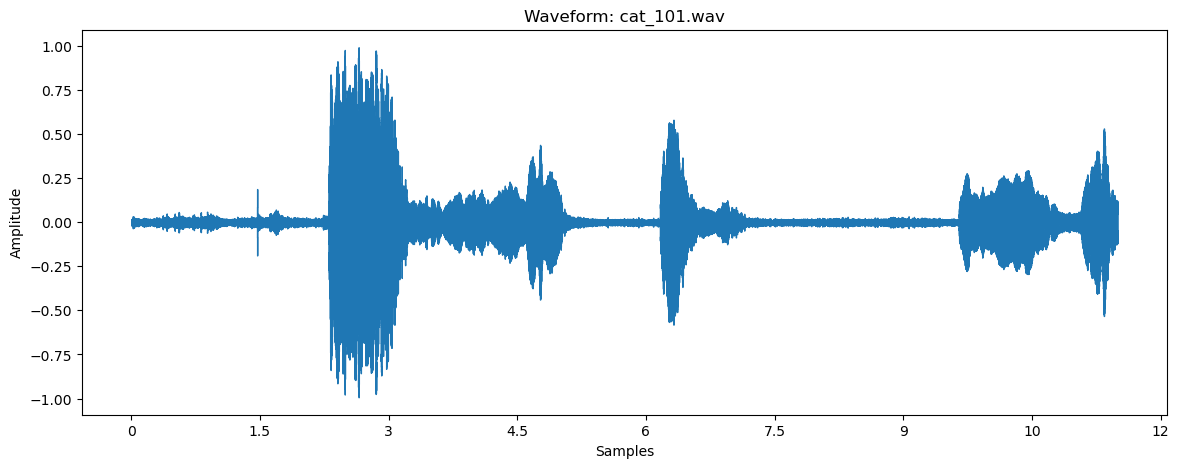

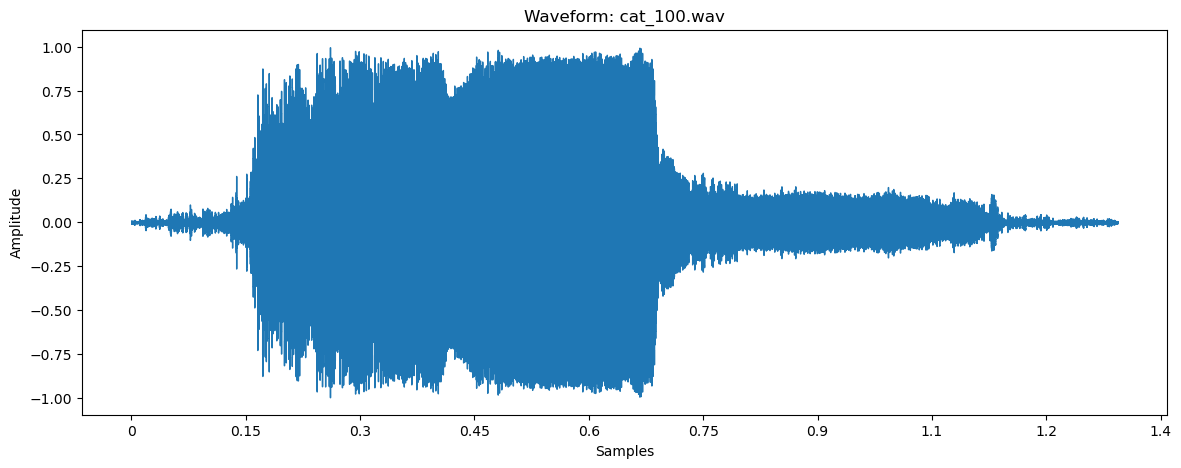

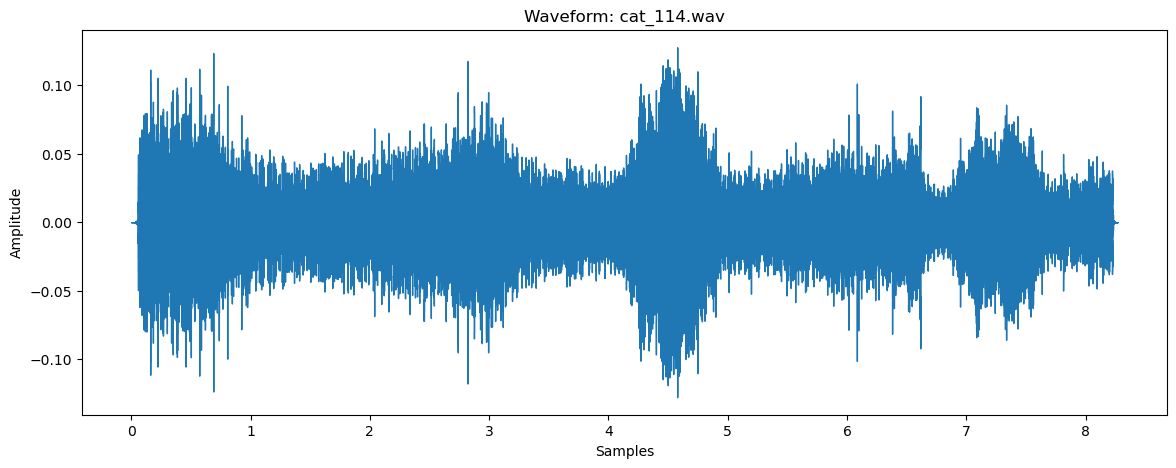

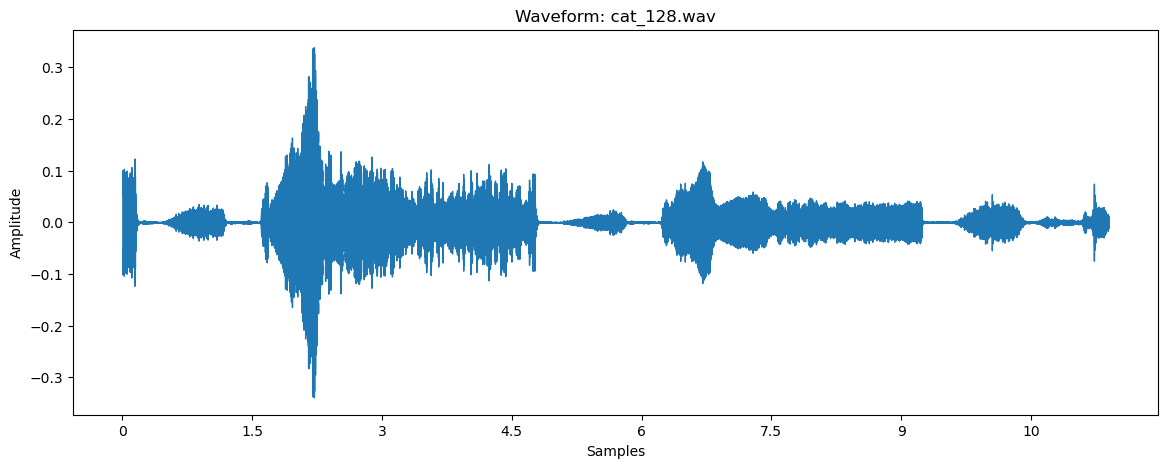

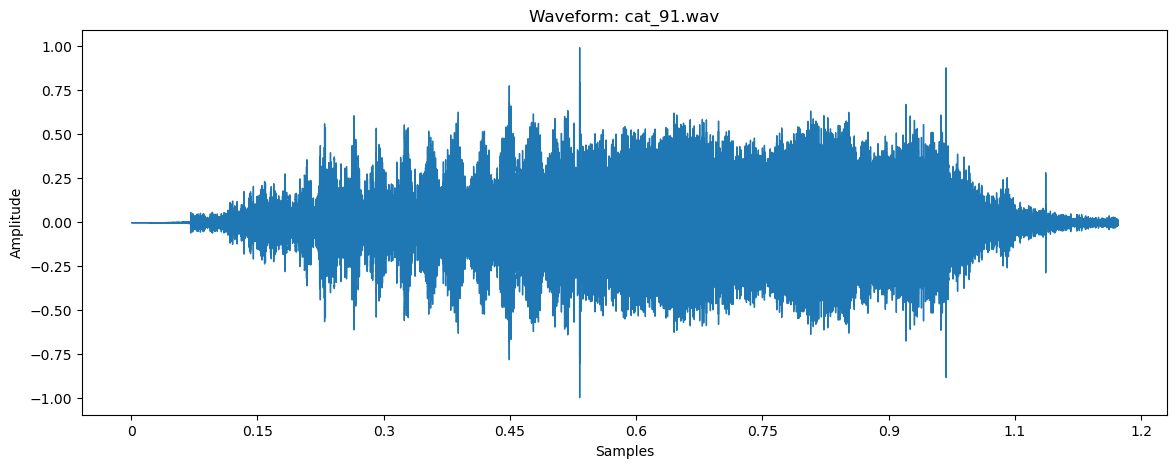

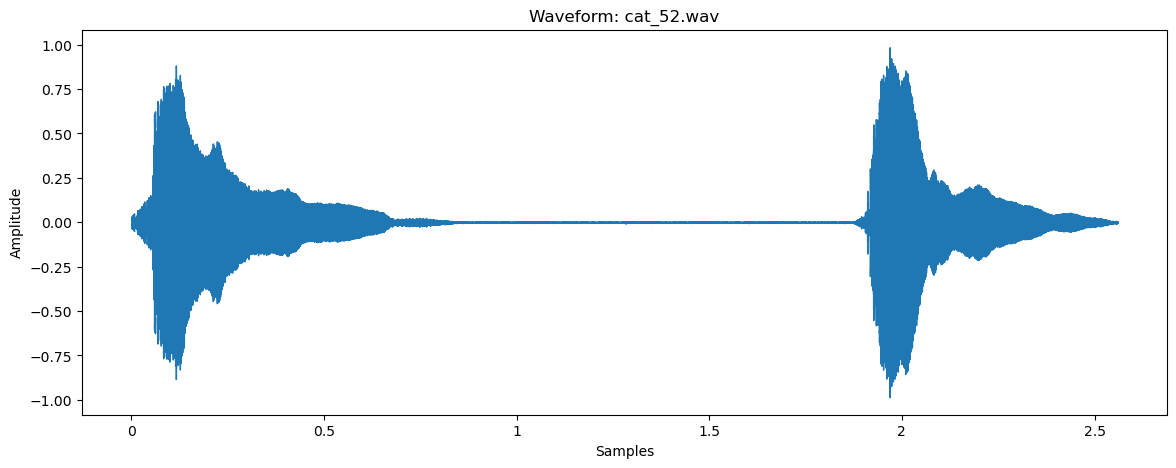

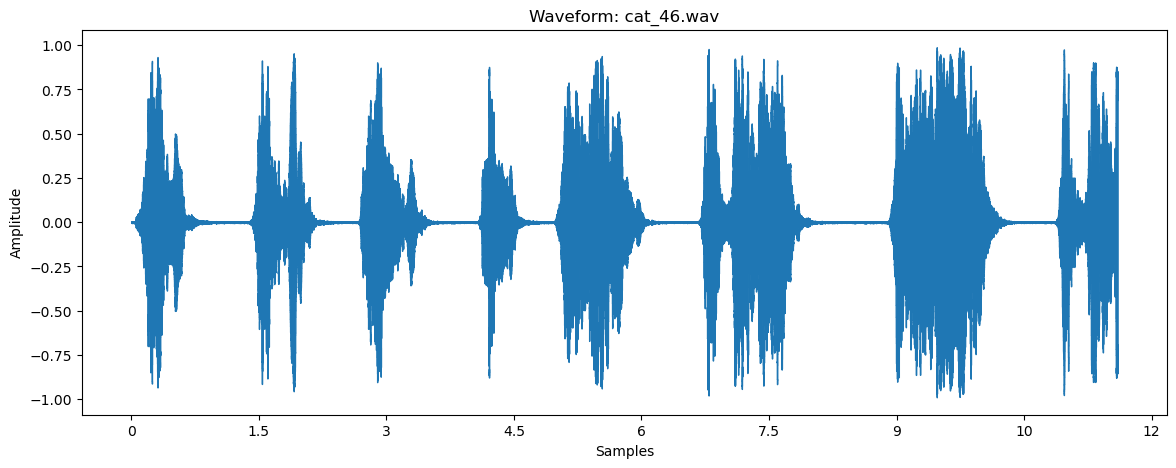

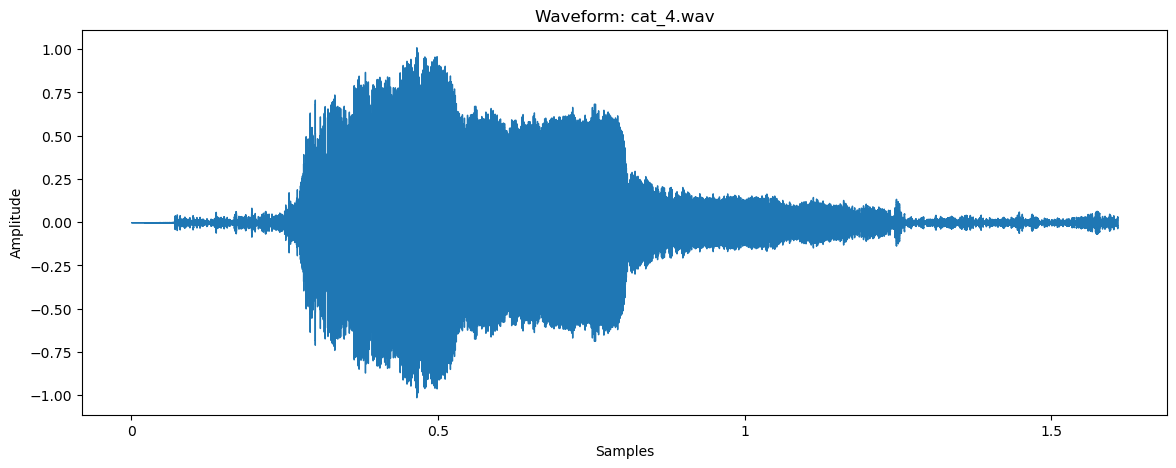

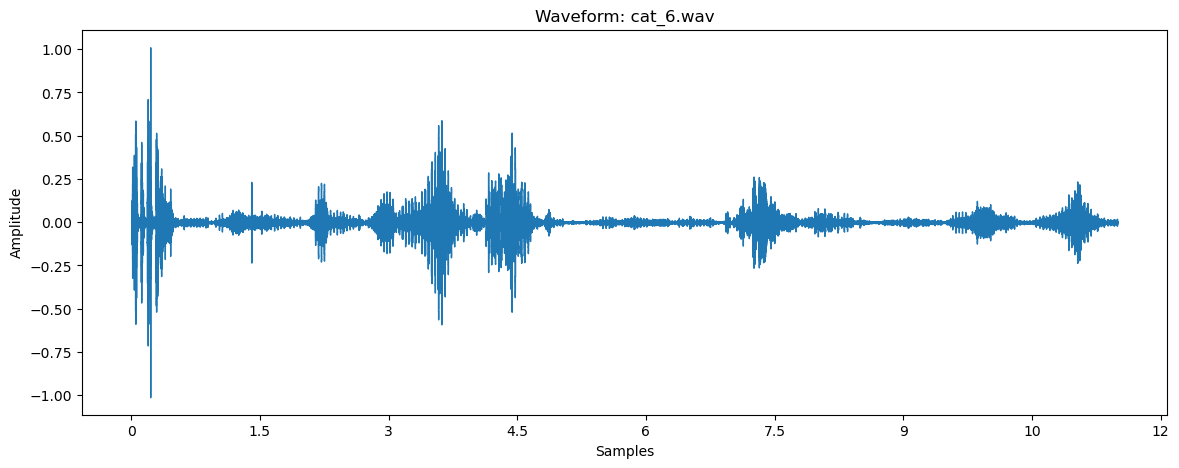

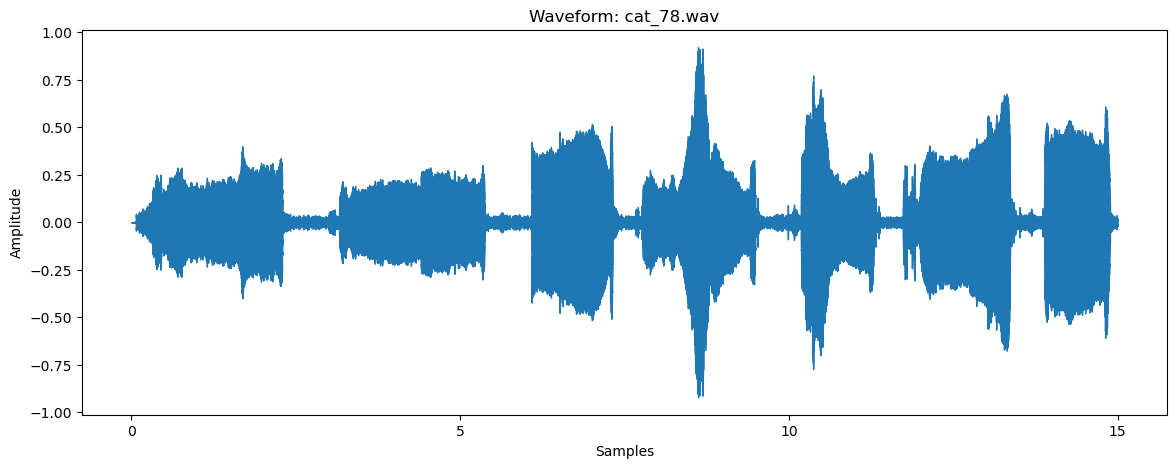

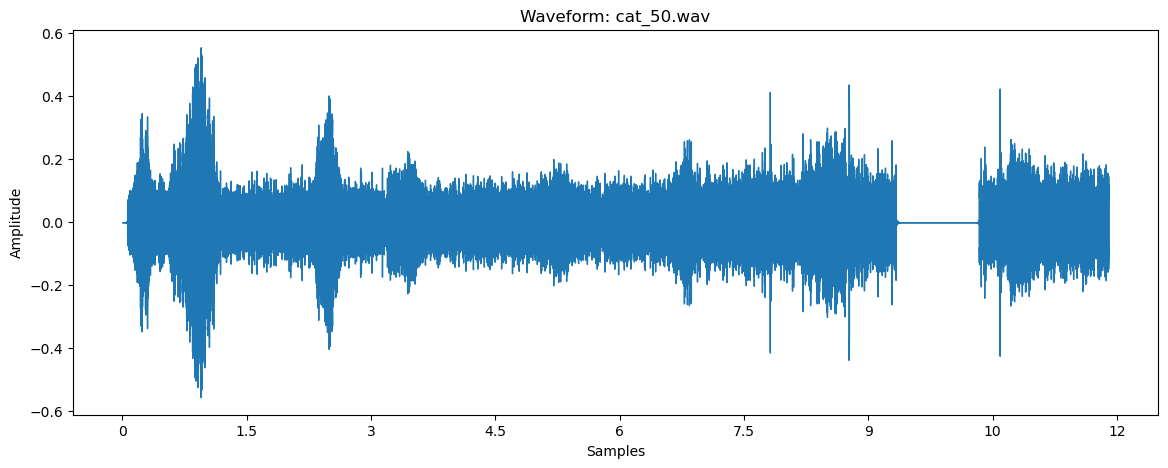

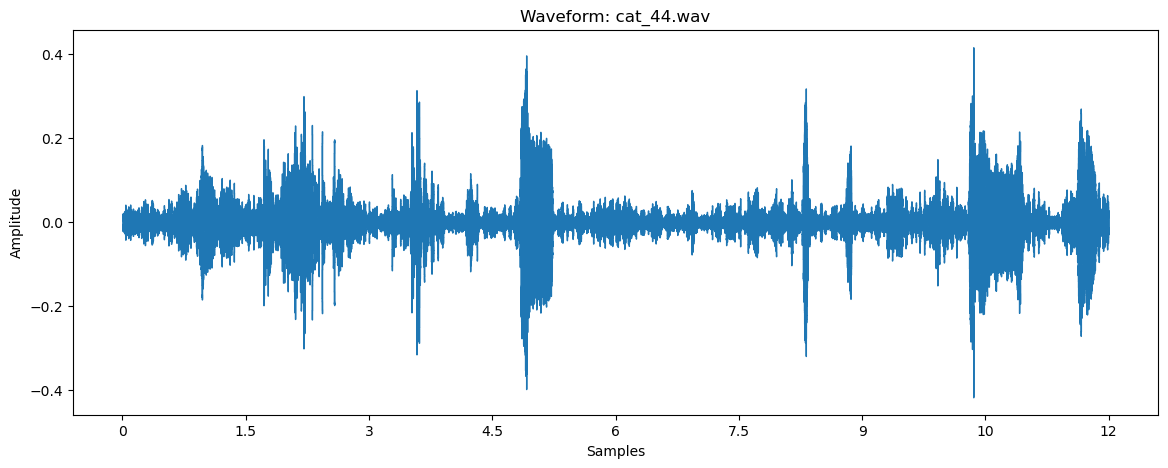

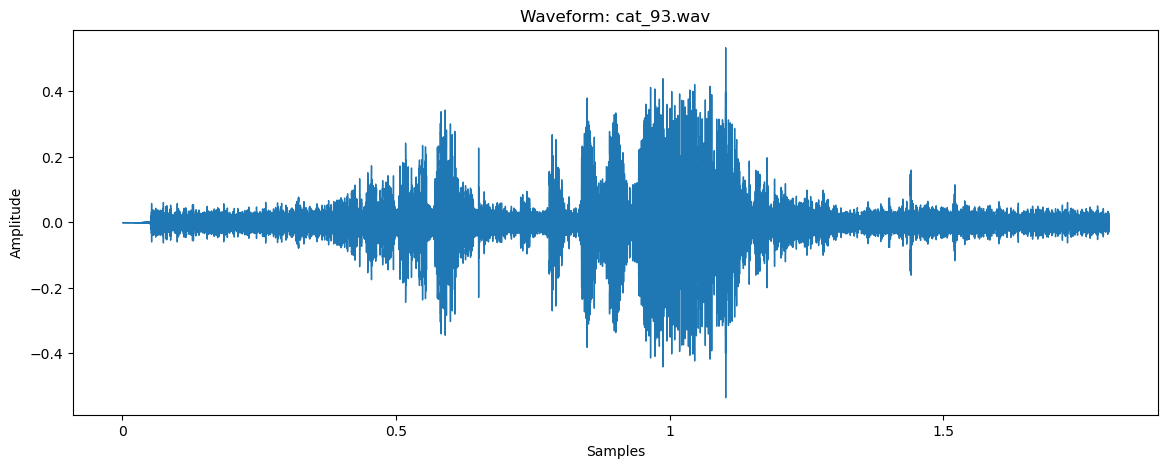

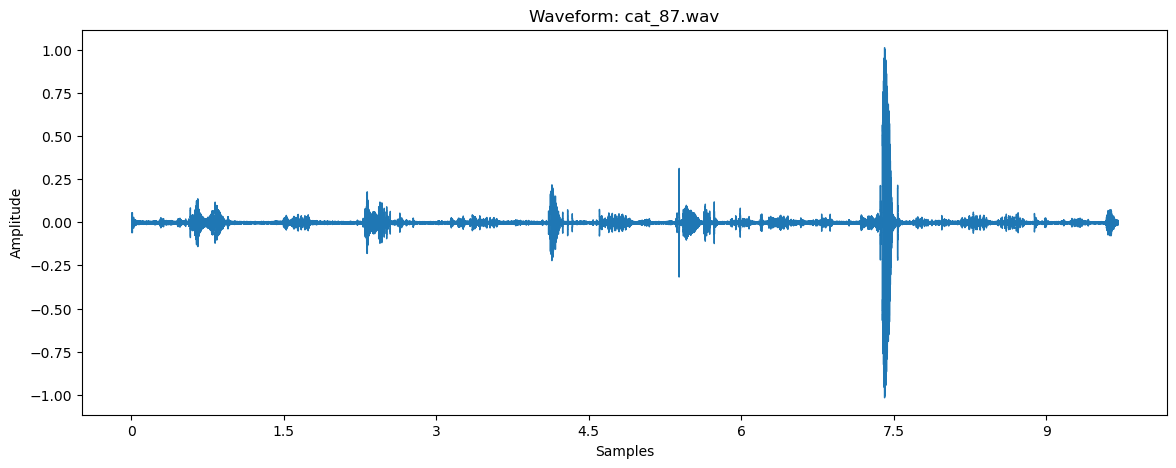

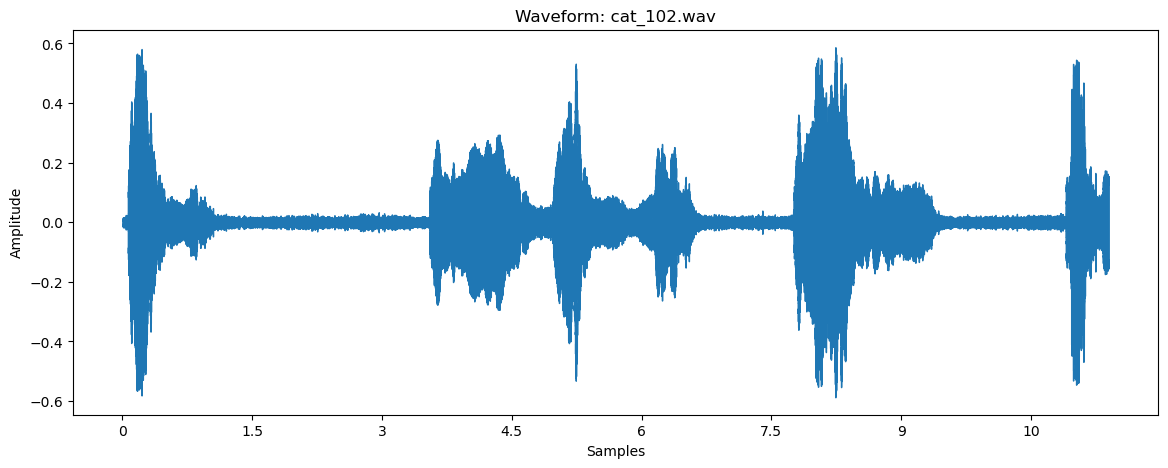

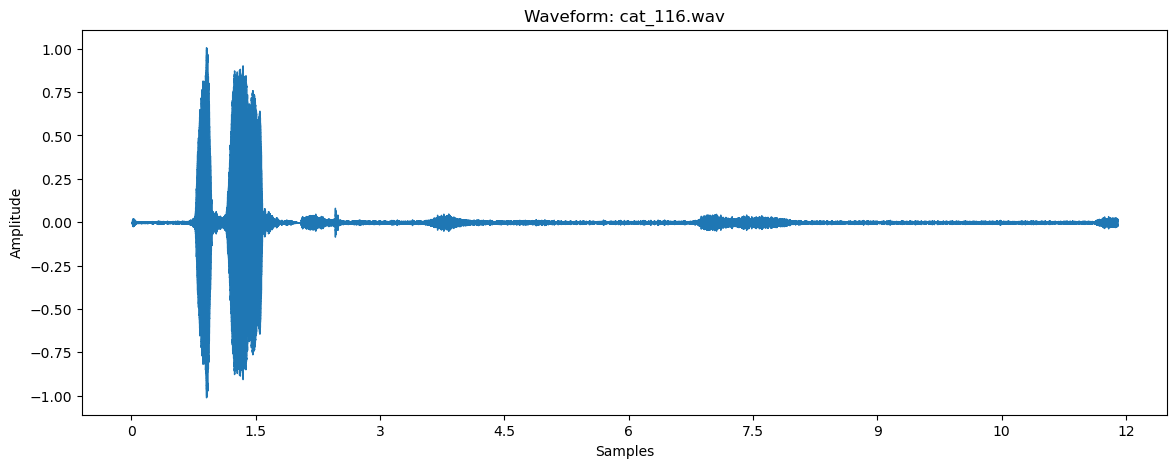

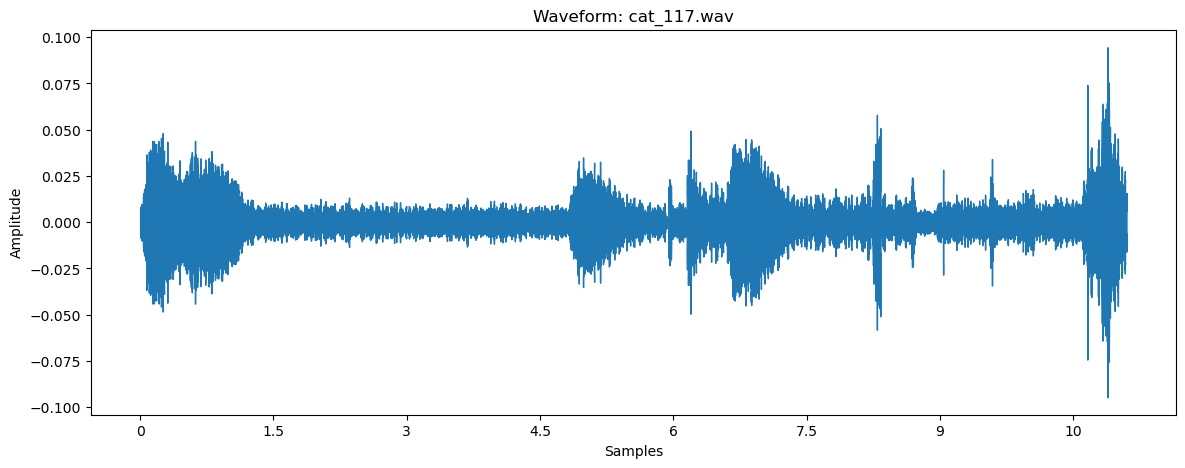

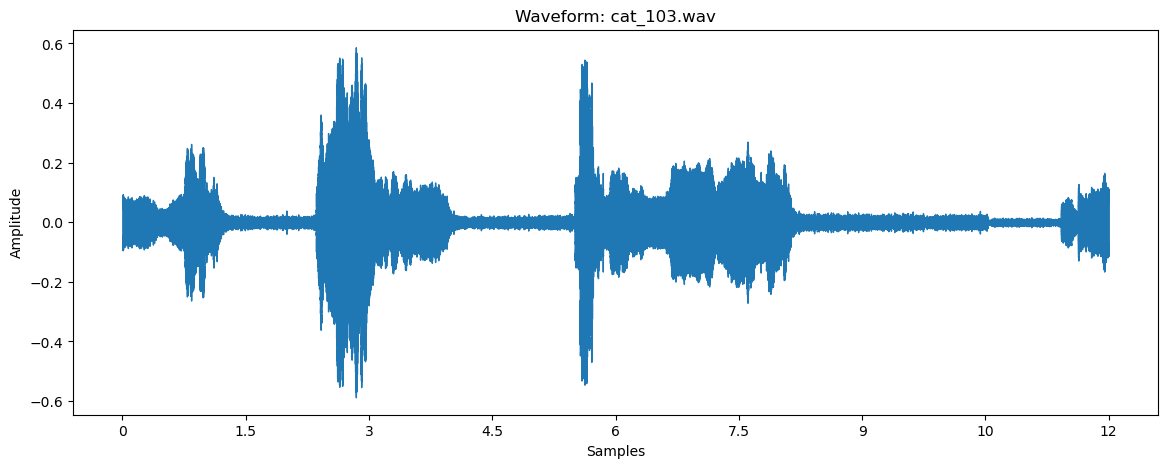

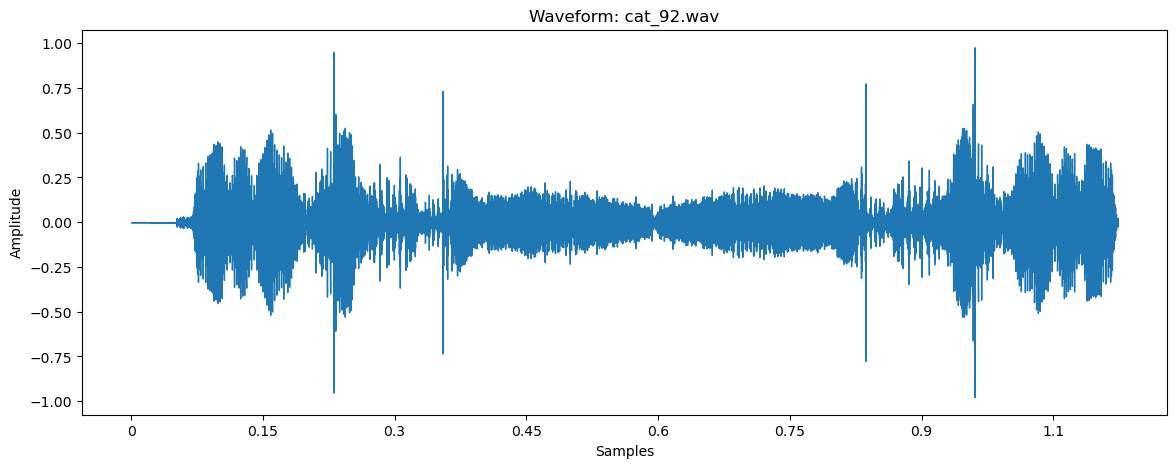

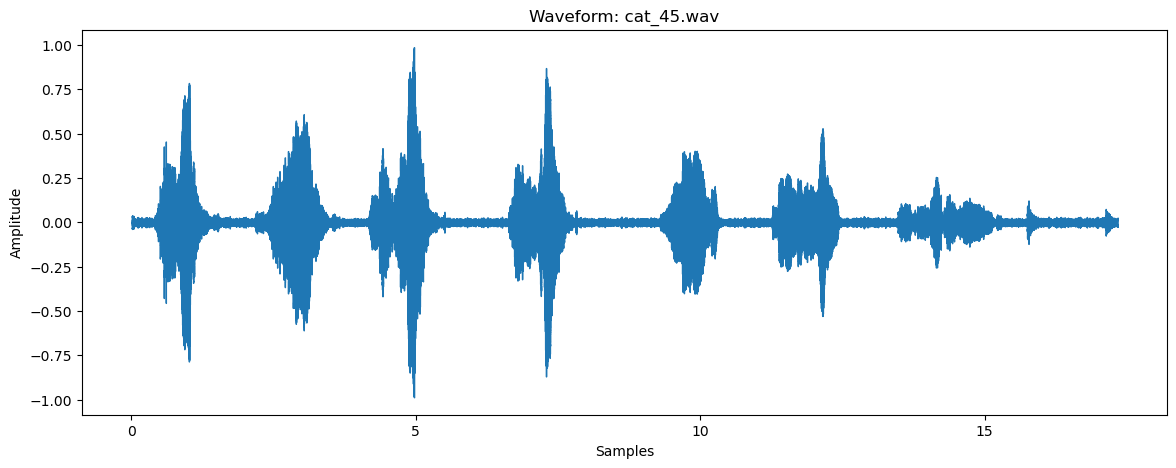

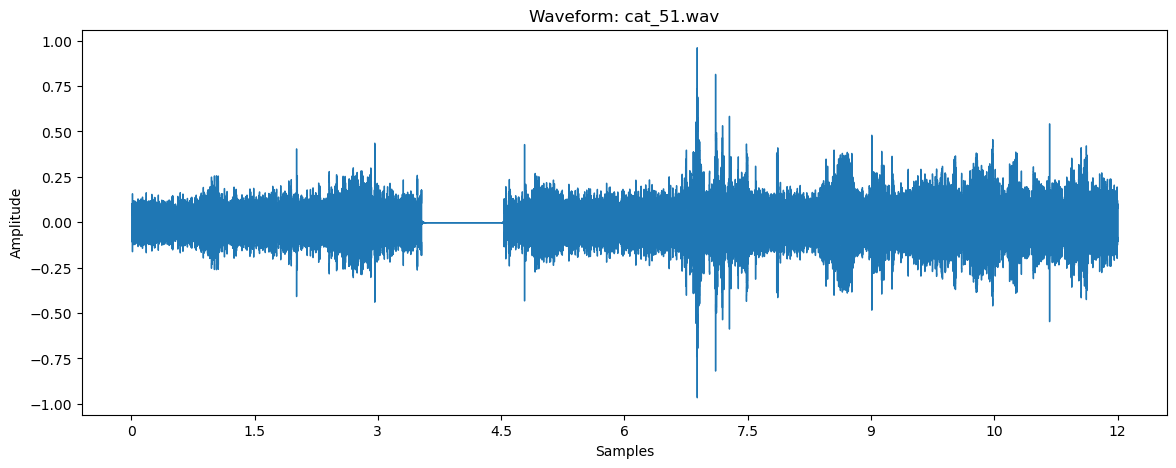

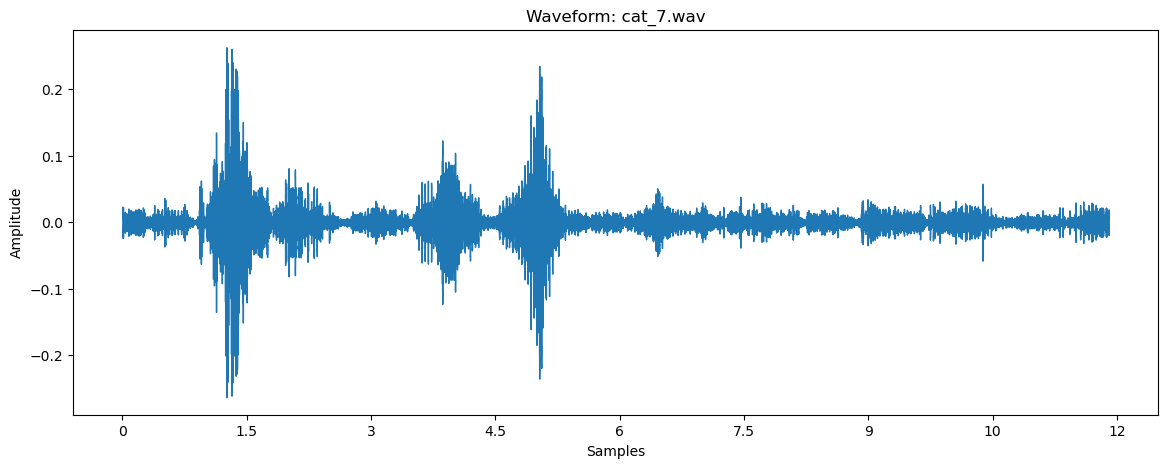

In [36]:
path_cats='cats_dogs/train/cat/'
for filename in os.listdir(path_cats):    
    audio_path_cats = os.path.join(path_cats, filename)
    x, sr = librosa.load(audio_path_cats)
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)
    plt.title(f'Waveform: {filename}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

In [38]:
audio_data2='cats_dogs/train/cat/cat_74.wav'

x , sr = librosa.load(audio_data2)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(136710,) 22050


In [39]:
librosa.load(audio_data, sr=22050)
import IPython.display as ipd
ipd.Audio(audio_data2)

---
### END of individual file exploration

---


##### Other features we can explore
- Frequency, Period etc

In [40]:
amplitude = np.max(np.abs(x))

# Calculate period and frequency
period = 1 / sr * x.shape[0]
frequency = 1 / period

In [41]:
print(amplitude,period,frequency)

0.77425784 6.2 0.16129032258064516


---

## Creating Functions to Process Training Data for Dog Audio Files

We are creating a function to process training data for dog audio files and extract the following features:

- **Melspectrogram:** We first divide the frequency range into 10 Mel frequency bands and compute the spectrogram accordingly. This results in a Mel spectrogram with 10 rows (one for each Mel band), and as many columns as there are time frames in the audio signal.
  
- **Decibel Conversion:** Next, we use the `librosa.power_to_db` function to convert the Melspectrogram, which measures sound power or loudness, into a scale that aligns more closely with human perception. Our ears perceive loudness in a logarithmic manner, not linearly, meaning we are more sensitive to changes in quieter sounds than louder ones. By converting the Melspectrogram into decibels, we align the sound data more closely with our own hearing.


In [42]:
#settings the directory path to loop over the audio files for dog train files
directory_path = '/Users/zishanvisram/Documents/DATA608/Group_Project/cats_dogs/train/dog/'


#creating a function that converts a audio file that in wav file into meaningful features that can be used for exploration analysis and building a classification model

def compute_audio_features(directory_path): # function that takes the audio path as the only parameter
    
    # this empty list will store the features that we are interested for each file using the functions inside of the for loop
    all_features = []

    for filename in os.listdir(directory_path): #reading the files inside of the directory path
        
        # all the audio files that we have are in .wav format so there is no need for running any conversions
        
        if filename.endswith('.wav'):
            
            #runs the loop and make a file path for each audio file in the directory
            file_path = os.path.join(directory_path, filename)

            # First, the library performs feature extraction to obtain the number of samples and sample ratio from each audio file.
            # These features are crucial as they form the basis for all subsequent functions that extract other features.
            x, sr = librosa.load(file_path)

            # using the features from above (x,sr), we can now use another built in function to extract the melspectogram for each audio files
            # This function internally computes a Short-Time Fourier Transform (STFT) before converting it to a mel scale so it's not necessary to run a separate function to run a fft
        
            melspec = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=10)

            
           # This step isn't strictly necessary since we can work with melspectrograms. 
           # However, converting the melspectrogram into decibels is a common convention. The decibel scale better approximates human perception of loudness and makes the values more interpretable.
            mel_spect = librosa.power_to_db(melspec, ref=np.max)

            
            # This is a built-in function in the Librosa package that computes the tempo and beat frames of an audio file. The 'tempo' refers to the estimated tempo of the song in beats per minute (BPM). 'beat_frames' are the estimated positions of the beat events.
            tempo, beat_frames = librosa.beat.beat_track(y=x, sr=sr)

            # This function converts beat frames to time. This provides a more intuitive understanding of when the beats occur, as it expresses beat positions in seconds rather than in frame indexes.
            beat_times = librosa.frames_to_time(beat_frames, sr=sr)
            
            # Now that we've extracted the desired features, we can reduce the size of our feature set by computing statistics for each audio file.

            # Compute the mean, variance, 25th percentile, 75th percentile, and max for each Mel bin
            
            
            # Creating an empty list to append the extracted feature values.
            file_features = []
            
            #running a for loop for each Mel bin. In our case, we limited our Mel bin size to 10
        
            for i in range(mel_spect.shape[0]):
                mean = np.mean(mel_spect[i])
                var = np.var(mel_spect[i])
                percentile_25 = np.percentile(mel_spect[i], 25)
                percentile_75 = np.percentile(mel_spect[i], 75)
                max_val = np.max(mel_spect[i])
                
                # Once the desired calculations are performed, we extend them to the 'file_features' list using the 'extend()' method.
                file_features.extend([mean, var, percentile_25, percentile_75, max_val])


                # Since tempo and beat times are computed as single values for each file (without needing to extract from the melspectrogram), we can compute these outside of the loop. 
                # We then extend the 'file_features' list with these values to gather all features in one list.
            file_features.extend([tempo, np.mean(beat_times)])


            # Now we can append all the desired feature for each file into the main list
            all_features.append(file_features)

    # The conversion to a DataFrame could be performed outside our main function. However, we include it here to test our optimization for later.
    df_features = pd.DataFrame(all_features)

    
    # Since the output of the features are not labelled, we are creating a loop that runs over the size of the mel bins and adding the respective columns names
    cols = []
    for i in range(1, 11):
        for stat_name in ['mean', 'var', '25_percentile', '75_percentile', 'max']:
            cols.append(f'{stat_name}_bin_{i}')
    
    # Now, we are adding tempo and beat_times_mean to column names and again suing the extend() function to add to cols
    cols.extend(['tempo', 'beat_times_mean'])

    # finally replacing the original columns names with the new cols names
    df_features.columns = cols
    
    # return the final dataframe as the result
    return df_features


In [ ]:
dataset=compute_audio_features(directory_path)

In [ ]:
dataset['animal']='dog'

In [ ]:
dataset = dataset.reset_index()
dataset['index'] = dataset['index'] + 1
dataset.rename(columns={'index': 'Audio_file_number'}, inplace=True)


In [ ]:
dataset.head()